# **Modélisation Avancée de la Value at Risk sur les marchés financiers avec Intégration d'Intelligence Artificielle**

**Réalisé par** : Balla Moussa KEITA \\
**Encadré par** : Mr Mohamed Hedi RIAHI \\
**Année Scolaire** : 2024-2025 \\
**Spécialité** : Informatique - Data Science - Parcours Actuariat

**Description** : Ce projet s'inscrit dans la réalisation d'un projet de fin d'étude en vue de l'obtention d'un Diplôme National d'Ingénieur en Information de l'Ecole Supérieure Privée d'Ingeniérie et de Technologies et d'un Master 2 en Actuariat (Parcours Data Science pour l'Actuariat) de l'Institut de Risque et de l'Assurance, Le Mans Université.

### **Importation des Bibliothèques nécessaires pour le Projet**

In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 12.9 MB/s eta 0:00:00


In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, shapiro, jarque_bera,t

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import yfinance as yf
#from arch import arch_model

**Importation des données**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Cac40 - France**

In [ ]:
import yfinance as yf

cac40 = yf.download("^FCHI", start="2010-01-01", end="2025-06-24")
cac40.columns = cac40.columns.droplevel(1)

/tmp/ipython-input-3-2971829800.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  cac40 = yf.download("^FCHI", start="2010-01-01", end="2025-06-24")
[*********************100%***********************]  1 of 1 completed


In [ ]:
cac40

Price             Close         High          Low         Open     Volume
Date                                                                     
2010-01-04  4013.969971  4013.969971  3950.610107  3952.209961  113396000
2010-01-05  4012.909912  4028.340088  3993.330078  4012.429932  129518600
2010-01-06  4017.669922  4022.939941  3996.800049  4014.449951  110087000
2010-01-07  4024.800049  4032.239990  3983.899902  4005.959961  118430400
2010-01-08  4045.139893  4051.409912  4013.340088  4042.639893  131783200
...                 ...          ...          ...          ...        ...
2025-06-17  7683.729980  7702.750000  7646.759766  7687.169922   63015300
2025-06-18  7656.120117  7710.140137  7641.129883  7687.419922   56555500
2025-06-19  7553.450195  7618.759766  7553.450195  7605.879883   54333600
2025-06-20  7589.660156  7636.830078  7575.990234  7597.180176  150191600
2025-06-23  7537.569824  7597.939941  7505.270020  7549.919922   53135000

[3956 rows x 5 columns]

In [ ]:
mean = cac40['Close'].mean()
print("Moyenne :", mean)
median = cac40['Close'].median()
print("Médiane :", median)
std_dev = cac40['Close'].std()
print("Écart-type :", std_dev)
skewness = cac40['Close'].skew()
print("Asymétrie :", skewness)
min_price = cac40['Close'].min()
max_price = cac40['Close'].max()
print(f"Min: {min_price}, Max: {max_price}")

Moyenne : 5213.698774409126
Médiane : 5013.925048828125
Écart-type : 1369.2322464000922
Asymétrie : 0.4513636148049146
Min: 2781.679931640625, Max: 8239.990234375


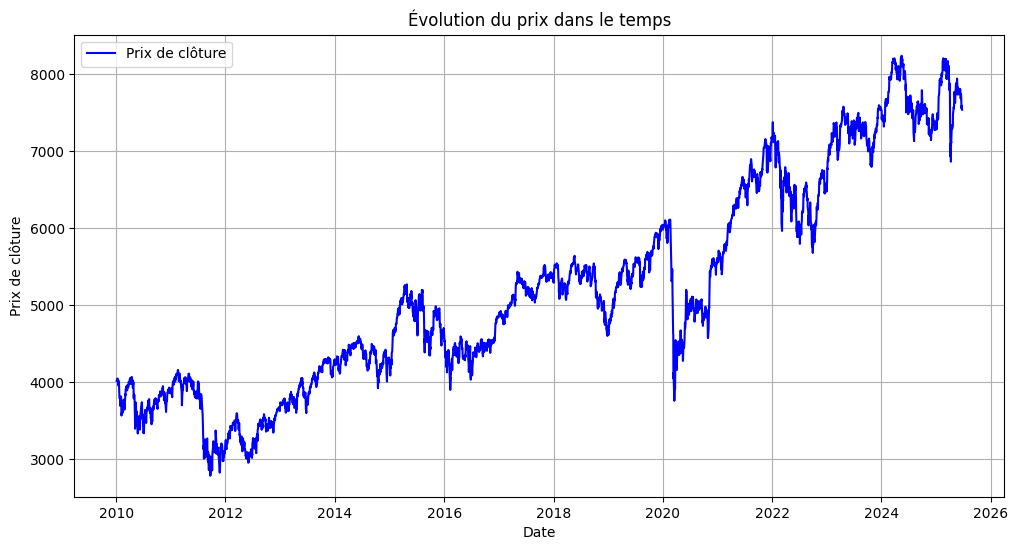

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(cac40.index, cac40['Close'], label='Prix de clôture', color='b')


plt.title('Évolution du prix dans le temps')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.legend()
plt.grid()

plt.show()

## **S&P 500 - Etats-Unis**

In [ ]:
import yfinance as yf

sp500 = yf.download("^GSPC", start="2010-01-01", end="2025-06-24")
sp500.columns = sp500.columns.droplevel(1)

/tmp/ipython-input-7-2471395917.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", start="2010-01-01", end="2025-06-24")
[*********************100%***********************]  1 of 1 completed


In [ ]:
sp500.shape

(3891, 5)

In [ ]:
mean = sp500['Close'].mean()
print("Moyenne :", mean)
median = sp500['Close'].median()
print("Médiane :", median)
std_dev = sp500['Close'].std()
print("Écart-type :", std_dev)
skewness = sp500['Close'].skew()
print("Asymétrie :", skewness)
min_price = sp500['Close'].min()
max_price = sp500['Close'].max()
print(f"Min: {min_price}, Max: {max_price}")

Moyenne : 2820.5815568510716
Médiane : 2477.570068359375
Écart-type : 1352.4157413187825
Asymétrie : 0.6773157696537322
Min: 1022.5800170898438, Max: 6144.14990234375


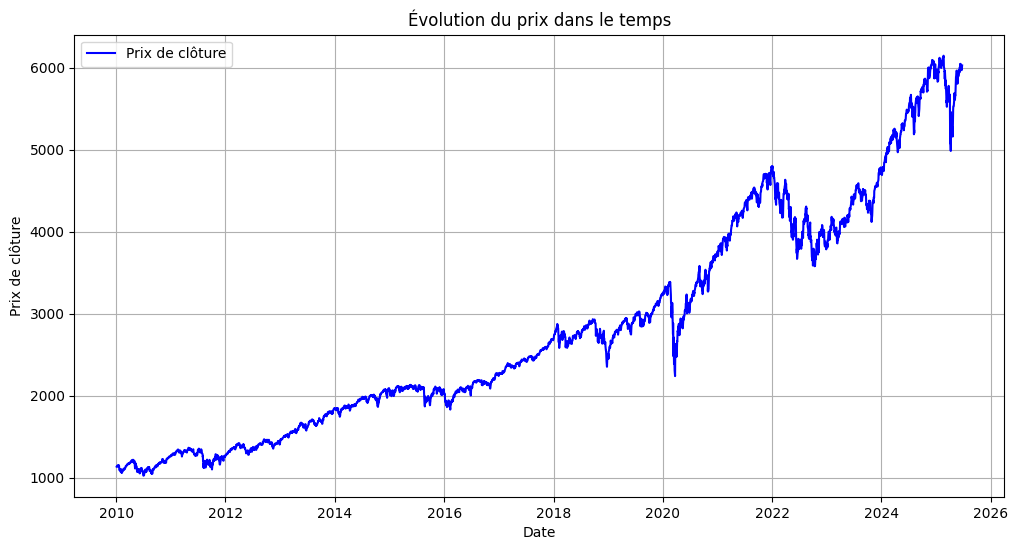

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(sp500.index, sp500['Close'], label='Prix de clôture', color='b')


plt.title('Évolution du prix dans le temps')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.legend()
plt.grid()

plt.show()

## **TASI - Arabie Saoudite**

In [ ]:
import yfinance as yf

tasi = yf.download("^TASI.SR", start="2010-01-01", end="2025-06-24")
tasi.columns = tasi.columns.droplevel(1)

/tmp/ipython-input-11-2289646678.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tasi = yf.download("^TASI.SR", start="2010-01-01", end="2025-06-24")
[*********************100%***********************]  1 of 1 completed


In [ ]:
tasi.shape

(3394, 5)

In [ ]:
mean = tasi['Close'].mean()
print("Moyenne :", mean)
median = tasi['Close'].median()
print("Médiane :", median)
std_dev = tasi['Close'].std()
print("Écart-type :", std_dev)
skewness = tasi['Close'].skew()
print("Asymétrie :", skewness)
min_price = tasi['Close'].min()
max_price = tasi['Close'].max()
print(f"Min: {min_price}, Max: {max_price}")

Moyenne : 8801.44825225812
Médiane : 8243.85498046875
Écart-type : 2109.9295204003647
Asymétrie : 0.44545183831034746
Min: 5323.27001953125, Max: 13820.349609375


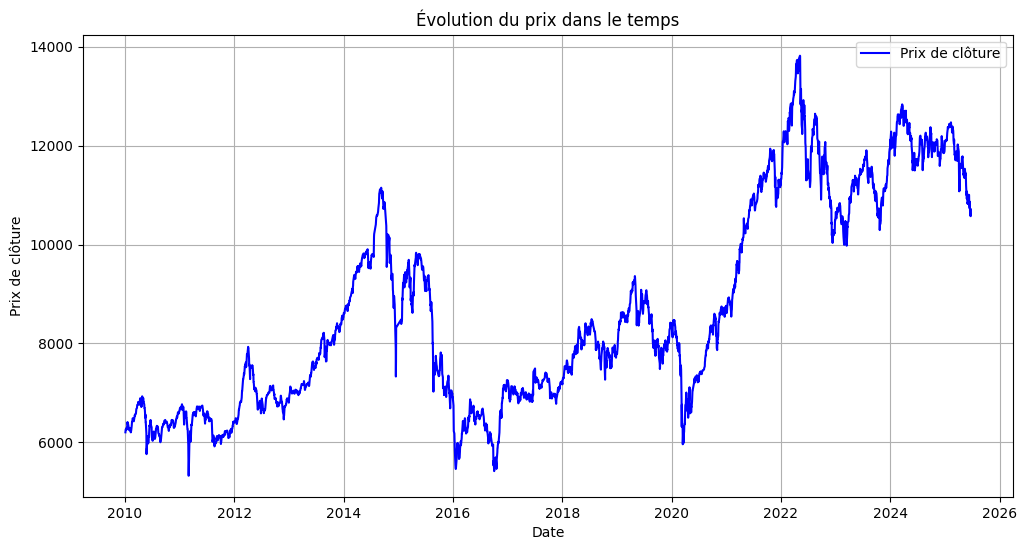

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(tasi.index, tasi['Close'], label='Prix de clôture', color='b')


plt.title('Évolution du prix dans le temps')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.legend()
plt.grid()

plt.show()

## **TUNINDEX - Tunisie**

In [ ]:
tunindex = pd.read_csv("/content/drive/MyDrive/STAGE-PFE/Tunindex.csv", parse_dates=["Date"], index_col="Date")


/tmp/ipython-input-14-1956648744.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  tunindex = pd.read_csv("/content/drive/MyDrive/STAGE-PFE/Tunindex.csv", parse_dates=["Date"], index_col="Date")


In [ ]:
tunindex['Dernier'] = tunindex['Dernier'].str.replace('.', '', regex=False)

In [ ]:
tunindex['Dernier'] = tunindex['Dernier'].str.replace(',', '.', regex=False)

In [ ]:
tunindex['Dernier'] = tunindex['Dernier'].astype(float)

In [ ]:
tunindex.shape

(3860, 6)

In [ ]:
mean = tunindex['Dernier'].mean()
print("Moyenne :", mean)
median = tunindex['Dernier'].median()
print("Médiane :", median)
std_dev = tunindex['Dernier'].std()
print("Écart-type :", std_dev)
skewness = tunindex['Dernier'].skew()
print("Asymétrie :", skewness)
min_price = tunindex['Dernier'].min()
max_price = tunindex['Dernier'].max()
print(f"Min: {min_price}, Max: {max_price}")

Moyenne : 6419.639766839378
Médiane : 6179.24
Écart-type : 1689.6448665955652
Asymétrie : 0.7646524018095736
Min: 4058.53, Max: 11521.93


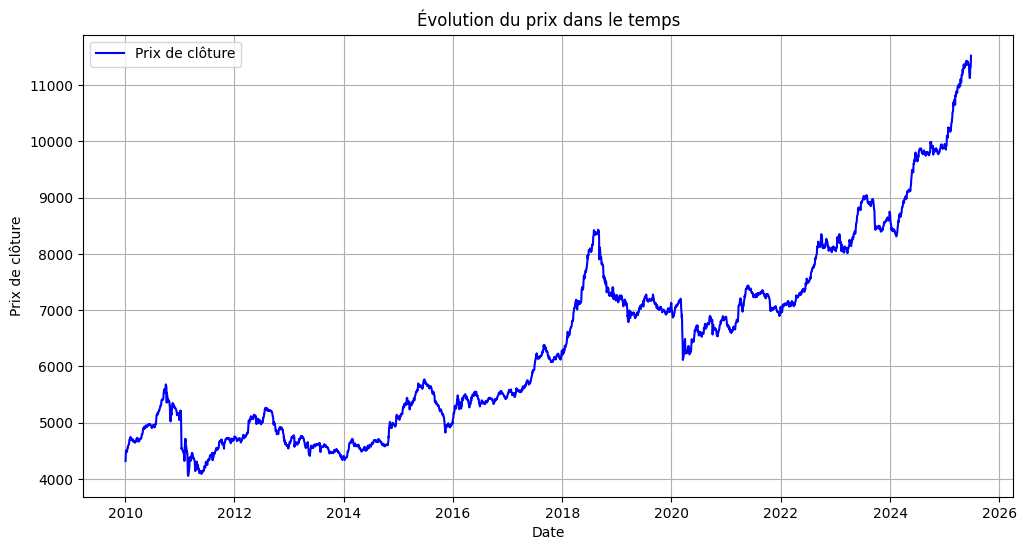

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(tunindex.index, tunindex['Dernier'], label='Prix de clôture', color='b')


plt.title('Évolution du prix dans le temps')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.legend()
plt.grid()

plt.show()

In [ ]:
tunindex

Dernier       Ouv.  Plus Haut   Plus Bas     Vol. Variation %
Date                                                                      
2025-06-25  11521.93  11.385,03  11.521,93  11.380,18  707,20K       1,19%
2025-06-24  11386.45  11.321,59  11.386,45  11.306,13  711,49K       0,57%
2025-06-23  11321.59  11.299,23  11.333,77  11.243,38  454,52K       0,21%
2025-06-20  11297.63  11.196,26  11.297,63  11.196,26  377,73K       0,95%
2025-06-19  11191.12  11.130,50  11.201,57  11.115,88  324,33K       0,57%
...              ...        ...        ...        ...      ...         ...
2010-01-08   4492.02   4.513,73   4.529,69   4.484,47      NaN      -0,37%
2010-01-07   4508.51   4.469,36   4.508,51   4.469,36      NaN       0,90%
2010-01-06   4468.48   4.415,50   4.469,08   4.415,50      NaN       1,45%
2010-01-05   4404.72   4.322,21   4.404,72   4.322,21      NaN       1,95%
2010-01-04   4320.31   4.295,65   4.320,55   4.295,02      NaN       0,67%

[3860 rows x 6 columns]

Notre Dataset de 3000 observations, contient 4 colonnes.

- **Open** : Le prix d’ouverture de l’indice pour une journée donnée ;
- **High** : Le prix le plus élevé atteint pendant la séance ;
- **Low** : Le prix le plus bas enregistré pendant la séance ;
- **Close** : Le prix de clôture de l’indice.

In [ ]:
# plt.figure(figsize=(10, 6))
# sns.histplot(returns, bins=50, kde=True, color='skyblue', stat="density", edgecolor="black")

# plt.title("Histogramme et densité des rendements")
# plt.xlabel("Rendements")
# plt.ylabel("Densité")
# plt.grid(True)
# plt.show()

**Regroupement des données dans un seul dataframe**

In [ ]:
prix_df = pd.DataFrame({
    'Tunindex': tunindex['Dernier'],
    'CAC40': cac40['Close'],
    'SP500': sp500['Close'],
    'TASI': tasi['Close']
})

In [ ]:
prix_df

Tunindex        CAC40        SP500          TASI
Date                                                        
2010-01-04   4320.31  4013.969971  1132.989990   6201.759766
2010-01-05   4404.72  4012.909912  1136.520020   6239.100098
2010-01-06   4468.48  4017.669922  1137.140015   6260.899902
2010-01-07   4508.51  4024.800049  1141.689941   6260.899902
2010-01-08   4492.02  4045.139893  1144.979980           NaN
...              ...          ...          ...           ...
2025-06-20  11297.63  7589.660156  5967.839844           NaN
2025-06-22       NaN          NaN          NaN  10574.269531
2025-06-23  11321.59  7537.569824  6025.169922  10710.240234
2025-06-24  11386.45          NaN          NaN           NaN
2025-06-25  11521.93          NaN          NaN           NaN

[4351 rows x 4 columns]

In [ ]:
prix_df.dropna(inplace=True)

In [ ]:
prix_df

Tunindex        CAC40        SP500          TASI
Date                                                        
2010-01-04   4320.31  4013.969971  1132.989990   6201.759766
2010-01-05   4404.72  4012.909912  1136.520020   6239.100098
2010-01-06   4468.48  4017.669922  1137.140015   6260.899902
2010-01-07   4508.51  4024.800049  1141.689941   6260.899902
2010-01-11   4503.94  4043.090088  1146.979980   6291.390137
...              ...          ...          ...           ...
2025-06-12  11323.18  7765.109863  6045.259766  10840.940430
2025-06-16  11126.24  7742.240234  6033.109863  10867.040039
2025-06-17  11127.99  7683.729980  5982.720215  10713.820312
2025-06-18  11127.75  7656.120117  5980.870117  10591.129883
2025-06-23  11321.59  7537.569824  6025.169922  10710.240234

[2851 rows x 4 columns]

### **Calculons les rendements logarithmiques**

In [ ]:
log_returns = np.log(prix_df / prix_df.shift(1)).dropna()
print(log_returns.head())


            Tunindex     CAC40     SP500      TASI
Date                                              
2010-01-05  0.019350 -0.000264  0.003111  0.006003
2010-01-06  0.014372  0.001185  0.000545  0.003488
2010-01-07  0.008918  0.001773  0.003993  0.000000
2010-01-11 -0.001014  0.004534  0.004623  0.004858
2010-01-12 -0.002399 -0.010702 -0.009425 -0.004002


In [ ]:
log_returns

Tunindex     CAC40     SP500      TASI
Date                                              
2010-01-05  0.019350 -0.000264  0.003111  0.006003
2010-01-06  0.014372  0.001185  0.000545  0.003488
2010-01-07  0.008918  0.001773  0.003993  0.000000
2010-01-11 -0.001014  0.004534  0.004623  0.004858
2010-01-12 -0.002399 -0.010702 -0.009425 -0.004002
...              ...       ...       ...       ...
2025-06-12 -0.001802 -0.001389  0.003815 -0.015022
2025-06-16 -0.017546 -0.002950 -0.002012  0.002405
2025-06-17  0.000157 -0.007586 -0.008387 -0.014200
2025-06-18 -0.000022 -0.003600 -0.000309 -0.011518
2025-06-23  0.017270 -0.015606  0.007380  0.011183

[2850 rows x 4 columns]

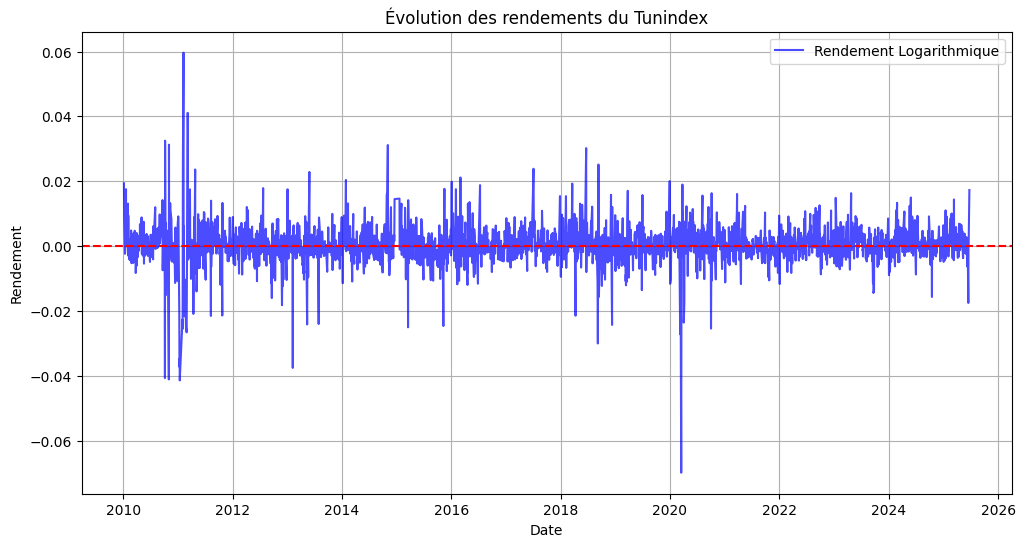

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(log_returns.index, log_returns['Tunindex'], label='Rendement Logarithmique', color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Ligne de référence à 0

plt.title("Évolution des rendements du Tunindex")
plt.xlabel("Date")
plt.ylabel("Rendement")
plt.legend()
plt.grid()

plt.show()

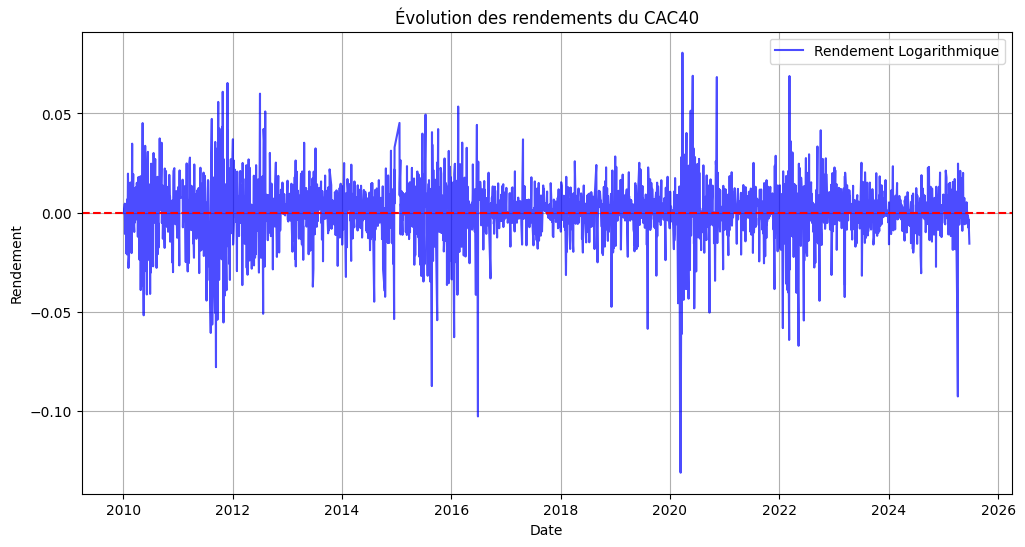

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(log_returns.index, log_returns['CAC40'], label='Rendement Logarithmique', color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Ligne de référence à 0

plt.title("Évolution des rendements du CAC40")
plt.xlabel("Date")
plt.ylabel("Rendement")
plt.legend()
plt.grid()

plt.show()

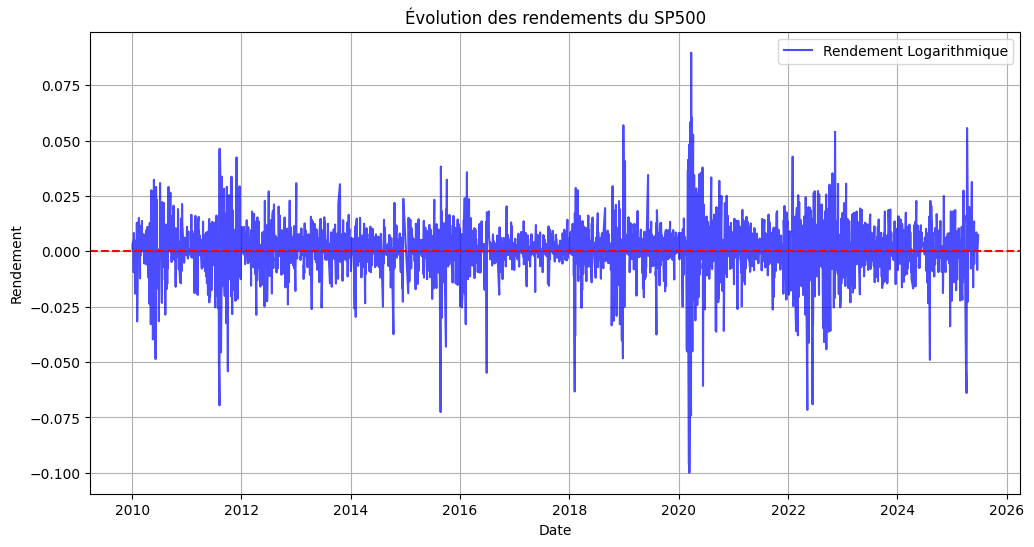

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(log_returns.index, log_returns['SP500'], label='Rendement Logarithmique', color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Ligne de référence à 0

plt.title("Évolution des rendements du SP500")
plt.xlabel("Date")
plt.ylabel("Rendement")
plt.legend()
plt.grid()

plt.show()

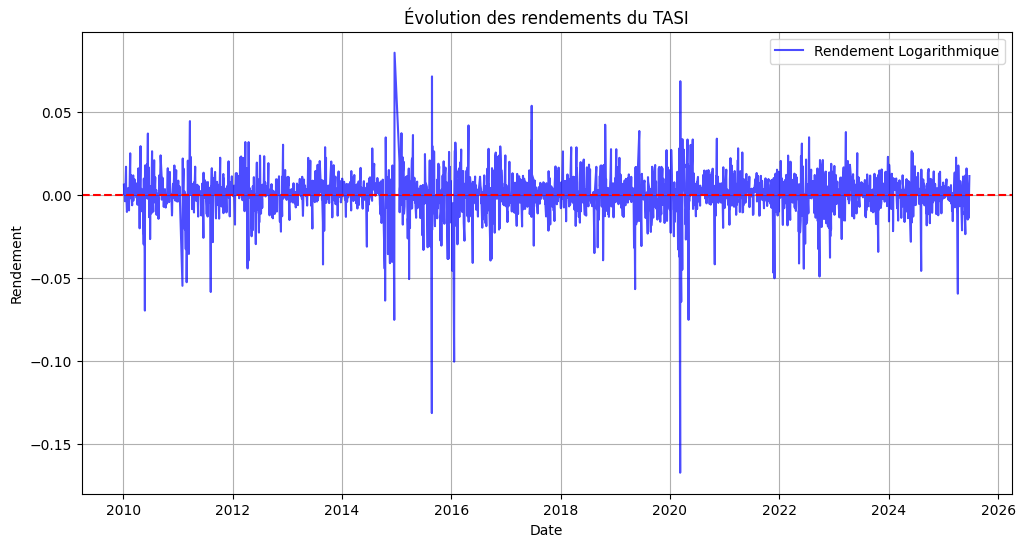

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(log_returns.index, log_returns['TASI'], label='Rendement Logarithmique', color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Ligne de référence à 0

plt.title("Évolution des rendements du TASI")
plt.xlabel("Date")
plt.ylabel("Rendement")
plt.legend()
plt.grid()

plt.show()

## **Choisir les pondérations**

###**Option 1 :  pondérations égales**

In [ ]:
weights = np.array([0.25, 0.25, 0.25, 0.25])  # 4 indices


**Calculons le rendement du portefeuille**

In [ ]:
# Produit matriciel : rendements x poids
portfolio_returns = log_returns @ weights


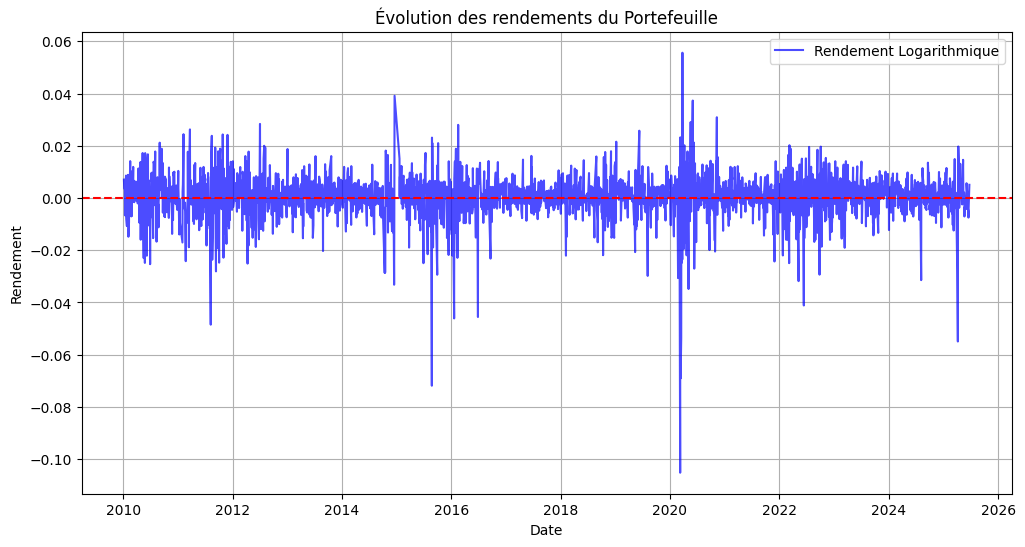

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(portfolio_returns.index, portfolio_returns, label='Rendement Logarithmique', color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')

plt.title("Évolution des rendements du Portefeuille")
plt.xlabel("Date")
plt.ylabel("Rendement")
plt.legend()
plt.grid()

plt.show()

**Calcul de la VaR**

In [ ]:

VaR_95_option1 = -np.percentile(portfolio_returns, (1 - 0.95) * 100)
VaR_99_option1 = -np.percentile(portfolio_returns, (1 - 0.99) * 100)
print(f"VaR historique à 95% : {VaR_95_option1:.4f}")
print(f"VaR historique à 99% : {VaR_99_option1:.4f}")

VaR historique à 95% : 0.0120
VaR historique à 99% : 0.0245


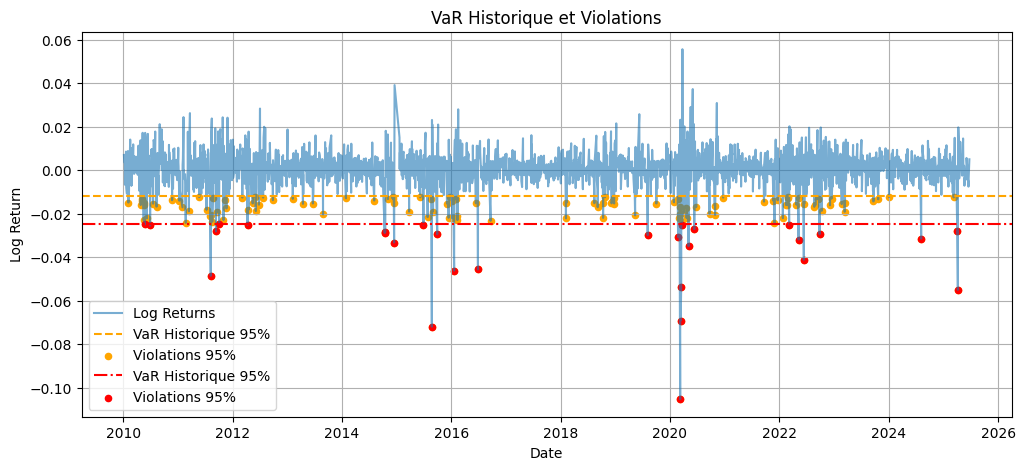

Taux Violation à 95% : 5.02%
Taux Violation à 99% : 1.02%


In [ ]:
# Backtesting
violations_95 = portfolio_returns[portfolio_returns < -VaR_95_option1]
violations_99 = portfolio_returns[portfolio_returns < -VaR_99_option1]

taux_viol_95 = len(violations_95) / len(portfolio_returns)
taux_viol_99 = len(violations_99) / len(portfolio_returns)


# Visualisation
plt.figure(figsize=(12, 5))
plt.plot(portfolio_returns.index, portfolio_returns, label="Log Returns", alpha=0.6)
plt.axhline(-VaR_95_option1, color='orange', linestyle='--', label='VaR Historique 95%')
plt.scatter(violations_95.index, violations_95, color='orange', label='Violations 95%', s=20)

plt.axhline(-VaR_99_option1, color='red', linestyle='-.', label='VaR Historique 95%')
plt.scatter(violations_99.index, violations_99, color='red', label='Violations 95%', s=20)

plt.title("VaR Historique et Violations")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend()
plt.grid(True)
plt.show()


print(f"Taux Violation à 95% : {taux_viol_95*100:.2f}%")
print(f"Taux Violation à 99% : {taux_viol_99*100:.2f}%")

###**Option 2 :  Pondérations inverses à la volatilité**

In [ ]:
vols = log_returns.std()
print("Volatilité de chaque indice :\n", vols)

inv_vols = 1 / vols

# 3. Normaliser les poids pour que la somme = 1
weights = inv_vols / inv_vols.sum()
print("Pondérations inverses à la volatilité :\n", weights)


Volatilité de chaque indice :
 Tunindex    0.006040
CAC40       0.014668
SP500       0.012462
TASI        0.012324
dtype: float64
Pondérations inverses à la volatilité :
 Tunindex    0.419007
CAC40       0.172548
SP500       0.203085
TASI        0.205360
dtype: float64


**Calculons le rendement du portefeuille**

In [ ]:
# Produit matriciel : rendements x poids
portfolio_returns = log_returns @ weights


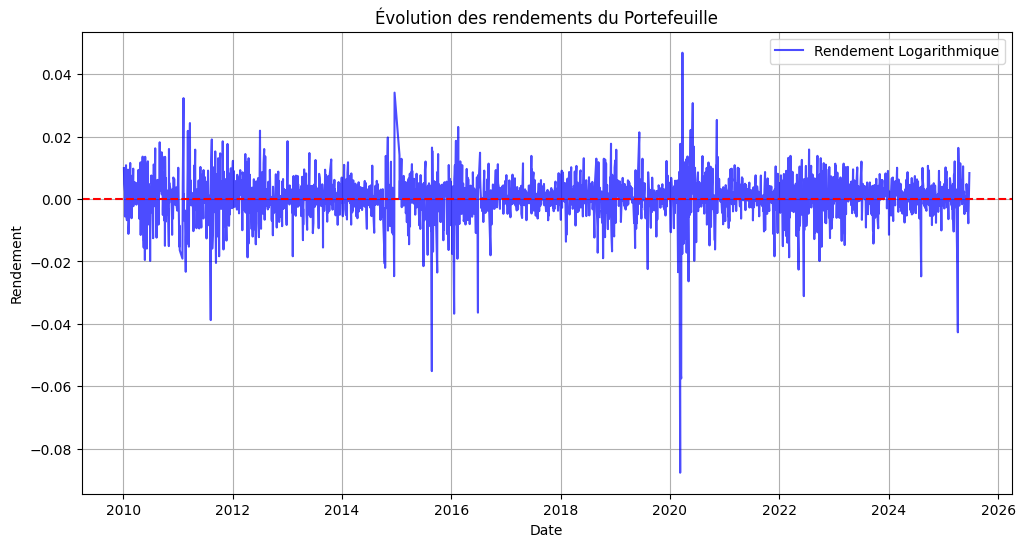

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(portfolio_returns.index, portfolio_returns, label='Rendement Logarithmique', color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Ligne de référence à 0

plt.title("Évolution des rendements du Portefeuille")
plt.xlabel("Date")
plt.ylabel("Rendement")
plt.legend()
plt.grid()

plt.show()

**Calcul de la VaR historique**

In [ ]:
VaR_95_option2 = -np.percentile(portfolio_returns, (1 - 0.95) * 100)
VaR_99_option2 = -np.percentile(portfolio_returns, (1 - 0.99) * 100)
print(f"VaR historique à 95% : {VaR_95_option2:.4f}")
print(f"VaR historique à 99% : {VaR_99_option2:.4f}")

VaR historique à 95% : 0.0099
VaR historique à 99% : 0.0188


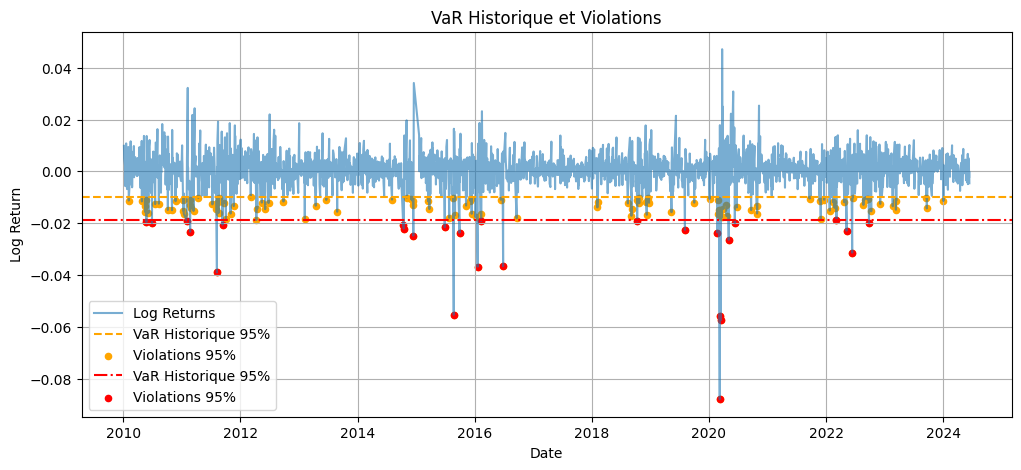

Taux Violation à 95% : 5.02%
Taux Violation à 99% : 1.01%


In [ ]:
# Backtesting
violations_95 = portfolio_returns[portfolio_returns < -VaR_95_option2]
violations_99 = portfolio_returns[portfolio_returns < -VaR_99_option2]

taux_viol_95 = len(violations_95) / len(portfolio_returns)
taux_viol_99 = len(violations_99) / len(portfolio_returns)


# Visualisation
plt.figure(figsize=(12, 5))
plt.plot(portfolio_returns.index, portfolio_returns, label="Log Returns", alpha=0.6)
plt.axhline(-VaR_95_option2, color='orange', linestyle='--', label='VaR Historique 95%')
plt.scatter(violations_95.index, violations_95, color='orange', label='Violations 95%', s=20)

plt.axhline(-VaR_99_option2, color='red', linestyle='-.', label='VaR Historique 95%')
plt.scatter(violations_99.index, violations_99, color='red', label='Violations 95%', s=20)

plt.title("VaR Historique et Violations")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend()
plt.grid(True)
plt.show()


print(f"Taux Violation à 95% : {taux_viol_95*100:.2f}%")
print(f"Taux Violation à 99% : {taux_viol_99*100:.2f}%")

### **Optimisation de Markowitz**

In [ ]:
import cvxpy as cp
import numpy as np

mu = log_returns.mean()
cov = log_returns.cov()
n = len(mu)

# Variables d'optimisation
w = cp.Variable(n)


target_return = mu.mean()

portfolio_var = cp.quad_form(w, cov)
objective = cp.Minimize(portfolio_var)

constraints = [
    cp.sum(w) == 1,
    w >= 0,
    mu.values @ w >= target_return
]

# Résolution
problem = cp.Problem(objective, constraints)
problem.solve()

# Résultat
optimal_weights = w.value
for i, col in enumerate(log_returns.columns):
    print(f"{col} : poids optimal = {optimal_weights[i]:.4f}")


Tunindex : poids optimal = 0.7490
CAC40 : poids optimal = 0.0154
SP500 : poids optimal = 0.1351
TASI : poids optimal = 0.1005


In [ ]:
portfolio_returns = log_returns @ optimal_weights

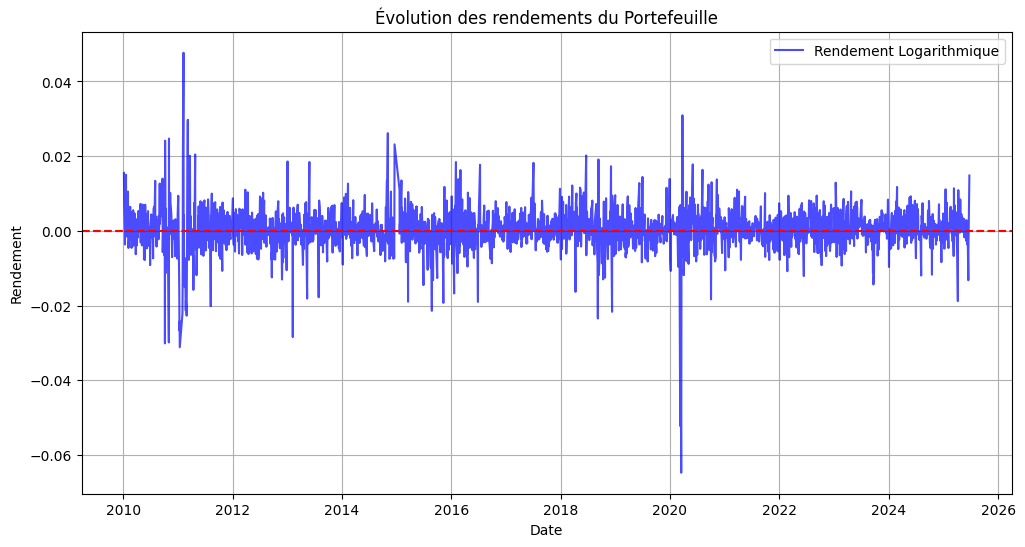

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(portfolio_returns.index, portfolio_returns, label='Rendement Logarithmique', color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Ligne de référence à 0

plt.title("Évolution des rendements du Portefeuille")
plt.xlabel("Date")
plt.ylabel("Rendement")
plt.legend()
plt.grid()

plt.show()

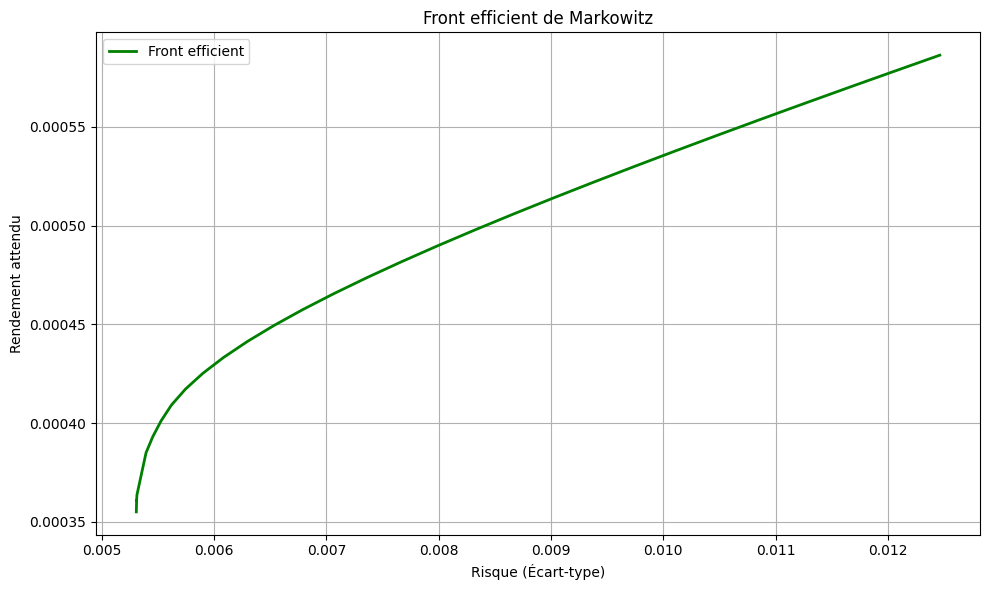

In [ ]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

mu = log_returns.mean()
cov = log_returns.cov()
n = len(mu)

# Définir une gamme de rendements cibles
target_returns = np.linspace(mu.min(), mu.max(), 50)

risques = []
rendements = []
poids_portefeuilles = []

for r in target_returns:
    w = cp.Variable(n)
    objective = cp.Minimize(cp.quad_form(w, cov))
    constraints = [
        cp.sum(w) == 1,
        w >= 0,
        mu.values @ w >= r
    ]
    prob = cp.Problem(objective, constraints)
    prob.solve()

    if w.value is not None:
        poids_portefeuilles.append(w.value)
        port_return = mu.values @ w.value
        port_risk = np.sqrt(w.value.T @ cov.values @ w.value)
        rendements.append(port_return)
        risques.append(port_risk)

plt.figure(figsize=(10, 6))
plt.plot(risques, rendements, label='Front efficient', color='green', lw=2)
plt.xlabel("Risque (Écart-type)")
plt.ylabel("Rendement attendu")
plt.title("Front efficient de Markowitz")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**Etude de la contagion**

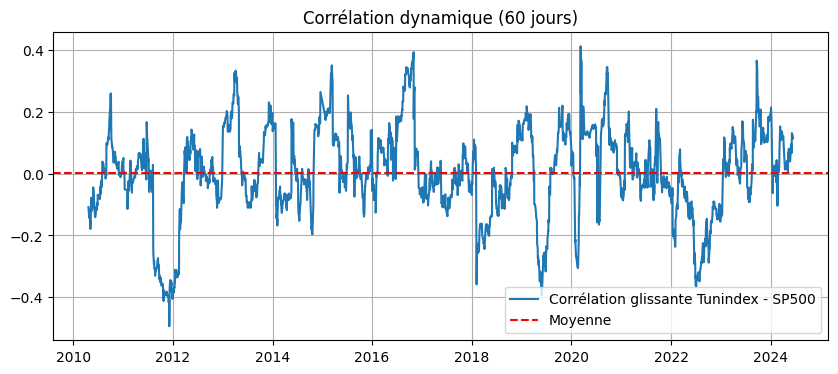

In [ ]:
# Corrélation glissante sur 60 jours entre Tunindex et SP500
rolling_corr = log_returns['Tunindex'].rolling(window=60).corr(log_returns['SP500'])

# Visualisation
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(rolling_corr, label='Corrélation glissante Tunindex - SP500')
plt.axhline(rolling_corr.mean(), color='red', linestyle='--', label='Moyenne')
plt.title('Corrélation dynamique (60 jours)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Rendements journaliers
r_tunindex = log_returns['Tunindex']
r_sp500 = log_returns['SP500']

seuil_var = np.percentile(r_sp500, 5)

jours_stress = r_sp500[r_sp500 <= seuil_var].index
r_tunindex_conditionnel = r_tunindex.loc[jours_stress]

#  CoVaR
CoVaR_95 = -np.percentile(r_tunindex_conditionnel, 5)

print(f"CoVaR 95% de Tunindex | SP500 en stress : {CoVaR_95:.5f}")


CoVaR 95% de Tunindex | SP500 en stress : 0.00997


In [ ]:
VaR_tunindex = -np.percentile(r_tunindex, 5)
print(f"VaR 95% Tunindex : {VaR_tunindex:.5f}")


VaR 95% Tunindex : 0.00752


Si CoVaR_95 est nettement plus grande (plus de perte) que la VaR normale du Tunindex,
→ Il y a effet de contagion.

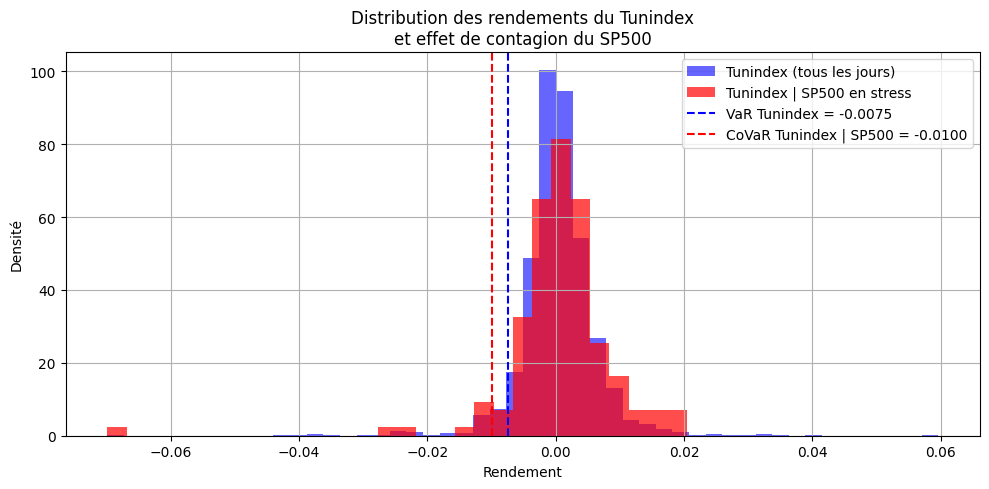

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Histogramme des rendements du Tunindex (
plt.hist(r_tunindex, bins=50, alpha=0.6, label='Tunindex (tous les jours)', color='blue', density=True)

# Histogramme des rendements conditionnels (SP500 en stress)
plt.hist(r_tunindex_conditionnel, bins=30, alpha=0.7, label='Tunindex | SP500 en stress', color='red', density=True)

#  CoVaR et  VaR standard
plt.axvline(-VaR_tunindex, color='blue', linestyle='--', label=f'VaR Tunindex = {-VaR_tunindex:.4f}')
plt.axvline(-CoVaR_95, color='red', linestyle='--', label=f'CoVaR Tunindex | SP500 = {-CoVaR_95:.4f}')

plt.title("Distribution des rendements du Tunindex\net effet de contagion du SP500")
plt.xlabel("Rendement")
plt.ylabel("Densité")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Intégration de leffet contagion pour le calcul des poids optimaux**

In [ ]:

quantile_threshold = 0.05

# Dictionnaire pour stocker les événements extrêmes (pertes)
extreme_events = {}
for col in log_returns.columns:
    seuil = log_returns[col].quantile(quantile_threshold)
    extreme_events[col] = log_returns[col] < seuil

# Matrice de contagion (probabilités conditionnelles)
assets = log_returns.columns
contagion_matrix = pd.DataFrame(index=assets, columns=assets)

for i in assets:
    for j in assets:
        if i == j:
            contagion_matrix.loc[i, j] = 1.0
        else:
            A = extreme_events[i]
            B = extreme_events[j]
            contagion = (A & B).sum() / A.sum()
            contagion_matrix.loc[i, j] = round(contagion, 2)

contagion_matrix = contagion_matrix.astype(float)
print(contagion_matrix)


          Tunindex  CAC40  SP500  TASI
Tunindex      1.00   0.08   0.07  0.10
CAC40         0.08   1.00   0.47  0.27
SP500         0.07   0.47   1.00  0.20
TASI          0.10   0.27   0.20  1.00


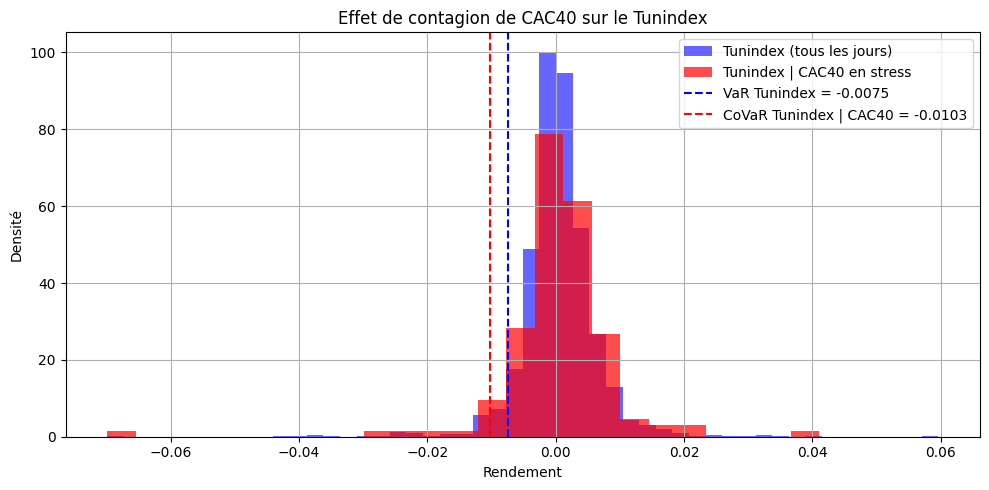

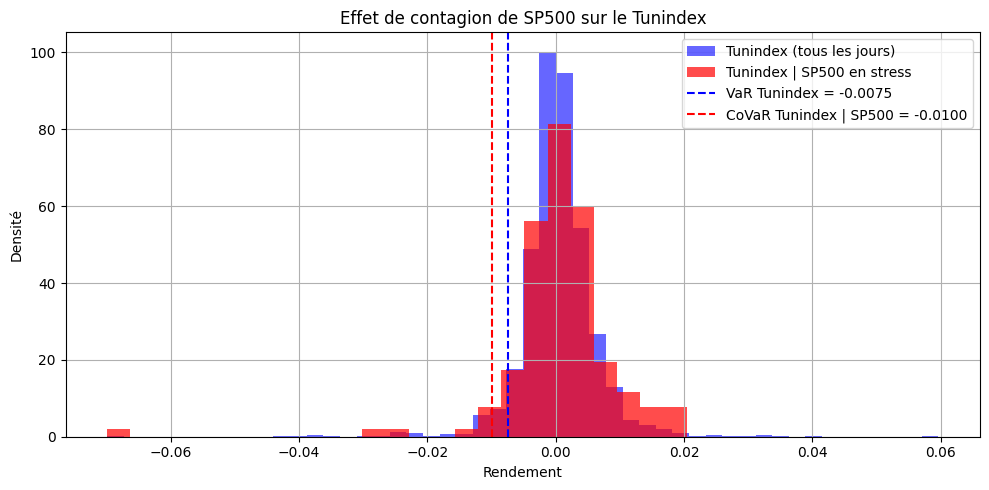

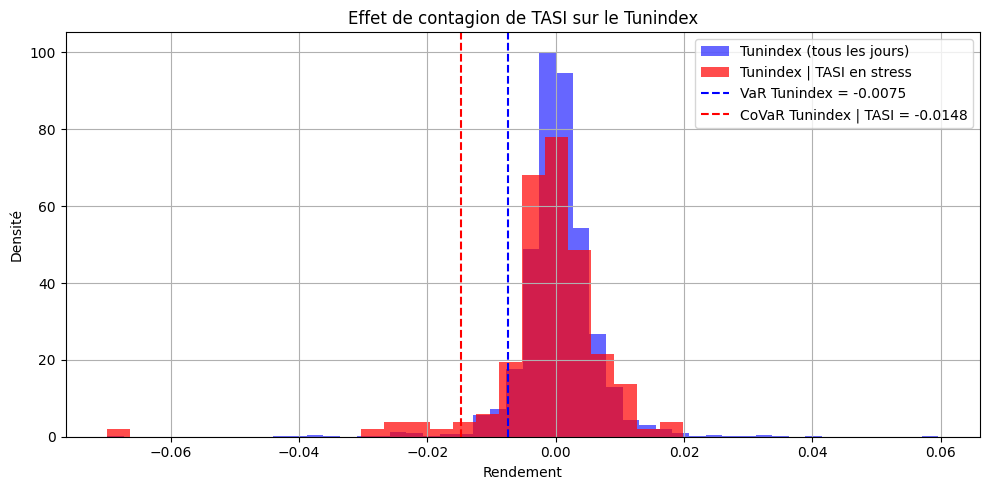

In [ ]:
import matplotlib.pyplot as plt

indices = ['CAC40', 'SP500', 'TASI']
stress_quantile = 0.05  # Seuil de stress
bins = 50

for idx in indices:
    # Condition de stress sur l'indice j
    stress_condition = log_returns[idx] < log_returns[idx].quantile(stress_quantile)
    r_tunindex_cond = log_returns.loc[stress_condition, 'Tunindex']
    r_tunindex_all = log_returns['Tunindex']
    VaR_tun = -np.quantile(r_tunindex_all, stress_quantile)
    CoVaR = -np.quantile(r_tunindex_cond, stress_quantile)

    # Affichage
    plt.figure(figsize=(10, 5))
    plt.hist(r_tunindex_all, bins=bins, alpha=0.6, label='Tunindex (tous les jours)', color='blue', density=True)
    plt.hist(r_tunindex_cond, bins=int(bins/2), alpha=0.7, label=f'Tunindex | {idx} en stress', color='red', density=True)

    plt.axvline(-VaR_tun, color='blue', linestyle='--', label=f'VaR Tunindex = {-VaR_tun:.4f}')
    plt.axvline(-CoVaR, color='red', linestyle='--', label=f'CoVaR Tunindex | {idx} = {-CoVaR:.4f}')

    plt.title(f"Effet de contagion de {idx} sur le Tunindex")
    plt.xlabel("Rendement")
    plt.ylabel("Densité")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"covar_tunindex_{idx.lower()}.png")
    plt.show()


**Matrice de contagion**

In [ ]:
window = 60
tickers = log_returns.columns
n = len(tickers)

contagion_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:
            # rolling corr entre i et j
            corr_rolling = log_returns[tickers[i]].rolling(window).corr(log_returns[tickers[j]])

            threshold = 0.6
            contagion_score = corr_rolling[corr_rolling > threshold].mean()
            contagion_matrix[i, j] = contagion_score if not np.isnan(contagion_score) else 0
        else:
            contagion_matrix[i, j] = 0

contagion_df = pd.DataFrame(contagion_matrix, index=tickers, columns=tickers)

print("Matrice de contagion estimée :")
print(contagion_df)


Matrice de contagion estimée :
          Tunindex     CAC40     SP500      TASI
Tunindex       0.0  0.000000  0.000000  0.000000
CAC40          0.0  0.000000  0.720643  0.639121
SP500          0.0  0.720643  0.000000  0.621449
TASI           0.0  0.639121  0.621449  0.000000


In [ ]:
def nearest_psd(A):
    """Projette A sur la matrice PSD la plus proche."""
    import numpy as np

    B = (A + A.T) / 2
    eigvals, eigvecs = np.linalg.eigh(B)
    eigvals[eigvals < 0] = 0
    # Reconstruire la matrice
    return eigvecs @ np.diag(eigvals) @ eigvecs.T

cov_penalized = cov + lambda_penalty * contagion_df.values
cov_penalized = nearest_psd(cov_penalized)


In [ ]:
import cvxpy as cp

mu = log_returns.mean()
n = len(mu)

w = cp.Variable(n)
target_return = mu.mean()

objective = cp.Minimize(cp.quad_form(w, cov_penalized))
constraints = [cp.sum(w) == 1, w >= 0, mu.values @ w >= target_return]

problem = cp.Problem(objective, constraints)
problem.solve()

optimal_weights_penalized = w.value

for i, col in enumerate(log_returns.columns):
    print(f"{col} poids pénalisé = {optimal_weights_penalized[i]:.4f}")


Tunindex poids pénalisé = 0.8615
CAC40 poids pénalisé = -0.0000
SP500 poids pénalisé = 0.1385
TASI poids pénalisé = -0.0000


## **Simulation par Monte Carlo**

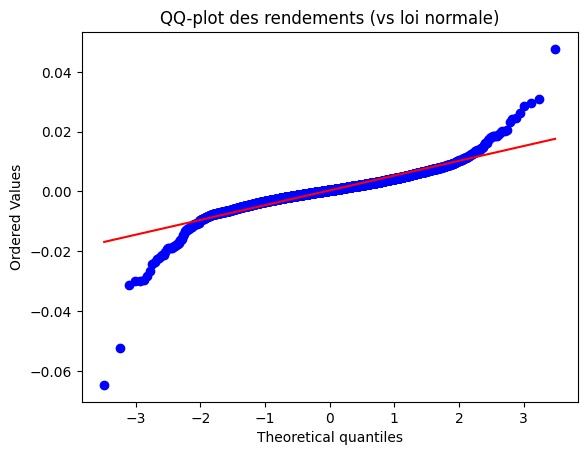

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

stats.probplot(portfolio_returns.dropna(), dist="norm", plot=plt)
plt.title("QQ-plot des rendements (vs loi normale)")
plt.show()


In [ ]:
mu, sigma = np.mean(portfolio_returns), np.std(portfolio_returns)
ks_stat, p_value = stats.kstest(portfolio_returns, 'norm', args=(mu, sigma))

print("=== Test de Kolmogorov-Smirnov ===")
print(f"Statistique K-S : {ks_stat:.4f}")
print(f"P-valeur : {p_value:.4f}")

# Interprétation
alpha = 0.05
if p_value > alpha:
    print("On ne rejette pas H0 : Les données suivent une loi normale.")
else:
    print("On rejette H0 : Les données ne suivent pas une loi normale.")


=== Test de Kolmogorov-Smirnov ===
Statistique K-S : 0.0862
P-valeur : 0.0000
On rejette H0 : Les données ne suivent pas une loi normale.


P-value du test de normalité : 7.650446480534344e-44


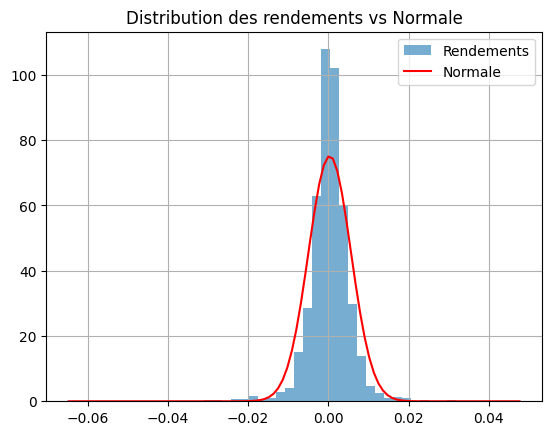

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Test de Shapiro-Wilk
stat, p_value = stats.shapiro(portfolio_returns)
print(f"P-value du test de normalité : {p_value}")

# Histogramme + loi normale en superposition
plt.hist(portfolio_returns, bins=50, density=True, alpha=0.6, label="Rendements")
mu, sigma = portfolio_returns.mean(), portfolio_returns.std()
x = np.linspace(portfolio_returns.min(), portfolio_returns.max(), 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label="Normale", color='red')
plt.legend()
plt.title("Distribution des rendements vs Normale")
plt.grid(True)
plt.show()



### **Loi de student**

In [ ]:
from scipy.stats import t

returns = portfolio_returns

df, loc, scale = t.fit(returns)
print(f"Degrés de liberté : {df:.2f}, moyenne : {loc:.4f}, échelle : {scale:.4f}")


Degrés de liberté : 3.03, moyenne : 0.0004, échelle : 0.0032


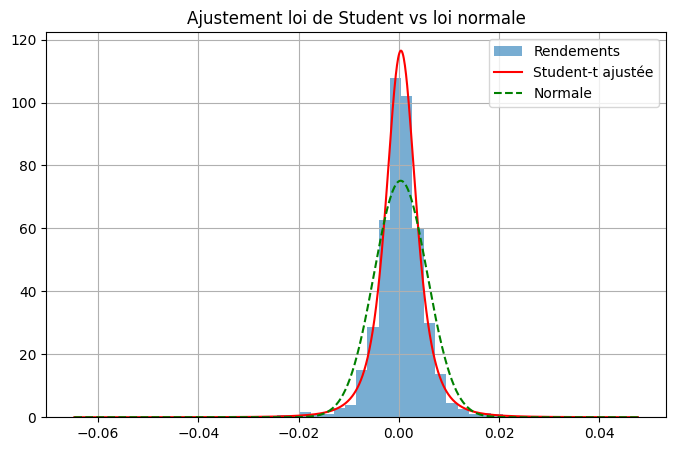

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

x = np.linspace(min(returns), max(returns), 1000)

plt.figure(figsize=(8, 5))
plt.hist(returns, bins=50, density=True, alpha=0.6, label="Rendements")
plt.plot(x, t.pdf(x, df, loc, scale), 'r-', label='Student-t ajustée')
plt.plot(x, norm.pdf(x, returns.mean(), returns.std()), 'g--', label='Normale')
plt.legend()
plt.title("Ajustement loi de Student vs loi normale")
plt.grid(True)
plt.show()


In [ ]:
alpha = 0.05

# Quantile de la loi de Student
VaR_t = - t.ppf(alpha, df, loc=loc, scale=scale)
print(f"VaR 95% avec loi de Student : {VaR_t:.5f}")


VaR 95% avec loi de Student : 0.00698


In [ ]:
portfolio_returns.index

DatetimeIndex(['2010-01-05', '2010-01-06', '2010-01-07', '2010-01-11',
               '2010-01-12', '2010-01-13', '2010-01-14', '2010-01-19',
               '2010-01-20', '2010-01-21',
               ...
               '2025-05-29', '2025-06-02', '2025-06-03', '2025-06-04',
               '2025-06-11', '2025-06-12', '2025-06-16', '2025-06-17',
               '2025-06-18', '2025-06-23'],
              dtype='datetime64[ns]', name='Date', length=2850, freq=None)

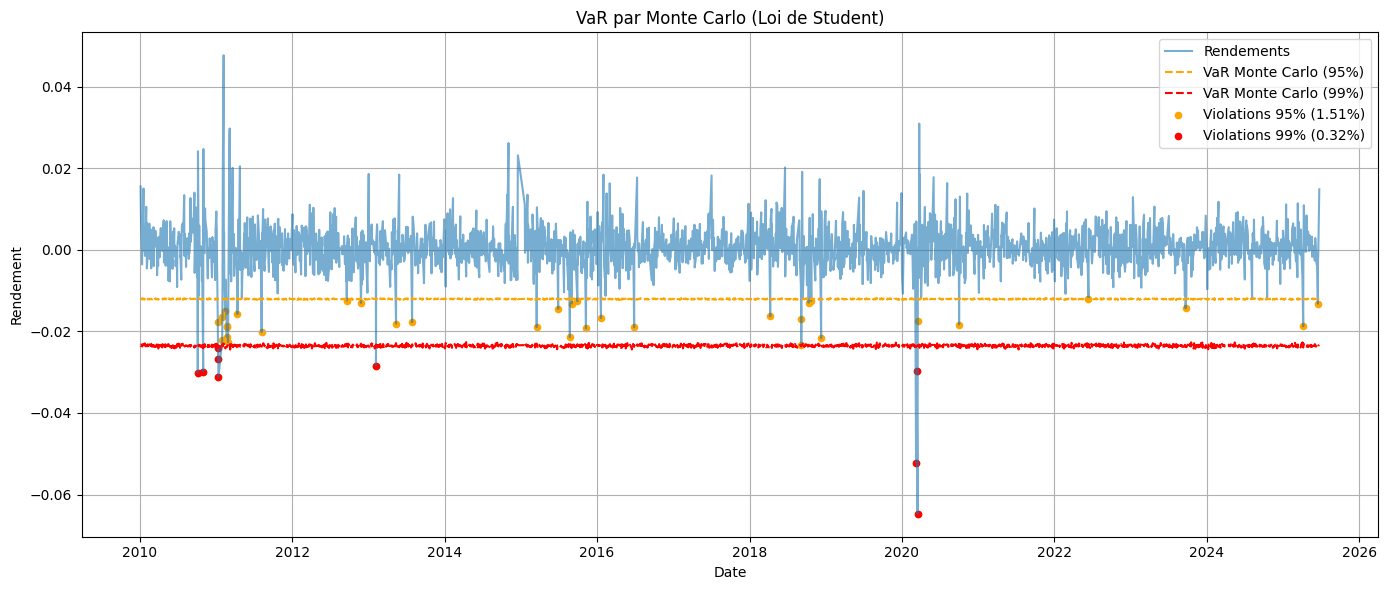

In [ ]:
simulated_returns = t.rvs(df=df, loc=mu, scale=sigma, size=(len(returns), 100000))

VaR_95 = -np.percentile(simulated_returns, 5, axis=1)
VaR_99 = -np.percentile(simulated_returns, 1, axis=1)

violations_95 = returns < -VaR_95
violations_99 = returns < -VaR_99

# Taux de violation
violation_rate_95 = violations_95.mean() * 100
violation_rate_99 = violations_99.mean() * 100

plt.figure(figsize=(14, 6))
plt.plot(returns.index, returns, label="Rendements", alpha=0.6)
plt.plot(returns.index, -VaR_95, color='orange', linestyle='--', label="VaR Monte Carlo (95%)")
plt.plot(returns.index, -VaR_99, color='red', linestyle='--', label="VaR Monte Carlo (99%)")
plt.scatter(returns.index[violations_95], returns[violations_95], color='orange', s=20, label=f"Violations 95% ({violation_rate_95:.2f}%)")
plt.scatter(returns.index[violations_99], returns[violations_99], color='red', s=20, label=f"Violations 99% ({violation_rate_99:.2f}%)")
plt.title("VaR par Monte Carlo (Loi de Student)")
plt.xlabel("Date")
plt.ylabel("Rendement")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Résultats
print(f"Monte Carlo VaR à 95% : {VaR_95.mean()*100:.3f}%")
print(f"Monte Carlo VaR à 99% : {VaR_99.mean()*100:.3f}%")
print(f"Taux de violation à 95% : {violation_rate_95:.2f}%")
print(f"Taux de violation à 99% : {violation_rate_99:.2f}%")


Monte Carlo VaR à 95% : 1.208%
Monte Carlo VaR à 99% : 2.353%
Taux de violation à 95% : 1.51%
Taux de violation à 99% : 0.32%


In [ ]:
from scipy.stats import genpareto

threshold = np.percentile(portfolio_returns, 5)
tail_losses = -(portfolio_returns[portfolio_returns < threshold] - threshold)

# Ajustement de la GPD
params = genpareto.fit(tail_losses)
shape, loc, scale = params
print(f"Paramètres GPD (queue gauche) : shape={shape:.4f}, scale={scale:.4f}")


Paramètres GPD (queue gauche) : shape=0.4748, scale=0.0031


In [ ]:
from scipy.stats import genpareto

alpha = 0.95
p_exceed = len(tail_losses) / len(portfolio_returns)

VaR = threshold - (scale / shape) * (( (1 - alpha)/p_exceed )**(-shape) - 1)
CVaR = VaR + (scale - shape * (VaR - threshold)) / (1 - shape)

print(f"VaR à {alpha*100:.0f}% : {VaR:.4f}")
print(f"CVaR à {alpha*100:.0f}% : {CVaR:.4f}")


VaR à 95% : -0.0068
CVaR à 95% : -0.0010


**Visualisation de l'ajustement**

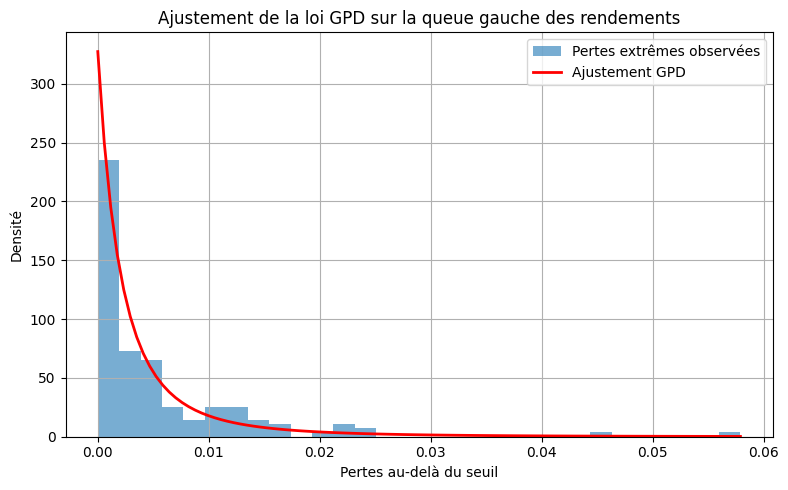

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genpareto


returns = portfolio_returns
threshold = np.percentile(returns, 5)
tail_losses = -(returns[returns < threshold] - threshold)
shape, loc, scale = genpareto.fit(tail_losses)


plt.figure(figsize=(8, 5))
x = np.linspace(min(tail_losses), max(tail_losses), 100)


plt.hist(tail_losses, bins=30, density=True, alpha=0.6, label="Pertes extrêmes observées")
plt.plot(x, genpareto.pdf(x, c=shape, loc=loc, scale=scale), 'r-', lw=2, label='Ajustement GPD')

plt.title("Ajustement de la loi GPD sur la queue gauche des rendements")
plt.xlabel("Pertes au-delà du seuil")
plt.ylabel("Densité")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


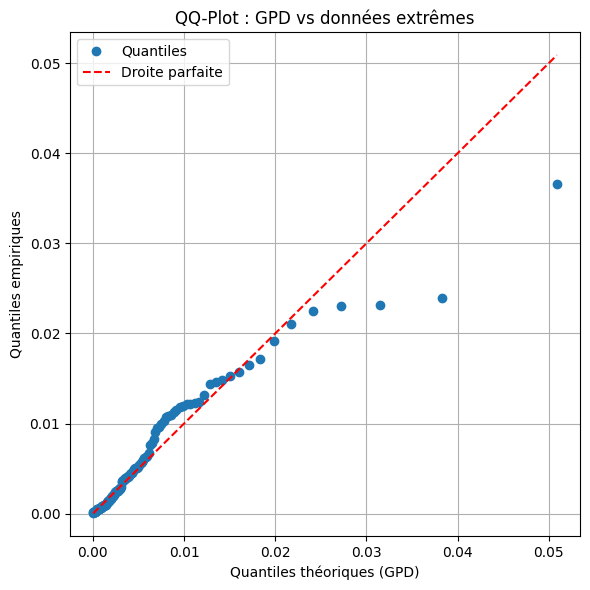

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Générer les quantiles théoriques
theoretical_quants = genpareto.ppf(np.linspace(0.01, 0.99, len(tail_losses)), c=shape, loc=loc, scale=scale)

empirical_quants = np.quantile(tail_losses, np.linspace(0.01, 0.99, len(tail_losses)))
plt.figure(figsize=(6, 6))
plt.plot(theoretical_quants, empirical_quants, 'o', label='Quantiles')
plt.plot(theoretical_quants, theoretical_quants, 'r--', label='Droite parfaite')
plt.title("QQ-Plot : GPD vs données extrêmes")
plt.xlabel("Quantiles théoriques (GPD)")
plt.ylabel("Quantiles empiriques")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import kstest

D, p_value = kstest(tail_losses, 'genpareto', args=(shape, loc, scale))
print(f"Statistique de test KS : {D:.4f}")
print(f"P-value : {p_value:.4f}")


Statistique de test KS : 0.0730
P-value : 0.4513


Si p-value > 0.05, alors on ne rejette pas l'hypothèse que les pertes suivent une GPD → bon ajustement

In [ ]:
n_sim = 100000
simulated_losses = genpareto.rvs(c=shape, loc=loc, scale=scale, size=n_sim)
simulated_returns = threshold - simulated_losses
VaR_95_evt = -np.percentile(simulated_returns, 5)
print(f"VaR 95% via EVT (queue gauche): {VaR_95_evt:.5f}")


VaR 95% via EVT (queue gauche): 0.03727


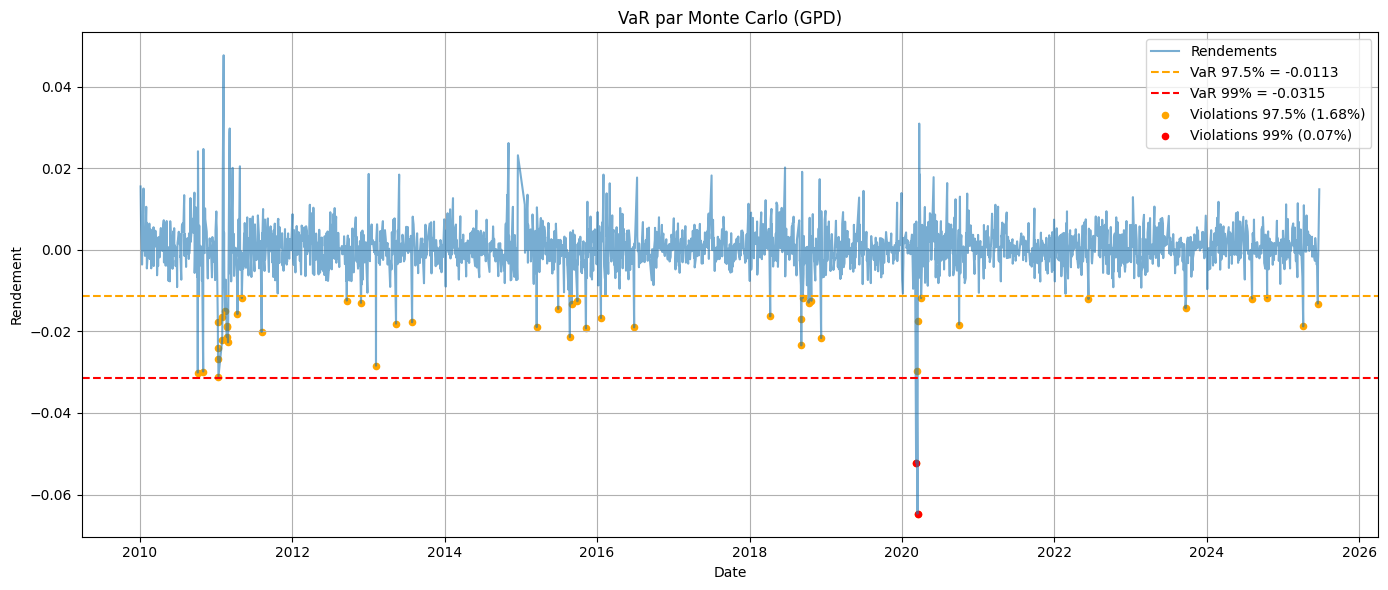

In [ ]:
n_sim = 100000
threshold = 0.02


simulated_losses = genpareto.rvs(c=shape, loc=loc, scale=scale, size=n_sim)
simulated_returns = threshold - simulated_losses

VaR_95 = -np.percentile(simulated_returns, 2.5)
VaR_99 = -np.percentile(simulated_returns, 1)

violations_95 = returns < -VaR_95
violations_99 = returns < -VaR_99

violation_rate_95 = violations_95.mean() * 100
violation_rate_99 = violations_99.mean() * 100

plt.figure(figsize=(14, 6))
plt.plot(returns.index, returns, label="Rendements", alpha=0.6)

# Affichage des VaR
plt.axhline(-VaR_95, color='orange', linestyle='--', label=f"VaR 97.5% = {-VaR_95:.4f}")
plt.axhline(-VaR_99, color='red', linestyle='--', label=f"VaR 99% = {-VaR_99:.4f}")

# Points de violations
plt.scatter(returns.index[violations_95], returns[violations_95], color='orange', s=20, label=f"Violations 97.5% ({violation_rate_95:.2f}%)")
plt.scatter(returns.index[violations_99], returns[violations_99], color='red', s=20, label=f"Violations 99% ({violation_rate_99:.2f}%)")

plt.title("VaR par Monte Carlo (GPD)")
plt.xlabel("Date")
plt.ylabel("Rendement")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Résultats
print(f"Monte Carlo VaR à 97.5% : {VaR_95.mean()*100:.3f}%")
print(f"Monte Carlo VaR à 99% : {VaR_99.mean()*100:.3f}%")
print(f"Taux de violation à 97.5% : {violation_rate_95:.2f}%")
print(f"Taux de violation à 99% : {violation_rate_99:.2f}%")


Monte Carlo VaR à 97.5% : 1.133%
Monte Carlo VaR à 99% : 3.151%
Taux de violation à 97.5% : 1.68%
Taux de violation à 99% : 0.07%


# **Nettoyage et Préparation de données**

In [ ]:
data_1=data.copy()

**Analyse de la variable Close**

La variable Close représente le prix de clôture quotidien de l’indice boursier. Elle constitue un indicateur clé de la performance journalière du marché et est utilisée pour le calcul des rendements.

In [ ]:
mean = data_1['Close'].mean()
print("Moyenne :", mean)
median = data_1['Close'].median()
print("Médiane :", median)
std_dev = data_1['Close'].std()
print("Écart-type :", std_dev)
skewness = data_1['Close'].skew()
print("Asymétrie :", skewness)
min_price = data_1['Close'].min()
max_price = data_1['Close'].max()
print(f"Min: {min_price}, Max: {max_price}")

Moyenne : 6303.829397666666


In [ ]:
median = data_1['Close'].median()
print("Médiane :", median)

Médiane : 6335.6465


In [ ]:
std_dev = data_1['Close'].std()
print("Écart-type :", std_dev)

Écart-type : 1284.5691773224225


In [ ]:
skewness = data_1['Close'].skew()
print("Asymétrie :", skewness)

Asymétrie : 0.20482842647028235


In [ ]:
min_price = data_1['Close'].min()
max_price = data_1['Close'].max()
print(f"Min: {min_price}, Max: {max_price}")

Min: 4335.676, Max: 9048.479


**L'asymétrie** (skewness en anglais) mesure à quel point la distribution des données est déséquilibrée par rapport à sa moyenne. Nous avons un skewness>0 alors la distribution est étirée vers la droite.

Nombre d’observations : 3000

*   Valeur moyenne : *6303.829397666666*
*   Médiane : *6335.6465*
*   Ecart-Type : *1284.5691773224225*
*   Asymétrie : *0.20482842647028235*
*   Valeur minimale : *4335.676*
*   Valeur maximale : *9048.479*

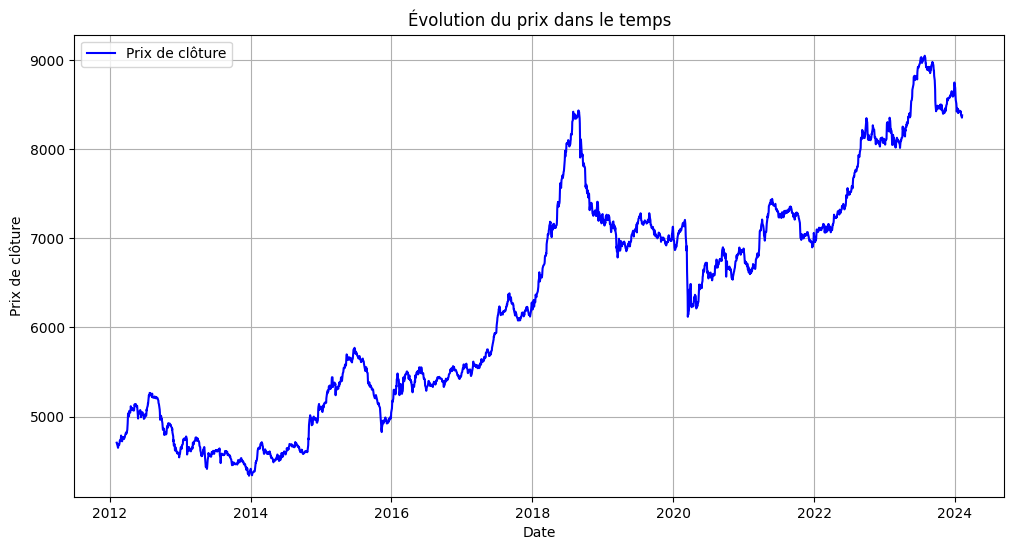

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data_1.index, data_1['Close'], label='Prix de clôture', color='b')


plt.title('Évolution du prix dans le temps')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.legend()
plt.grid()

plt.show()

# **Calcul des Rendements**

Les rendements sont calculés comme le **pourcentage de changement** du prix de clôture d'un jour à l'autre :

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}} \times 100
$$

Où :
- $R_t$ : Rendement à la date $t$ (en %)
- $P_t$ : Prix de clôture à la date $t$
- $P_{t-1}$ : Prix de clôture à la date $t-1$

**Exemple Numérique :** \\
Si :
- $P_{t-1} = 100$ (prix veille)
- $P_t = 105$ (prix aujourd'hui)

Alors :
$$
R_t = \frac{105 - 100}{100} \times 100 = 5\%
$$

### **Rendements Logarithmiques**
**Définition :** \\
Le rendement logarithmique se calcule comme :

$$
R_{t}^{\text{log}} = \ln\left(\frac{P_t}{P_{t-1}}\right) \times 100
$$

où :
- $\ln$ : logarithme naturel
- $P_t$ : Prix à la date $t$

**Pourquoi préférer les log returns pour la VaR ?**

1. **Normalité des distributions**  
   - Approche mieux une **distribution normale** (hypothèse centrale pour les modèles paramétriques de VaR comme RiskMetrics).

2. **Additivité temporelle**  
   - Le rendement sur $k$ périodes est simplement la **somme des rendements journaliers** :  
     $$
     R_{t \to t+k}^{\text{log}} = \sum_{i=1}^k R_{t+i}^{\text{log}}
     $$

3. **Stabilité sur long terme**  
   - Évite les biais de calcul des rendements simples pour des horizons étendus (ex : 1 an = produit vs somme des rendements).

4. **Symétrie**  
   - Traite de manière cohérente les gains et pertes (contrairement aux rendements arithmétiques).


In [ ]:
data_2=data_1.copy()

In [ ]:
data_2['Log Return'] = np.log(data_2['Close'] / data_2['Close'].shift(1))

In [ ]:
data_2 = data_2.dropna()

In [ ]:
print(data_2[[ 'Close', 'Log Return']].head(20))

               Close  Log Return
Date                            
2012-02-08  4698.948   -0.001540
2012-02-09  4698.283   -0.000142
2012-02-10  4686.798   -0.002448
2012-02-13  4659.735   -0.005791
2012-02-14  4648.754   -0.002359
2012-02-15  4658.467    0.002087
2012-02-16  4688.468    0.006419
2012-02-17  4687.395   -0.000229
2012-02-20  4680.640   -0.001442
2012-02-21  4691.339    0.002283
2012-02-22  4702.854    0.002452
2012-02-23  4724.587    0.004611
2012-02-24  4733.204    0.001822
2012-02-27  4735.191    0.000420
2012-02-28  4732.835   -0.000498
2012-02-29  4768.544    0.007517
2012-03-01  4786.390    0.003735
2012-03-02  4754.102   -0.006769
2012-03-05  4745.344   -0.001844
2012-03-06  4722.005   -0.004930


In [ ]:
data_2.to_csv("/content/drive/MyDrive/STAGE-PFE/rendements_tunindex.csv", index=False, encoding="utf-8")

In [ ]:
portfolio_returns.to_csv("/content/drive/MyDrive/STAGE-PFE/rendements_portfolio.csv", index=False, encoding="utf-8")

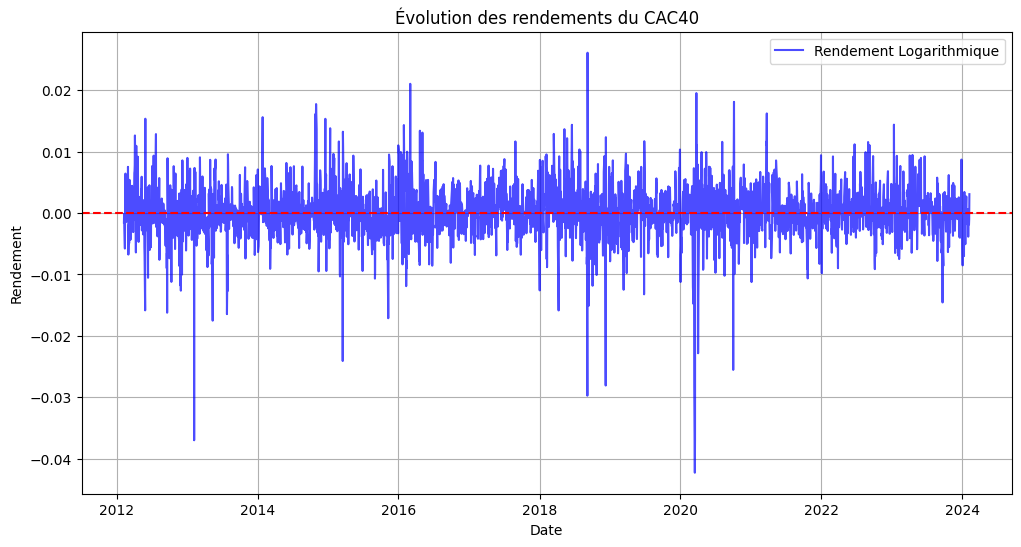

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(data_2.index, data_2['Log Return'], label='Rendement Logarithmique', color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Ligne de référence à 0

plt.title("Évolution des rendements du CAC40")
plt.xlabel("Date")
plt.ylabel("Rendement")
plt.legend()
plt.grid()

plt.show()

### **Analyse Rapide du Graphique**

**Série centrée autour de zéro**
La ligne rouge en pointillé montre bien que les rendements fluctuent autour de 0.Ce qui est un Comportement attendu pour des rendements financiers journaliers  

**Périodes de forte volatilité**  
Des pics majeurs sont observés :  
- **6 février 2013** : Ce qui correspond à l'assassinat de l'opposant **Chokri Belaïd**
- **2020** : Pandémie du Coranivirus (Restrictions et Confinement)

**Effet "calme-turbulent"**  
Caractéristiques principales :  
- Alternance de phases calmes et agitées  
- Amplitudes des rendements non constantes dans le temps  

Les rendements montrent la variation quotidienne de l'indice boursier. Par exemple, un rendement de 0.02 signifie une augmentation de 2%.

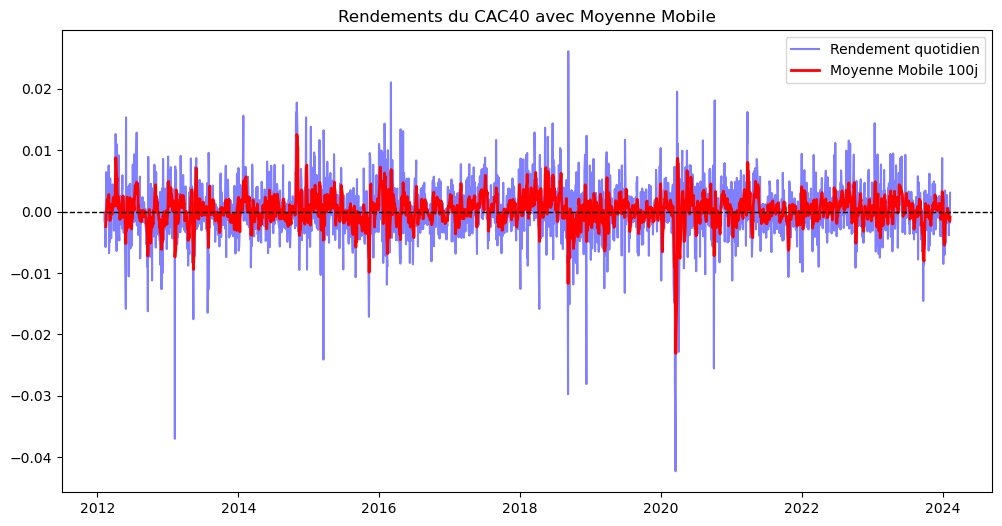

In [ ]:
data_2['MM20'] = data_2['Log Return'].rolling(window=5).mean()


data_2['Volatilité20'] = data_2['Log Return'].rolling(window=5).std()

plt.figure(figsize=(12,6))
plt.plot(data_2.index[:], data_2['Log Return'][:], alpha=0.5, label="Rendement quotidien", color='blue')
plt.plot(data_2.index[:], data_2['MM20'][:], label="Moyenne Mobile 100j", color='red', linewidth=2)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.legend()
plt.title("Rendements du CAC40 avec Moyenne Mobile")
plt.show()



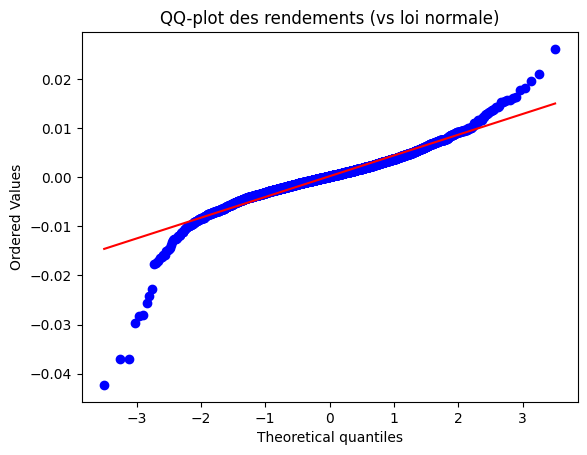

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

stats.probplot(data_2["Log Return"].dropna(), dist="norm", plot=plt)
plt.title("QQ-plot des rendements (vs loi normale)")
plt.show()


# **CALCUL DE LA VAR HISTORIQUE**

La Value at Risk (VaR) historique est une méthode non paramétrique qui utilise les rendements historiques pour estimer le risque. Pour un niveau de confiance de 95%, la VaR correspond au 5e percentile des rendements historiques.

In [ ]:
returns=portfolio_returns

VaR Historique à 95% : -0.00681


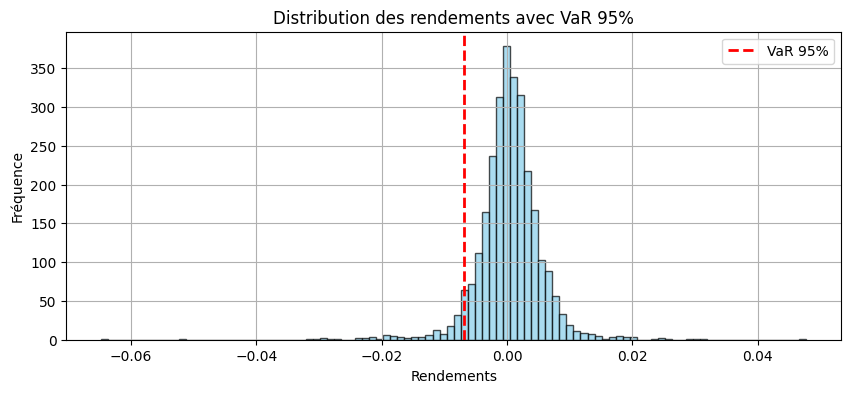

In [ ]:
confidence_level = 0.95
alpha = 1 - confidence_level

historical_var_95 = np.percentile(returns, alpha * 100)

print(f"VaR Historique à {confidence_level*100:.0f}% : {historical_var_95:.5f}")

plt.figure(figsize=(10, 4))
plt.hist(returns, bins=100, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(historical_var_95, color='red', linestyle='--', linewidth=2, label=f'VaR {int(confidence_level*100)}%')
plt.title(f'Distribution des rendements avec VaR {int(confidence_level*100)}%')
plt.xlabel('Rendements')
plt.ylabel('Fréquence')
plt.legend()
plt.grid(True)
plt.show()


Cela signifie qu'il y a **5%** de chances que votre portefeuille subisse une perte supérieure à **0.643%** sur la période d'un jour

VaR Historique à 99% : -0.01658


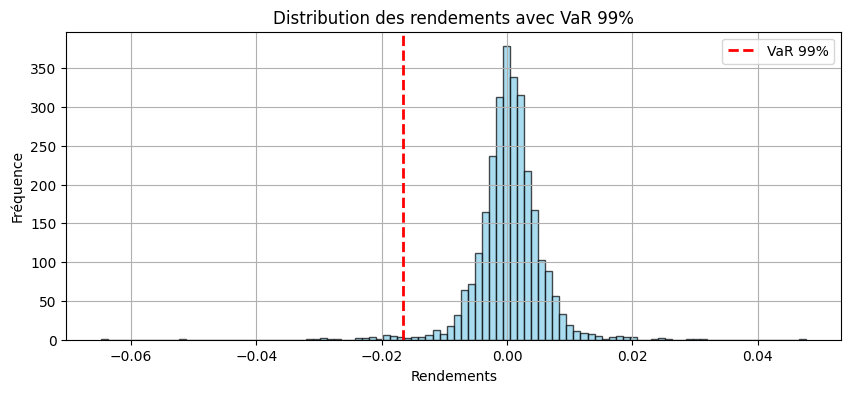

In [ ]:
confidence_level = 0.99
alpha = 1 - confidence_level

historical_var_99 = np.percentile(returns, alpha * 100)

print(f"VaR Historique à {confidence_level*100:.0f}% : {historical_var_99:.5f}")


plt.figure(figsize=(10, 4))
plt.hist(returns, bins=100, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(historical_var_99, color='red', linestyle='--', linewidth=2, label=f'VaR {int(confidence_level*100)}%')
plt.title(f'Distribution des rendements avec VaR {int(confidence_level*100)}%')
plt.xlabel('Rendements')
plt.ylabel('Fréquence')
plt.legend()
plt.grid(True)
plt.show()


Cela signifie qu'il y a **1%** de chances que votre portefeuille subisse une perte supérieure à **1.179%** sur la période d'un jour

Faisons maintenant du backtesting pour vérifier le taux de violation de notre VaR historique

In [ ]:
confidence_level = 0.95
alpha = 1 - confidence_level
window = 250


var_hist = []
violations = []


for i in range(window, len(returns)):
    window_data = returns[i - window:i]
    var = np.percentile(window_data, alpha * 100)
    var_hist.append(var)

    actual_return = returns.iloc[i]
    violations.append(int(actual_return < var))

var_hist = pd.Series(var_hist, index=returns.index[window:])
violations = pd.Series(violations, index=returns.index[window:])


violation_rate = violations.sum() / len(violations)
print(f"Taux de violation observé : {violation_rate:.2%}")
print(f"Taux de violation théorique : {alpha:.2%}")

Taux de violation observé : 5.08%
Taux de violation théorique : 5.00%


Nous observons que notre taux de violation est très proche de la violation théorique, ce qui montre que la VaR historique appréhende bien le risque.

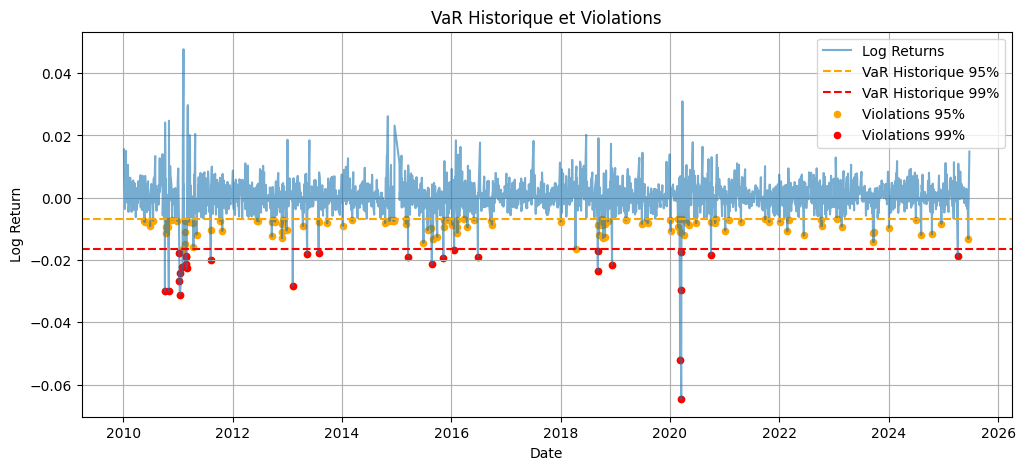

0.010175438596491228

In [ ]:

# Backtesting
violations_95 = returns[returns < historical_var_95]
violations_99 = returns[returns < historical_var_99]

taux_viol_95 = len(violations_95) / len(returns)
taux_viol_99 = len(violations_99) / len(returns)


# Visualisation
plt.figure(figsize=(12, 5))
plt.plot(returns.index, returns, label="Log Returns", alpha=0.6)
plt.axhline(historical_var_95, color='orange', linestyle='--', label='VaR Historique 95%')
plt.axhline(historical_var_99, color='red', linestyle='--', label='VaR Historique 99%')
plt.scatter(violations_95.index, violations_95, color='orange', label='Violations 95%', s=20)
plt.scatter(violations_99.index, violations_99, color='red', label='Violations 99%', s=20)
plt.title("VaR Historique et Violations")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend()
plt.grid(True)
plt.show()
taux_viol_99

**Interprétation:**<br>
Cela  signifie que, sur la base des rendements historiques des données que nous avons  utilisées, il y a 95% de chances que la perte sur un jour donné ne dépasse pas -0.6427% de la valeur de l'indice TUNINDEX. <br><br>
**En d'autres termes :**<br>

À un niveau de confiance de 95%, la perte maximale attendue sur un jour est de -0.6427%, ce qui veut dire qu'il y a seulement 5% de chances que la perte dépasse cette valeur.

**Exemple concret :**
Si on a  un investissement de 10 000 DT sur le TUNINDEX, la VaR historique à 95% nous dit que, selon les rendements passés, il y a 95% de chances que notre perte ne dépasse pas -0.6427%, soit environ 64 dinars sur une journée.

Contrairement à la VaR paramétrique, la VaR historique ne suppose aucune distribution spécifique des rendements.

# **CALCUL DE LA VAR PARAMETRIQUE**

La **VaR paramétrique** suppose que les **rendements** suivent une **distribution normale**.

La **VaR** est calculée comme :

`VaR = μ + σ ⋅ Zα`

où :

- **μ** : moyenne des rendements  
- **σ** : écart-type des rendements  
- **Zα** : quantile de la distribution normale (par exemple, **-1.645** pour un niveau de confiance de **95%**)

**Hypothèses de Normalité**

**1. Histogramme et densité**

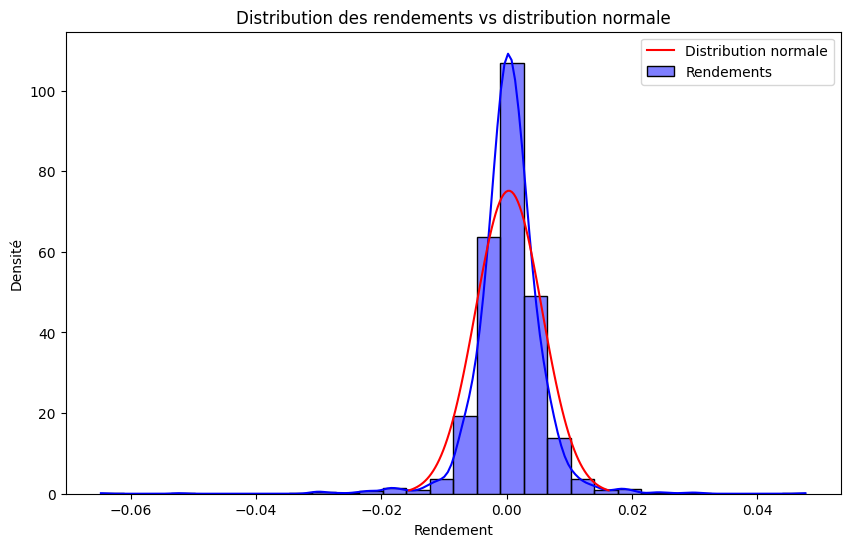

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(portfolio_returns, kde=True, stat='density', bins=30, color='blue', label='Rendements')

mu, sigma = portfolio_returns.mean(), portfolio_returns.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), color='red', label='Distribution normale')

plt.title('Distribution des rendements vs distribution normale')
plt.xlabel('Rendement')
plt.ylabel('Densité')
plt.legend()
plt.show()

**3.2.  Test de Kolmogorov-Smirov**

In [ ]:
from scipy.stats import kstest

stat, p_value = kstest(portfolio_returns.dropna(), 'norm', args=(mu, sigma))
print(f"Statistique de test : {stat}")
print(f"p-value : {p_value}")

alpha = 0.05
if p_value > alpha:
    print("Les rendements suivent une distribution normale (ne pas rejeter H0)")
else:
    print("Les rendements ne suivent pas une distribution normale (rejeter H0)")

Statistique de test : 0.08623378217908792
p-value : 6.895884459815863e-19
Les rendements ne suivent pas une distribution normale (rejeter H0)


In [ ]:
mu = portfolio_returns.mean()
sigma = portfolio_returns.std()
z_score_95 = norm.ppf(0.95)
z_score_99 = norm.ppf(0.99)

VaR_parametrique_95 = mu + z_score_95 * sigma
VaR_parametrique_99 = mu + z_score_99 * sigma

print(f"VaR Paramétrique à 95% : {VaR_parametrique_95:.4%}")
print(f"VaR Paramétrique à 99% : {VaR_parametrique_99:.4%}")

VaR Paramétrique à 95% : 0.9085%
VaR Paramétrique à 99% : 1.2702%


In [ ]:
alpha_95 = 0.05
alpha_99 = 0.01

mu = returns.mean()
sigma = returns.std()


var_95 = norm.ppf(alpha_95, loc=mu, scale=sigma)
var_99 = norm.ppf(alpha_99, loc=mu, scale=sigma)

# BACKTESTING
violations_95 = returns[returns < var_95]
violations_99 = returns[returns < var_99]

taux_viol_95 = len(violations_95) / len(returns)
taux_viol_99 = len(violations_99) / len(returns)

print(f"Taux de violation à 95% : {taux_viol_95 * 100:.2f}%")
print(f"Taux de violation à 99% : {taux_viol_99 * 100:.2f}%")

Taux de violation à 95% : 2.98%
Taux de violation à 99% : 1.51%


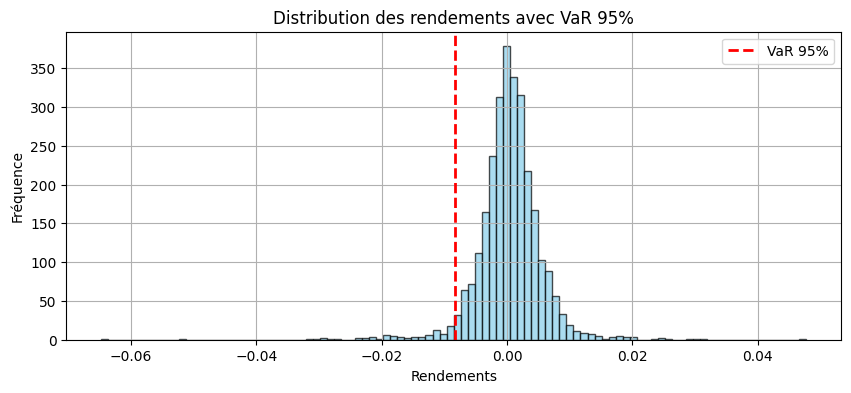

In [ ]:
plt.figure(figsize=(10, 4))
plt.hist(returns, bins=100, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(var_95, color='red', linestyle='--', linewidth=2, label=f'VaR {int(confidence_level*100)}%')
plt.title(f'Distribution des rendements avec VaR {int(confidence_level*100)}%')
plt.xlabel('Rendements')
plt.ylabel('Fréquence')
plt.legend()
plt.grid(True)
plt.show()


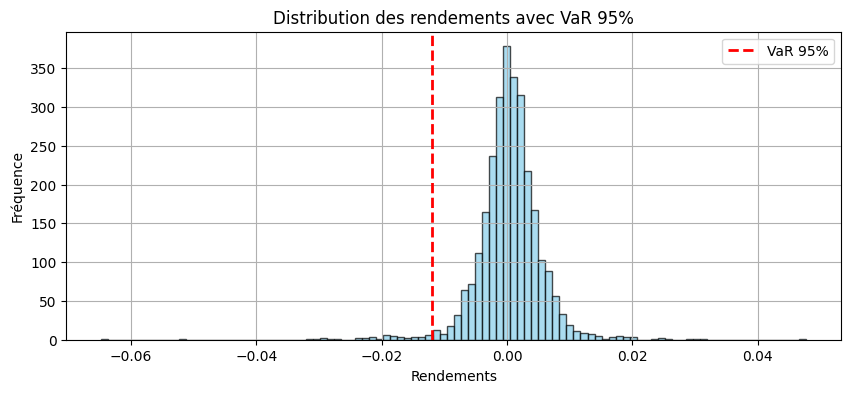

In [ ]:
plt.figure(figsize=(10, 4))
plt.hist(returns, bins=100, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(var_99, color='red', linestyle='--', linewidth=2, label=f'VaR {int(confidence_level*100)}%')
plt.title(f'Distribution des rendements avec VaR {int(confidence_level*100)}%')
plt.xlabel('Rendements')
plt.ylabel('Fréquence')
plt.legend()
plt.grid(True)
plt.show()


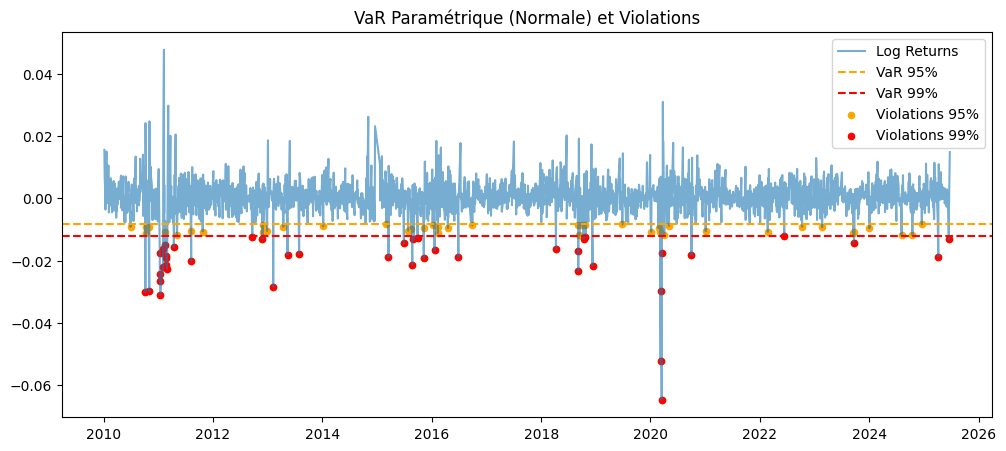

In [ ]:
# Visualisation
plt.figure(figsize=(12, 5))
plt.plot(returns.index, returns, label="Log Returns", alpha=0.6)
plt.axhline(var_95, color='orange', linestyle='--', label='VaR 95%')
plt.axhline(var_99, color='red', linestyle='--', label='VaR 99%')
plt.scatter(violations_95.index, violations_95, color='orange', label='Violations 95%', s=20)
plt.scatter(violations_99.index, violations_99, color='red', label='Violations 99%', s=20)
plt.legend()
plt.title("VaR Paramétrique (Normale) et Violations")
plt.show()


La VaR paramétrique est estimée sous l'hypothèse d'une distribution normale des rendements. C'est une approche théorique qui repose sur deux paramètres principaux : la moyenne et l'écart-type des rendements. Elle donne une estimation plus lissée de la perte maximale, en se basant sur des calculs statistiques plutôt que sur les rendements historiques observés.
<br><br>
Dans Notre cas, les rendements ne sont pas normaux comme stipulent les différents tests graphiques et statistiques réalisés ci-haut. Les méthodes non paramétriques comme la VaR historique sont alors préférables.



# **Calcul de la VaR Par la méthode Monte Carlo**

La méthode de Monte Carlo est puissante et flexible, car elle ne repose pas sur les hypothèses restrictives comme la normalité des rendements.

**Principe:**



*  La méthode de Monte Carlo simule un grand nombre de scénarios possibles pour les rendements futurs en utilisant des tirages aléatoires.
*   À partir de ces scénarios, on calcule la distribution des pertes potentielles et on en déduit la VaR.



In [ ]:
data_2 = pd.read_csv("/content/drive/MyDrive/STAGE-PFE/rendements_tunindex.csv")

In [ ]:
returns=data_2['Log Return']

In [ ]:
n_simulations = 100000
confidence_level_95 = 0.95
confidence_level_99 = 0.99
horizon = 1


params = t.fit(returns.dropna())
df_student = t(*params)
simulated_returns_student = df_student.rvs((n_simulations, horizon))
simulated_losses_student = -simulated_returns_student
var_monte_carlo_95 = np.percentile(simulated_losses_student, (1 - confidence_level_95) * 100)
var_monte_carlo_99 = np.percentile(simulated_losses_student, (1 - confidence_level_99) * 100)

print(f"VaR Monte Carlo (Student) à {confidence_level_95 * 100}% : {var_monte_carlo_95*100:.2f}%")
print(f"VaR Monte Carlo (Student) à {confidence_level_99 * 100}% : {var_monte_carlo_99*100:.2f}%")

VaR Monte Carlo (Student) à 95.0% : -0.74%
VaR Monte Carlo (Student) à 99.0% : -1.71%


**Validation des résultats**

**Backtesting**

*   Comparer les prévisions de la VaR avec les pertes réelles pour vérifier leur précision.
*   Par exemple, compter le nombre de fois où les pertes réelles dépassent la VaR prévue.



In [ ]:
mu = returns.mean()
sigma = returns.std()
n_simulations = 100000
n_days = 1

simulated_returns = np.random.normal(loc=mu, scale=sigma, size=(len(returns), n_simulations))

# Calcul de la VaR sur les simulations
VaR_95 = -np.percentile(simulated_returns, 5, axis=1)
VaR_99 = -np.percentile(simulated_returns, 1, axis=1)


violations_95 = returns < -VaR_95
violations_99 = returns < -VaR_99

violation_rate_95 = violations_95.mean() * 100
violation_rate_99 = violations_99.mean() * 100

In [ ]:
# Résultats
print(f"Monte Carlo VaR à 95% : {VaR_95.mean()*100:.3f}%")
print(f"Monte Carlo VaR à 99% : {VaR_99.mean()*100:.3f}%")
print(f"Taux de violation à 95% : {violation_rate_95:.2f}%")
print(f"Taux de violation à 99% : {violation_rate_99:.2f}%")


Monte Carlo VaR à 95% : 0.707%
Monte Carlo VaR à 99% : 1.008%
Taux de violation à 95% : 3.70%
Taux de violation à 99% : 1.37%


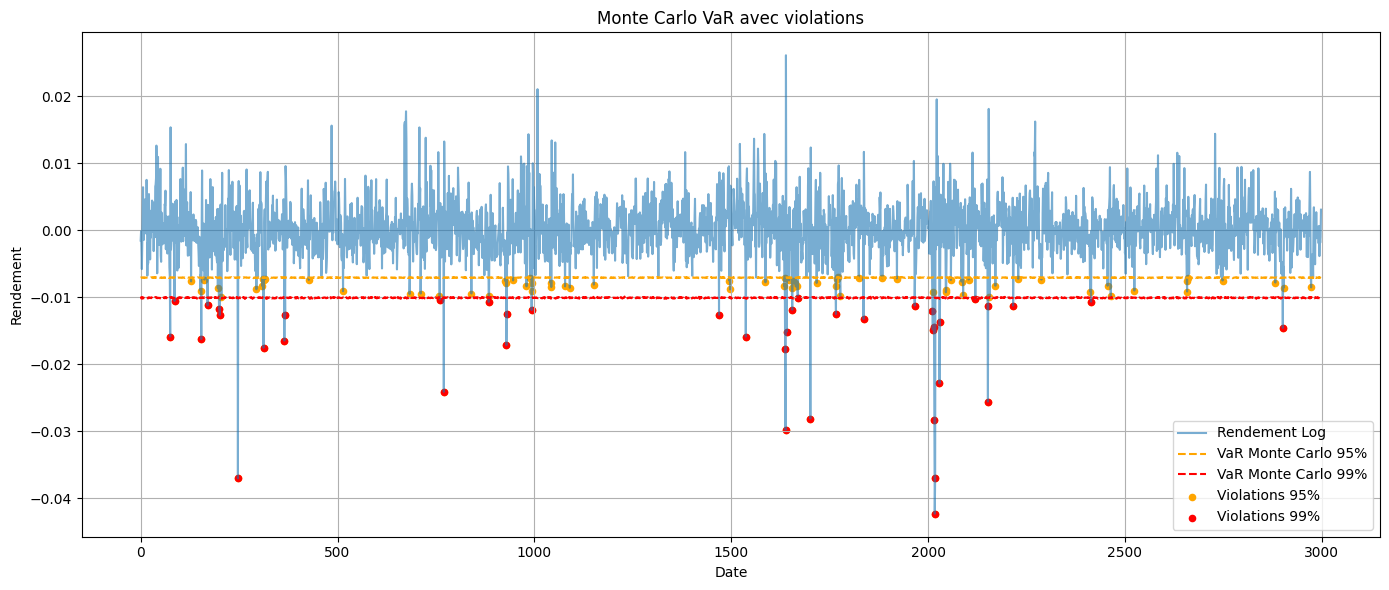

In [ ]:

plt.figure(figsize=(14, 6))
plt.plot(returns.index, returns, label="Rendement Log",alpha=0.6)
plt.plot(returns.index, -VaR_95, color='orange', linestyle='--', label="VaR Monte Carlo 95%")
plt.plot(returns.index, -VaR_99, color='red', linestyle='--', label="VaR Monte Carlo 99%")
plt.scatter(returns.index[violations_95], returns[violations_95], color='orange', label="Violations 95%", s=20)
plt.scatter(returns.index[violations_99], returns[violations_99], color='red', label="Violations 99%", s=20)
plt.title("Monte Carlo VaR avec violations")
plt.xlabel("Date")
plt.ylabel("Rendement")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### **PARTIE 2: MODELISATION DES RENDEMENTS FUTURS**

### **Application des Techniques de Series Temporelles pour Modéliser les Rendements (ARIMA, SARIMA, GARCH)**

In [ ]:
data_2 = pd.read_csv("/content/drive/MyDrive/STAGE-PFE/rendements_tunindex.csv")

In [ ]:
data_2 = data_2.dropna()

In [ ]:
returns=data_2['Log Return']

**Tests de Stationnarité des Rendements**

**Test de Dickey-Fuller Augmenté (ADF)**

In [ ]:
def test_stationnarite(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print("La série est stationnaire")
    else:
        print("La série n'est PAS stationnaire")


test_stationnarite(data_2["Log Return"])


ADF Statistic: -13.668905452079931
p-value: 1.4725078388703452e-25
La série est stationnaire


la série est stationnaire :  Les modèles ARMA, ARIMA fonctionneront correctement.
On peut faire des prévisions fiables.
Les coefficients du modèle seront stables dans le temps.

**Analyse de l'autocorrélation**

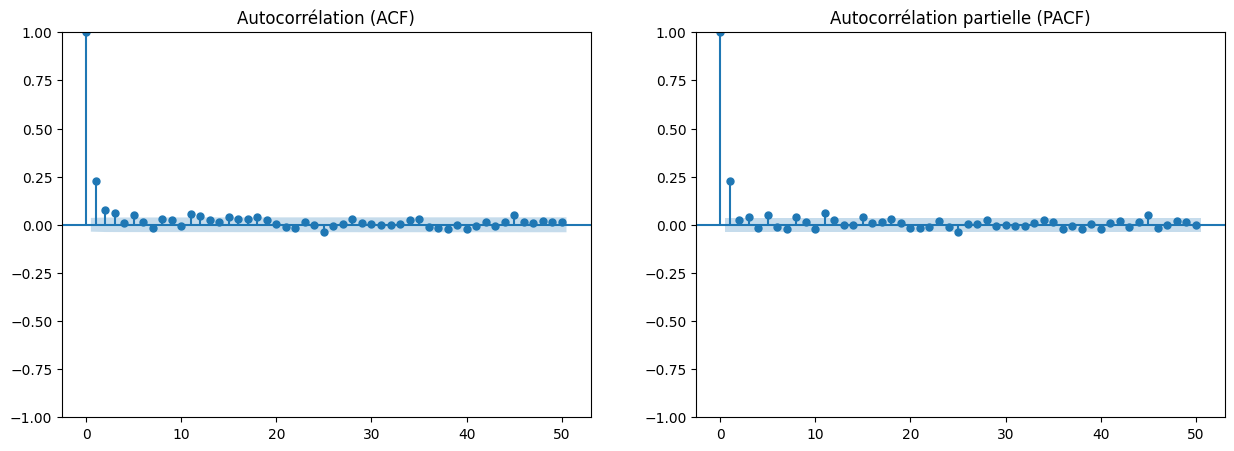

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))


plot_acf(data_2["Log Return"], ax=ax[0], lags=50)
ax[0].set_title("Autocorrélation (ACF)")

plot_pacf(data_2["Log Return"], ax=ax[1], lags=50)
ax[1].set_title("Autocorrélation partielle (PACF)")

plt.show()


# **Modélisation avec ARIMA**

In [ ]:
train_size = int(len(data_2) * 0.7)
train, test = data_2[:train_size], data_2[train_size:]


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
modele_arima = ARIMA(train["Log Return"], order=(1,0,3))
resultat_arima = modele_arima.fit()

print(resultat_arima.summary())


                               SARIMAX Results                                
Dep. Variable:             Log Return   No. Observations:                 2099
Model:                 ARIMA(1, 0, 3)   Log Likelihood                8344.339
Date:                Sat, 21 Jun 2025   AIC                         -16676.678
Time:                        16:32:31   BIC                         -16642.782
Sample:                             0   HQIC                        -16664.262
                               - 2099                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.091      0.275      -0.000       0.000
ar.L1         -0.0882      0.225     -0.391      0.695      -0.530       0.354
ma.L1          0.3213      0.227      1.414      0.1

**Vérification des résidus du modèle**

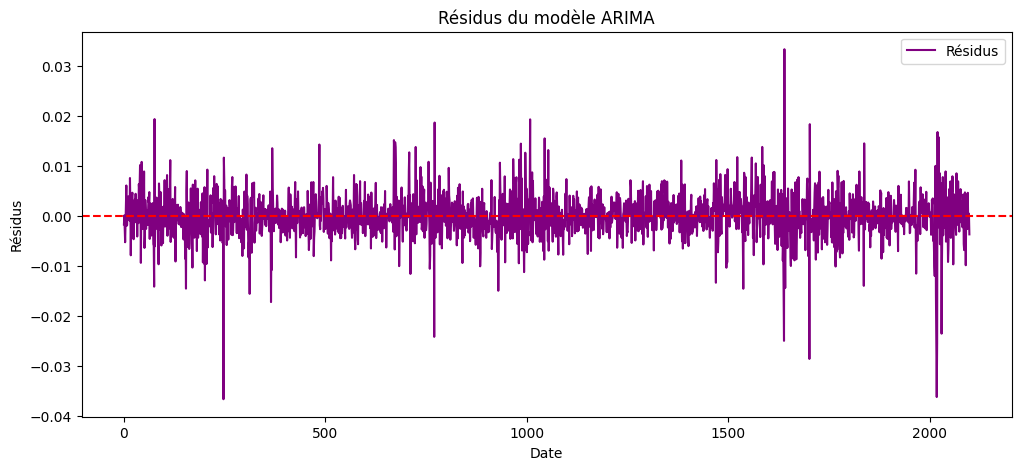

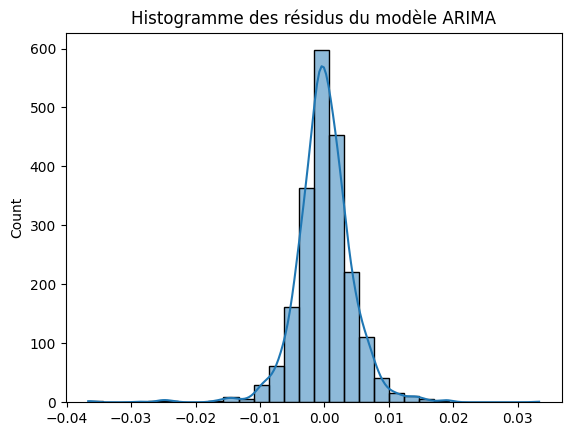

In [ ]:
residus = resultat_arima.resid

plt.figure(figsize=(12,5))
plt.plot(residus, label="Résidus", color="purple")
plt.axhline(y=0, color="red", linestyle="dashed")
plt.title("Résidus du modèle ARIMA")
plt.xlabel("Date")
plt.ylabel("Résidus")
plt.legend()
plt.show()

sns.histplot(residus, kde=True, bins=30)
plt.title("Histogramme des résidus du modèle ARIMA")
plt.show()


**Test de Ljung-Box**

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(resultat_arima.resid, lags=[10])
print(lb_test)


     lb_stat  lb_pvalue
10  13.34194   0.205177


Notre p_value est supérieure à 0.05, l'hypothèse nulle (H0) acceptée -> Les résidus ne présentent plus d'autocorrélation significative aux lags testés.

**BackTesting: Comparaisons des Prédictions avec les Données Réelles**

a) Prédictions hors échantillon (Forecasting)

In [ ]:
forecast_steps = len(test)
forecast = resultat_arima.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()


b) Visualiser Prédictions vs Réel

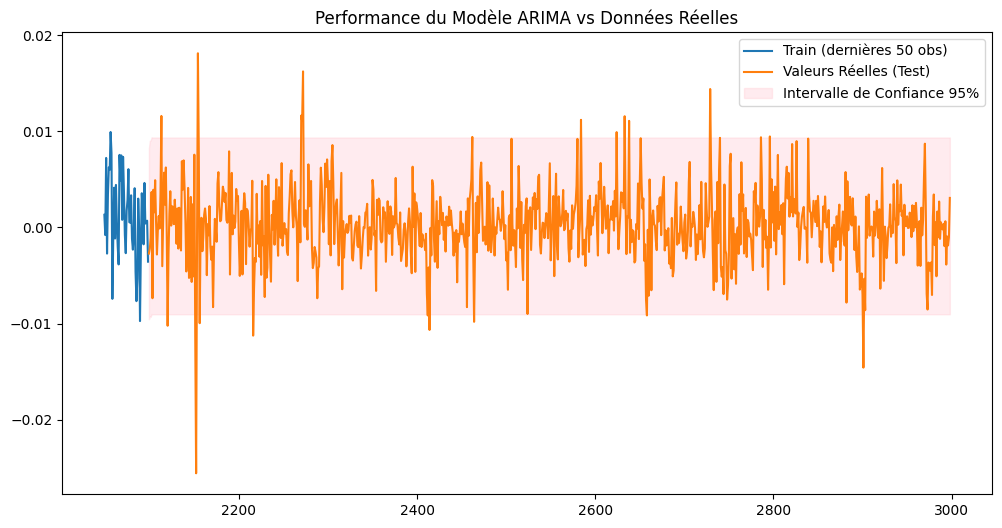

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train.index[-50:], train["Log Return"].iloc[-50:], label="Train (dernières 50 obs)")
plt.plot(test.index, test["Log Return"], label="Valeurs Réelles (Test)")
#plt.plot(test.index, forecast_mean, color='red', linestyle='--', label="Prédictions ARIMA")
plt.fill_between(test.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1],
                 color='pink', alpha=0.3, label="Intervalle de Confiance 95%")
plt.legend()
plt.title("Performance du Modèle ARIMA vs Données Réelles")
plt.show()


# **Modélisation SARIMA**

**Tests Statistiques de Saisonnalité (Test de Kruskal-Wallis)**

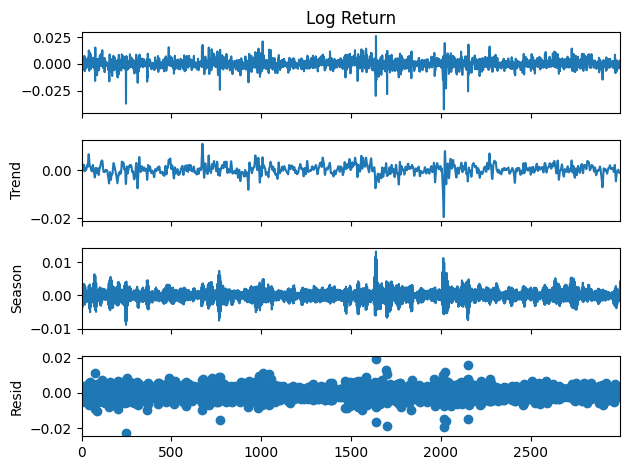

In [ ]:
from statsmodels.tsa.seasonal import STL

# Décomposition STL (adaptée aux saisonnalités complexes)
stl = STL(returns, period=5)
result = stl.fit()
result.plot()
plt.show()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(returns, order=(1,0,1), seasonal_order=(1,0,1,5))
results = model.fit()
print(results.summary())


                                     SARIMAX Results                                     
Dep. Variable:                        Log Return   No. Observations:                 2999
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 5)   Log Likelihood               12093.495
Date:                           Sat, 21 Jun 2025   AIC                         -24176.989
Time:                                   16:53:32   BIC                         -24146.959
Sample:                                        0   HQIC                        -24166.187
                                          - 2999                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3659      0.048      7.625      0.000       0.272       0.460
ma.L1         -0.1423      0.054     -2.651

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(results.resid, lags=[10])
print(lb_test)


      lb_stat  lb_pvalue
10  16.678958   0.081777


Notre p_value est supérieure à 0.05, l'hypothèse nulle (H0) acceptée -> Les résidus ne présentent plus d'autocorrélation significative aux lags testés.

In [ ]:
forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()


## **Modèles Machine learning et Deep learning**

In [ ]:
portfolio_returns

Date
2010-01-05    0.015512
2010-01-06    0.011207
2010-01-07    0.007247
2010-01-11    0.000423
2010-01-12   -0.003637
                ...   
2025-06-12   -0.002365
2025-06-16   -0.013218
2025-06-17   -0.002559
2025-06-18   -0.001271
2025-06-23    0.014815
Length: 2850, dtype: float64

Création de nouvelles variables

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis, genpareto

np.random.seed(42)
returns = portfolio_returns
dates = pd.date_range(start="2010-01-05", periods=len(returns), freq="D")
df = pd.DataFrame({"Date": dates, "Return": returns})
df.set_index("Date", inplace=True)

window = 100
alpha = 0.99
loss_threshold = 0.05

features = {
    "Volatility": [],
    "Skewness": [],
    "Kurtosis": [],
    "GPD_Shape": [],
    "GPD_Scale": [],
    "VaR_99": [],
    "P_Loss_5pct": []
}

for i in range(window, len(df)):
    window_data = df["Return"].iloc[i - window:i]
    vol = window_data.std()
    sk = skew(window_data)
    kt = kurtosis(window_data)
    threshold = np.percentile(window_data, 5)
    tail_losses = -(window_data[window_data < threshold] - threshold)
    if len(tail_losses) > 10:
        shape, loc, scale = genpareto.fit(tail_losses, floc=0)
        p_exceed = len(tail_losses) / len(window_data)
        var_99 = threshold - (scale / shape) * (((1 - alpha) / p_exceed) ** (-shape) - 1)
        p_loss_5 = genpareto.sf(loss_threshold - threshold, shape, loc=0, scale=scale) * p_exceed
    else:
        shape, scale, var_99, p_loss_5 = np.nan, np.nan, np.nan, np.nan

    features["Volatility"].append(vol)
    features["Skewness"].append(sk)
    features["Kurtosis"].append(kt)
    features["GPD_Shape"].append(shape)
    features["GPD_Scale"].append(scale)
    features["VaR_99"].append(var_99)
    features["P_Loss_5pct"].append(p_loss_5)

features_df = pd.DataFrame(features, index=df.index[window:])
full_df = df.iloc[window:].copy()
full_df = full_df.join(features_df)
print(full_df.head())


              Return  Volatility  Skewness  Kurtosis  GPD_Shape  GPD_Scale  \
Date                                                                         
2010-04-15  0.004407    0.004280  0.756448  1.598658        NaN        NaN   
2010-04-16  0.002627    0.004032  0.506184  1.108587        NaN        NaN   
2010-04-17  0.001273    0.003896  0.431674  1.217050        NaN        NaN   
2010-04-18  0.003822    0.003839  0.446615  1.409641        NaN        NaN   
2010-04-19 -0.001809    0.003853  0.421313  1.337736        NaN        NaN   

            VaR_99  P_Loss_5pct  
Date                             
2010-04-15     NaN          NaN  
2010-04-16     NaN          NaN  
2010-04-17     NaN          NaN  
2010-04-18     NaN          NaN  
2010-04-19     NaN          NaN  


In [ ]:
pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 24.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


In [ ]:
portfolio_returns

Date
2010-01-05    0.015512
2010-01-06    0.011207
2010-01-07    0.007247
2010-01-11    0.000423
2010-01-12   -0.003637
                ...   
2025-06-12   -0.002365
2025-06-16   -0.013218
2025-06-17   -0.002559
2025-06-18   -0.001271
2025-06-23    0.014815
Length: 2850, dtype: float64

In [ ]:
data_2 = pd.read_csv("/content/drive/MyDrive/STAGE-PFE/rendements_portfolio.csv")

In [ ]:
data_2

0
0     0.015512
1     0.011207
2     0.007247
3     0.000423
4    -0.003637
...        ...
2845 -0.002365
2846 -0.013218
2847 -0.002559
2848 -0.001271
2849  0.014815

[2850 rows x 1 columns]

In [ ]:
data_2 = data_2.rename(columns={'0': 'Log Return'})

**Feature Engineering**

Création des variables explicatives à partir des données historiques :

*   Retards (lags) des rendements.
*   Moyennes mobiles des rendements.
*   Volatilité historique.



In [ ]:
def calculate_features(data_2):
  window_sizes = [5, 10, 20]

  # Moyennes mobiles et écarts-types mobiles
  for window in window_sizes:
      data_2[f"ma_{window}"] = data_2["Log Return"].rolling(window).mean()
      data_2[f"std_{window}"] = data_2["Log Return"].rolling(window).std()

  # Momentum
  data_2["momentum_1"] = data_2["Log Return"].diff(1)
  data_2["momentum_5"] = data_2["Log Return"].diff(5)

  # Lag features
  for lag in range(1, 6):
      data_2[f"lag_{lag}"] = data_2["Log Return"].shift(lag)
  # Retour cumulés
  data_2["cum_return_5"] = data_2["Log Return"].rolling(5).sum()
  data_2["cum_return_10"] = data_2["Log Return"].rolling(10).sum()

  # Différence entre moyennes mobiles
  data_2["ma_diff_5_20"] = data_2["ma_5"] - data_2["ma_20"]


  # Ratio de volatilité
  data_2["vol_ratio_5_20"] = data_2["std_5"] / data_2["std_20"]

  # data_2 de signe du rendement (retournement)
  data_2["reversal"] = np.sign(data_2["Log Return"]) != np.sign(data_2["lag_1"])
  data_2["reversal"] = data_2["reversal"].astype(int)

  # Max / min sur 10 jours
  data_2["max_10"] = data_2["Log Return"].rolling(10).max()
  data_2["min_10"] = data_2["Log Return"].rolling(10).min()
  return data_2



In [ ]:
data_2=calculate_features(data_2)

In [ ]:
data_2 = data_2.dropna()

In [ ]:
data_2.to_csv("/content/drive/MyDrive/STAGE-PFE/rendements_tunindex_with_variables.csv", index=False, encoding="utf-8")

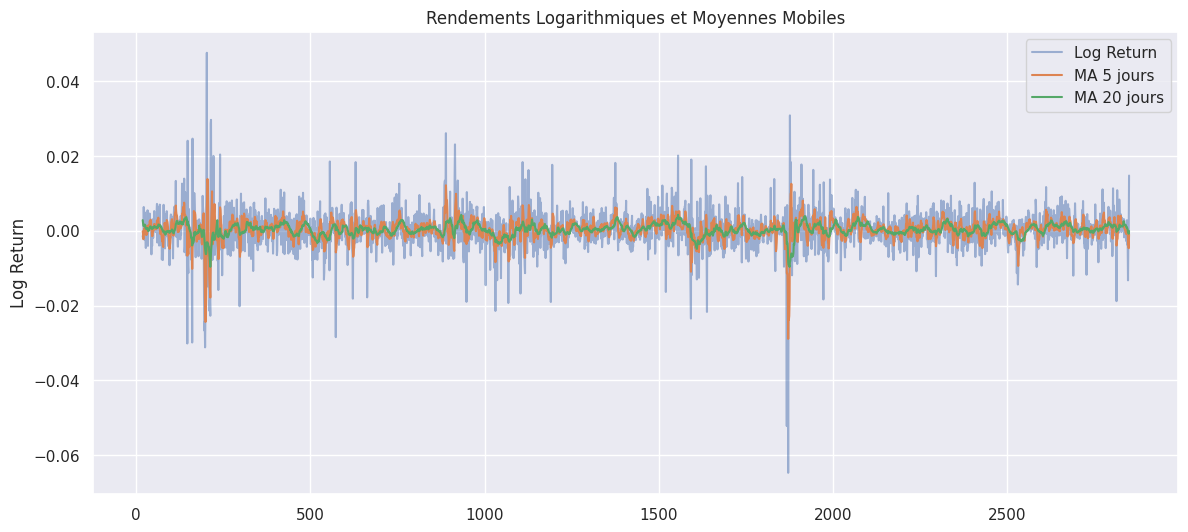

In [ ]:
sns.set(rc={"figure.figsize": (14, 8)})

plt.figure(figsize=(14, 6))
plt.plot(data_2["Log Return"], label="Log Return", alpha=0.5)
plt.plot(data_2["ma_5"], label="MA 5 jours")
plt.plot(data_2["ma_20"], label="MA 20 jours")
plt.title("Rendements Logarithmiques et Moyennes Mobiles")
plt.legend()
plt.ylabel("Log Return")
plt.show()


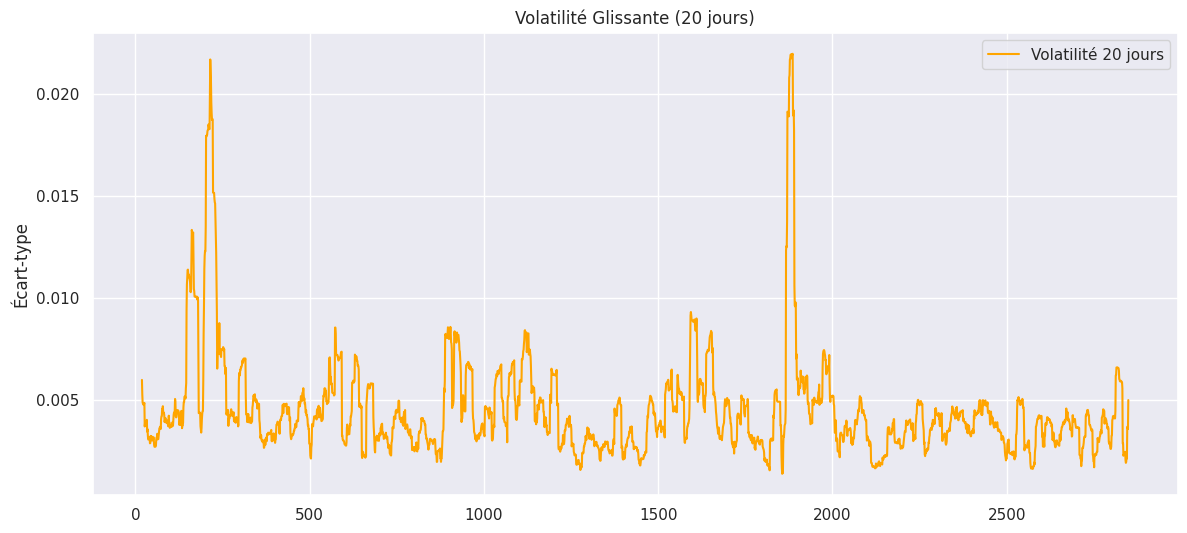

In [ ]:
# 2. Volatilité Glissante (écart-type)
plt.figure(figsize=(14, 6))
plt.plot(data_2["std_20"], label="Volatilité 20 jours", color="orange")
plt.title("Volatilité Glissante (20 jours)")
#plt.xlabel("Date")
plt.ylabel("Écart-type")
plt.legend()
plt.show()

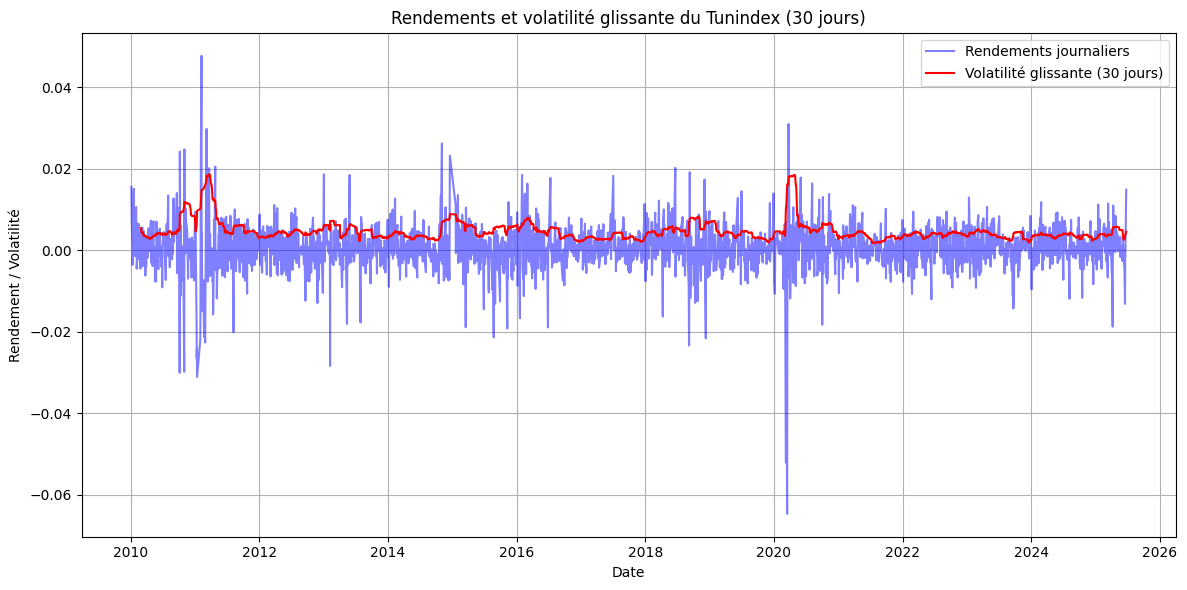

In [ ]:
import matplotlib.pyplot as plt


r_tunindex = portfolio_returns
rolling_volatility = r_tunindex.rolling(window=30).std()
plt.figure(figsize=(12, 6))

plt.plot(r_tunindex, label='Rendements journaliers', alpha=0.5, color='blue')

# Courbe de la volatilité glissante
plt.plot(rolling_volatility, label='Volatilité glissante (30 jours)', color='red')

plt.title("Rendements et volatilité glissante du Tunindex (30 jours)")
plt.xlabel("Date")
plt.ylabel("Rendement / Volatilité")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("volatilite_glissante_tunindex.png")
plt.show()


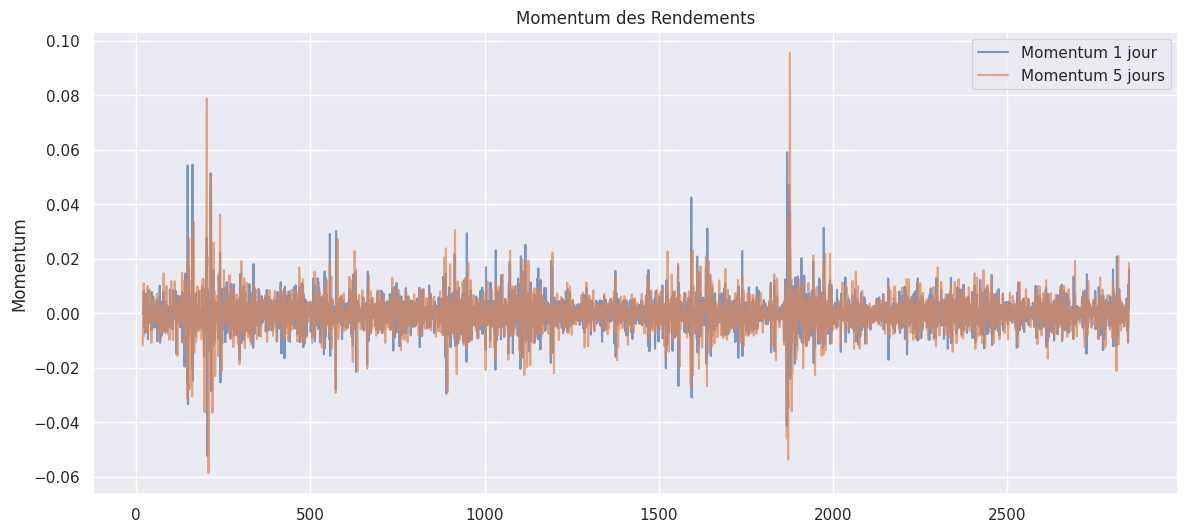

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(data_2["momentum_1"], label="Momentum 1 jour", alpha=0.7)
plt.plot(data_2["momentum_5"], label="Momentum 5 jours", alpha=0.7)
plt.title("Momentum des Rendements")
#plt.xlabel("Date")
plt.ylabel("Momentum")
plt.legend()
plt.show()


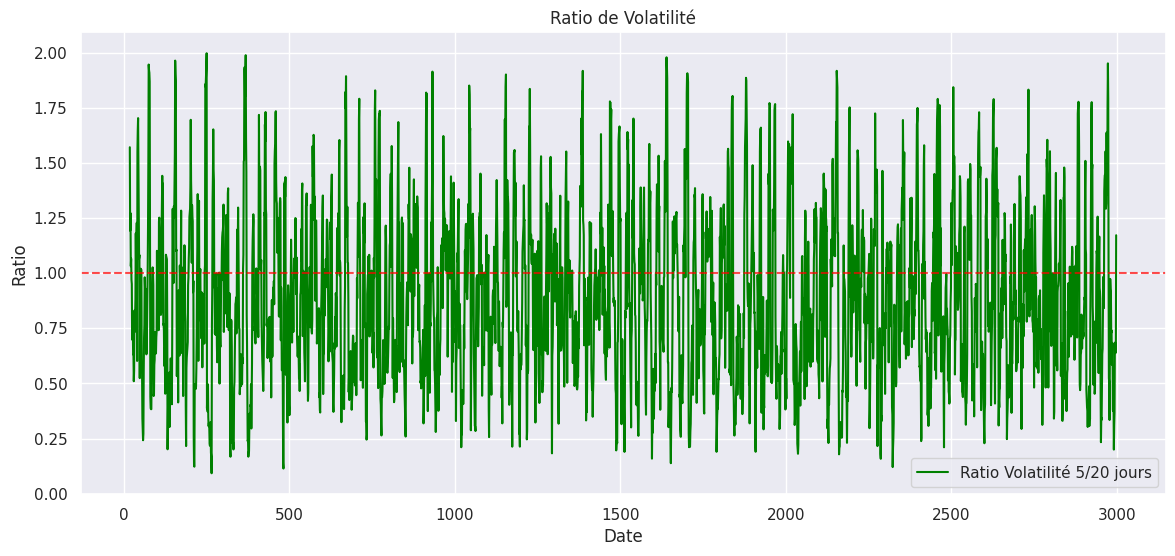

In [ ]:
#Ratio de Volatilité
plt.figure(figsize=(14, 6))
plt.plot(data_2["vol_ratio_5_20"], label="Ratio Volatilité 5/20 jours", color="green")
plt.axhline(1, color="red", linestyle="--", alpha=0.7)
plt.title("Ratio de Volatilité")
plt.xlabel("Date")
plt.ylabel("Ratio")
plt.legend()
plt.show()


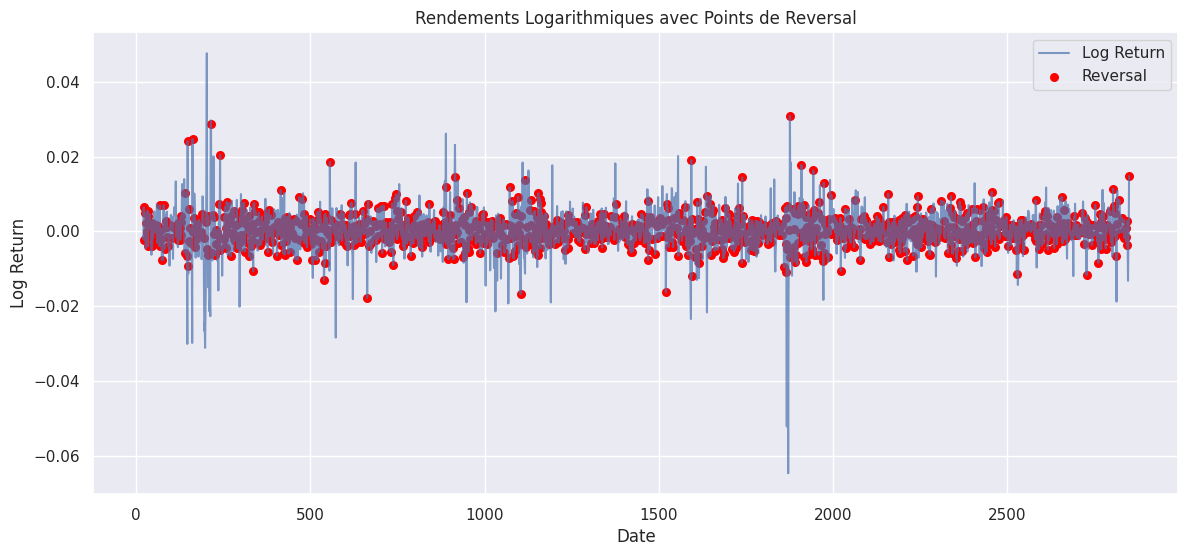

In [ ]:
#Zones de Reversal
plt.figure(figsize=(14, 6))
plt.plot(data_2["Log Return"], label="Log Return", alpha=0.7)
reversal_dates = data_2[data_2["reversal"] == 1].index
plt.scatter(reversal_dates, data_2.loc[reversal_dates, "Log Return"], color="red", label="Reversal", s=30)
plt.title("Rendements Logarithmiques avec Points de Reversal")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend()
plt.show()

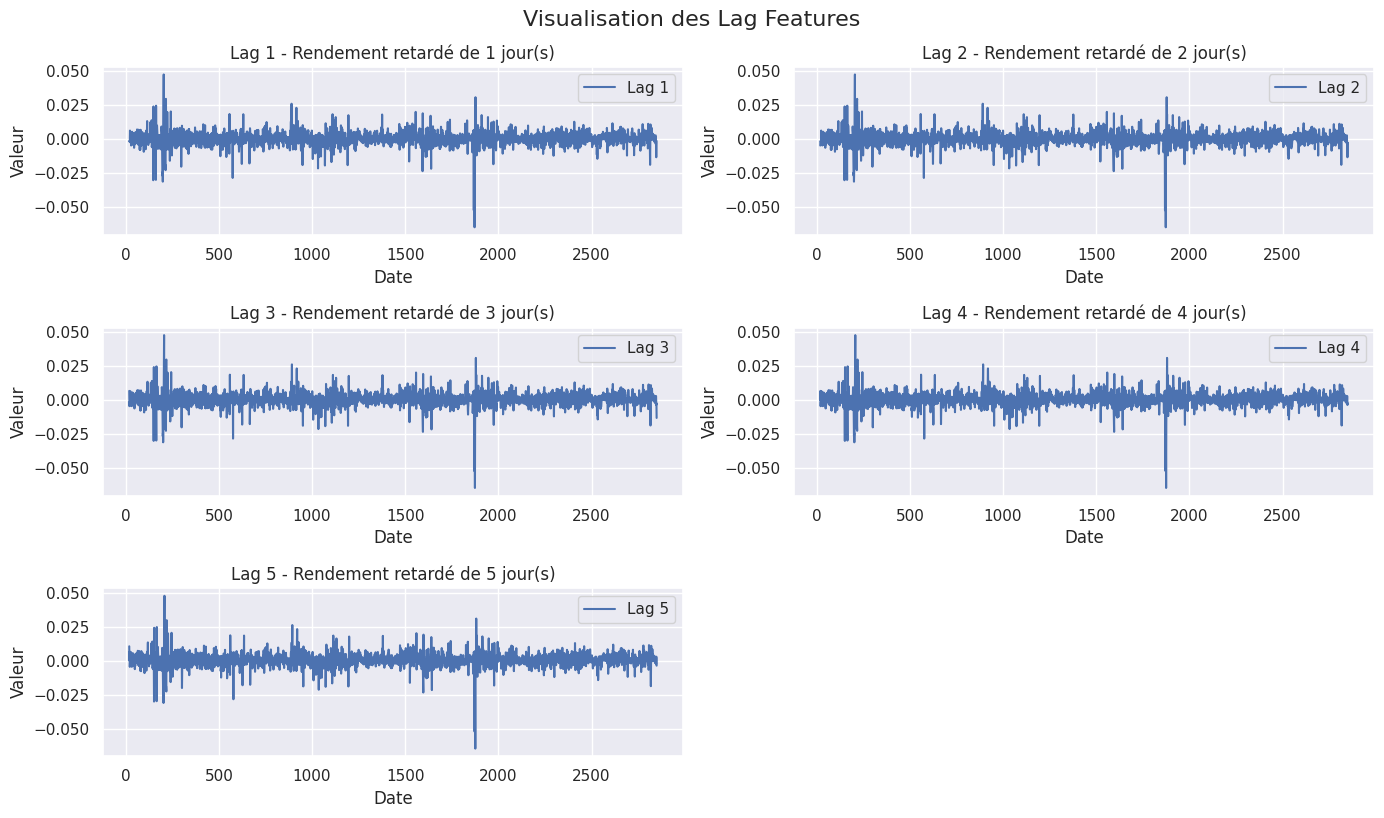

In [ ]:
import matplotlib.pyplot as plt

lags = [1, 2, 3, 4, 5]
plt.figure(figsize=(14, 8))

for i, lag in enumerate(lags, start=1):
    plt.subplot(3, 2, i)
    plt.plot(data_2[f"lag_{lag}"], label=f"Lag {lag}")
    plt.title(f"Lag {lag} - Rendement retardé de {lag} jour(s)")
    plt.xlabel("Date")
    plt.ylabel("Valeur")
    plt.legend()

plt.tight_layout()
plt.suptitle("Visualisation des Lag Features", y=1.02, fontsize=16)
plt.show()


In [ ]:
data_2 = pd.read_csv("/content/drive/MyDrive/STAGE-PFE/rendements_tunindex_with_variables.csv")

In [ ]:
data_2.columns

Index(['Log Return', 'ma_5', 'std_5', 'ma_10', 'std_10', 'ma_20', 'std_20',
       'momentum_1', 'momentum_5', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5',
       'cum_return_5', 'cum_return_10', 'ma_diff_5_20', 'vol_ratio_5_20',
       'reversal', 'max_10', 'min_10'],
      dtype='object')

In [ ]:
# #Création de la pipeline

# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import FunctionTransformer
# import joblib


In [ ]:
data_2['Log Return']

19     -0.001374
20     -0.001848
21     -0.001907
22      0.006404
23      0.001070
          ...   
2845   -0.002365
2846   -0.013218
2847   -0.002559
2848   -0.001271
2849    0.014815
Name: Log Return, Length: 2831, dtype: float64

**Séparation des données**

In [ ]:
from sklearn.model_selection import train_test_split

#X = data_2[['ma_5', 'std_5', 'ma_10','std_10','ma_20','std_20','momentum_1','momentum_5','lag_1','lag_2','lag_3','lag_4','lag_5','cum_return_5','cum_return_10','ma_diff_5_20','vol_ratio_5_20','reversal','max_10','min_10']]
X = data_2[['ma_5', 'std_5','std_10','std_20','momentum_1','lag_1','lag_2','lag_3','cum_return_5','ma_diff_5_20','vol_ratio_5_20','reversal','max_10','min_10']]
y = data_2['Log Return']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

##**Régression Linaaire**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Création les targets : VaR réalisée empirique
data_2['target_95'] = data_2['Log Return'].rolling(window=100).quantile(0.05).shift(-1)
data_2['target_99'] = data_2['Log Return'].rolling(window=100).quantile(0.01).shift(-1)

data_ml = data_2.dropna()

In [ ]:
features = [col for col in data_ml.columns if col not in ['Log Return', 'target_95', 'target_99']]
X = data_ml[features]
y_95 = data_ml['target_95']
y_99 = data_ml['target_99']

# Split train/test
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train_95, y_test_95 = y_95[:split], y_95[split:]
y_train_99, y_test_99 = y_99[:split], y_99[split:]


In [ ]:
# Entraînement modèle
model_95 = LinearRegression()
model_99 = LinearRegression()
model_95.fit(X_train, y_train_95)
model_99.fit(X_train, y_train_99)

LinearRegression()

In [ ]:
# Prédictions
pred_95 = model_95.predict(X_test)
pred_99 = model_99.predict(X_test)

In [ ]:
# Évaluation
mse_95 = mean_squared_error(y_test_95, pred_95)
mse_99 = mean_squared_error(y_test_99, pred_99)

print(f"RMSE VaR 95% : {np.sqrt(mse_95):.5f}")
print(f"RMSE VaR 99% : {np.sqrt(mse_99):.5f}")


RMSE VaR 95% : 0.00165
RMSE VaR 99% : 0.00344


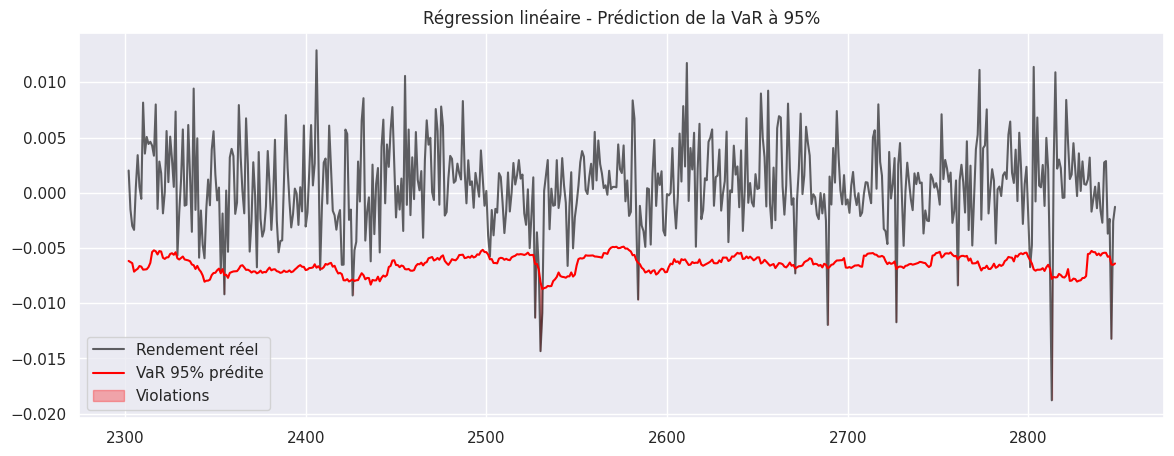

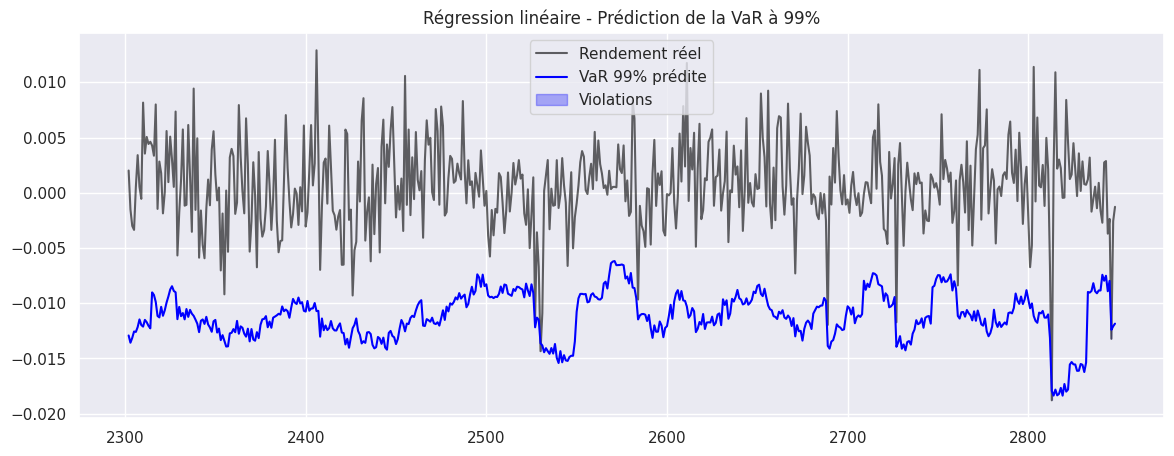

In [ ]:
results = pd.DataFrame({
    'Log Return': data_ml['Log Return'].iloc[split:],
    'VaR_95_pred': pred_95,
    'VaR_99_pred': pred_99
}, index=data_ml.index[split:])

# Plot VaR à 95%
plt.figure(figsize=(14, 5))
plt.plot(results.index, results['Log Return'], label='Rendement réel', color='black', alpha=0.6)
plt.plot(results.index, results['VaR_95_pred'], label='VaR 95% prédite', color='red')
plt.fill_between(results.index, results['VaR_95_pred'], results['Log Return'],
                 where=(results['Log Return'] < results['VaR_95_pred']),
                 color='red', alpha=0.3, label='Violations')
plt.title('Régression linéaire - Prédiction de la VaR à 95%')
plt.legend()
plt.show()

# Plot VaR à 99%
plt.figure(figsize=(14, 5))
plt.plot(results.index, results['Log Return'], label='Rendement réel', color='black', alpha=0.6)
plt.plot(results.index, results['VaR_99_pred'], label='VaR 99% prédite', color='blue')
plt.fill_between(results.index, results['VaR_99_pred'], results['Log Return'],
                 where=(results['Log Return'] < results['VaR_99_pred']),
                 color='blue', alpha=0.3, label='Violations')
plt.title('Régression linéaire - Prédiction de la VaR à 99%')
plt.legend()
plt.show()


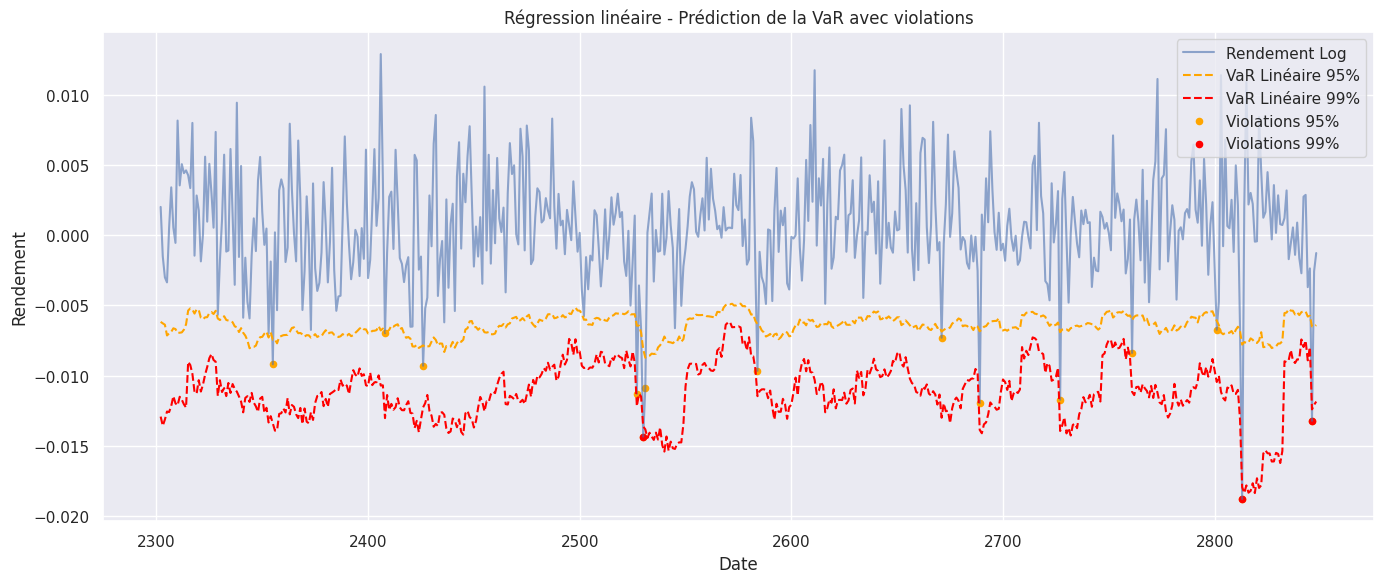

In [ ]:
# === Préparation des données ===
results = pd.DataFrame({
    'Log Return': data_ml['Log Return'].iloc[split:],
    'VaR_95_pred': pred_95,
    'VaR_99_pred': pred_99
}, index=data_ml.index[split:])

# Calcul des violations
violations_95 = results['Log Return'] < results['VaR_95_pred']
violations_99 = results['Log Return'] < results['VaR_99_pred']

# === Affichage graphique ===
plt.figure(figsize=(14, 6))
plt.plot(results.index, results['Log Return'], label="Rendement Log", alpha=0.6)
plt.plot(results.index, results['VaR_95_pred'], color='orange', linestyle='--', label="VaR Linéaire 95%")
plt.plot(results.index, results['VaR_99_pred'], color='red', linestyle='--', label="VaR Linéaire 99%")
plt.scatter(results.index[violations_95], results['Log Return'][violations_95],
            color='orange', label="Violations 95%", s=20)
plt.scatter(results.index[violations_99], results['Log Return'][violations_99],
            color='red', label="Violations 99%", s=20)
plt.title("Régression linéaire - Prédiction de la VaR avec violations")
plt.xlabel("Date")
plt.ylabel("Rendement")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##**Random Forest**

In [ ]:
from sklearn.model_selection import train_test_split
X = data_2[['ma_5', 'std_5','std_10','std_20','momentum_1','lag_1','lag_2','lag_3','cum_return_5','ma_diff_5_20','vol_ratio_5_20','reversal','max_10','min_10']]
y = data_2['Log Return']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])


In [ ]:
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 5, 10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}

In [1]:
# GridSearch avec validation croisée
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2)
0

grid_search.fit(X_train, y_train)
print("Meilleuresss paramètres :")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
y_pred_rf = best_model.predict(X_test)

# Évaluation
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"\nÉvaluation avec le meilleur modèle :")
print(f"RMSE : {rmse:.6f}")
print(f"MAE  : {mae:.6f}")
print(f"R²   : {r2:.6f}")


Évaluation avec le meilleur modèle :
RMSE : 0.000434
MAE  : 0.000239
R²   : 0.987862


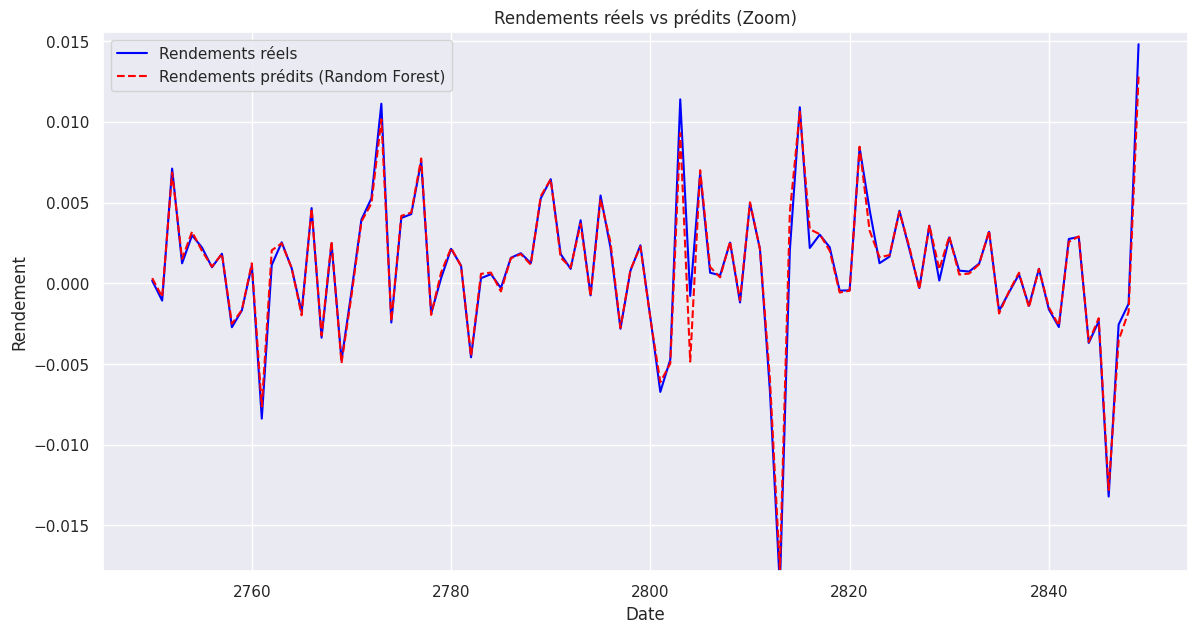

In [ ]:
plt.figure(figsize=(14, 7))
zoom_range = 100
plt.plot(data_2.index[-zoom_range:], y_test[-zoom_range:], label='Rendements réels', color='blue')
plt.plot(data_2.index[-zoom_range:], y_pred_rf[-zoom_range:], label='Rendements prédits (Random Forest)', color='red', linestyle='--')

plt.title('Rendements réels vs prédits (Zoom)')
plt.xlabel('Date')
plt.ylabel('Rendement')

plt.ylim(min(y_test[-zoom_range:]) * 0.95, max(y_test[-zoom_range:]) * 1.05)

plt.legend()
plt.show()



In [ ]:
y_pred_rf = best_model.predict(X_test)
predicted_returns_rf = pd.Series(y_pred_rf, index=y_test.index)


VaR_95_rf = predicted_returns_rf.rolling(window=100).quantile(0.05)
VaR_99_rf = predicted_returns_rf.rolling(window=100).quantile(0.01)
# Détection des violations
violations_rf = y_test < VaR_95_rf
violations_rf_99 = y_test < VaR_99_rf


In [ ]:
VaR_95_rf.mean()

np.float64(-0.005051014744465349)

In [2]:
plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test, label='Rendements réels', color='black', linewidth=1)
plt.plot(VaR_95_rf.index, VaR_95_rf, label='VaR 95% - Random Forest', color='orange', linestyle='--')
plt.plot(VaR_95_rf.index, VaR_99_rf, label='VaR 99% - Random Forest', color='orange', linestyle='--')
plt.scatter(y_test.index[violations_rf], y_test[violations_rf],
            color='red', marker='o', label='Violations', zorder=5)

plt.scatter(y_test.index[violations_rf_99], y_test[violations_rf],
            color='red', marker='o', label='Violations', zorder=5)
plt.title("VaR estimée par Random Forest")
plt.xlabel("Date")
plt.ylabel("Rendement Log")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

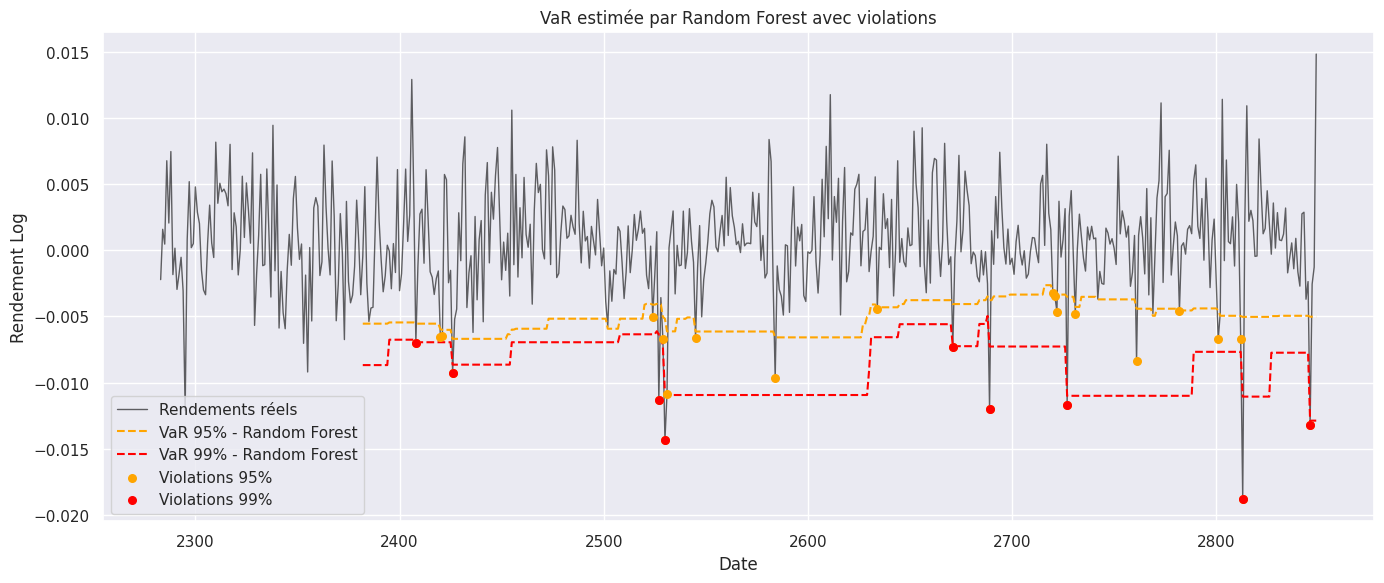

In [ ]:
plt.figure(figsize=(14,6))

plt.plot(y_test.index, y_test, label='Rendements réels', color='black', linewidth=1, alpha=0.6)

plt.plot(VaR_95_rf.index, VaR_95_rf, label='VaR 95% - Random Forest', color='orange', linestyle='--')
plt.plot(VaR_99_rf.index, VaR_99_rf, label='VaR 99% - Random Forest', color='red', linestyle='--')

# Plot des violations
plt.scatter(y_test.index[violations_rf], y_test[violations_rf],
            color='orange', marker='o', label='Violations 95%', s=30, zorder=5)
plt.scatter(y_test.index[violations_rf_99], y_test[violations_rf_99],
            color='red', marker='o', label='Violations 99%', s=30, zorder=5)

plt.title("VaR estimée par Random Forest avec violations")
plt.xlabel("Date")
plt.ylabel("Rendement Log")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
violation_rate_95 = np.mean(violations_rf) * 100
violation_rate_99 = np.mean(violations_rf_99) * 100
print(f"Taux de violation à 95% : {violation_rate_95:.2f}%")
print(f"Taux de violation à 99% : {violation_rate_99:.2f}%")

Taux de violation à 95% : 4.41%
Taux de violation à 99% : 1.59%


In [ ]:
VaR_95_rf.mean()

np.float64(-0.005051014744465349)

In [ ]:
VaR_99_rf.mean()

np.float64(-0.008634259706407318)

##**XGBoost**

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV



In [ ]:
data_3 = data_2[['ma_5', 'std_5','std_10','std_20','momentum_1','lag_1','lag_2','lag_3','cum_return_5','ma_diff_5_20','vol_ratio_5_20','reversal','max_10','min_10','Log Return']]
y = data_2['Log Return']

from sklearn.model_selection import train_test_split
#X = data_2[['ma_5', 'std_5','std_10','momentum_1']] #pour notre modele Chrono
X = data_2[['ma_5', 'std_5','std_10','std_20','momentum_1','lag_1','lag_2','lag_3','cum_return_5','ma_diff_5_20','vol_ratio_5_20','reversal','max_10','min_10']]
y = data_2['Log Return']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
pipeline = Pipeline([

    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor(objective='reg:squarederror', random_state=42))
])


In [ ]:
param_distributions = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 4, 5, 6],
    'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xgb__subsample': [0.6, 0.8, 1.0],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0],
    'xgb__gamma': [0, 0.1, 0.3, 0.5],
    'xgb__reg_alpha': [0, 0.1, 0.5],
    'xgb__reg_lambda': [1, 1.5, 2]
}
# RandomizedSearch
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


In [ ]:
#traininggggg
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('xgb',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           device=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=None,
                                                           gamma=None,
                                                           grow_policy=None,
                                                           importance_ty...
                   n_iter=50, n_jobs=-1,
                   param_distributions={'xgb__colsample_bytree': [0.6, 0.8,
                                                                  1.0],
                                        'xgb__gamma': [0, 0.1, 0.3, 0.5],
                                        'xgb__learning_rate': [0.01, 0.05, 0.1,
                                                               0.2],
                                        'xgb__max_depth': [3, 4, 5, 6],
                                        'xgb__n_estimators': [100, 200, 300],
                                        'xgb__reg_alpha': [0, 0.1, 0.5],
                                        'xgb__reg_lambda': [1, 1.5, 2],
                                        'xgb__subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [ ]:
print("Meilleurs paramètres XGBoost :")
print(random_search.best_params_)

Meilleurs paramètres XGBoost :
{'xgb__subsample': 0.8, 'xgb__reg_lambda': 1, 'xgb__reg_alpha': 0, 'xgb__n_estimators': 200, 'xgb__max_depth': 4, 'xgb__learning_rate': 0.2, 'xgb__gamma': 0, 'xgb__colsample_bytree': 0.8}


In [ ]:
best_xgb_model = random_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print(f"\nÉvaluation du meilleur XGBoost :")
print(f"RMSE : {rmse:.6f}")
print(f"MAE  : {mae:.6f}")
print(f"R²   : {r2:.6f}")


Évaluation du meilleur XGBoost :
RMSE : 0.000548
MAE  : 0.000385
R²   : 0.980573


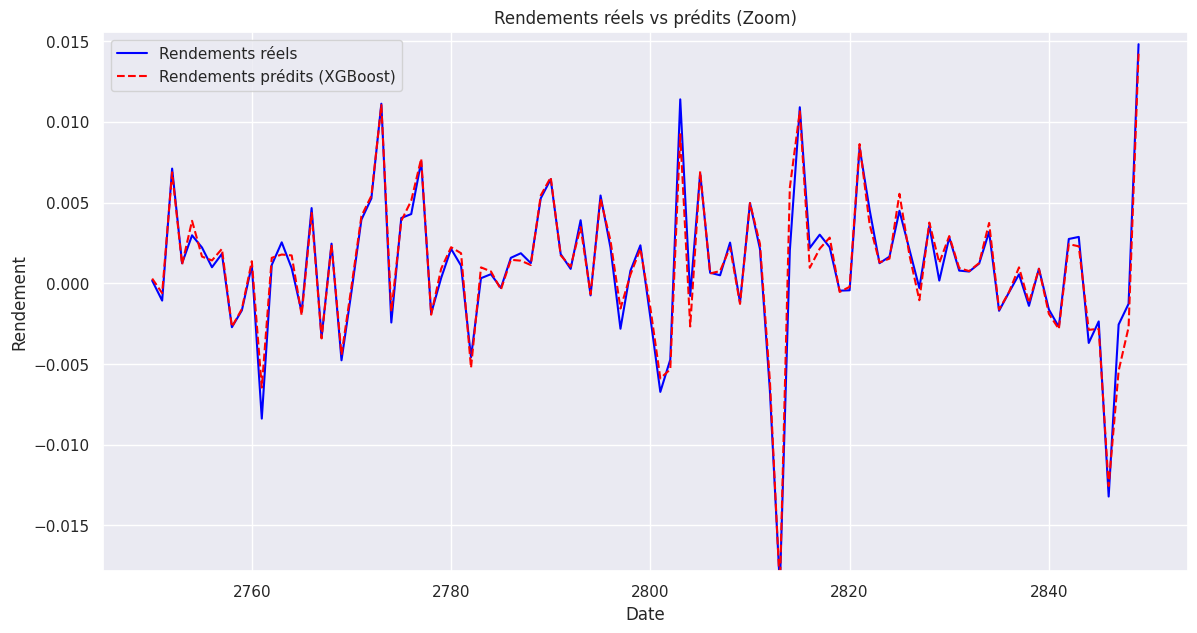

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 7))
zoom_range = 100
plt.plot(data_2.index[-zoom_range:], y_test[-zoom_range:], label='Rendements réels', color='blue')
plt.plot(data_2.index[-zoom_range:], y_pred_xgb[-zoom_range:], label='Rendements prédits (XGBoost)', color='red', linestyle='--')

plt.title('Rendements réels vs prédits (Zoom)')
plt.xlabel('Date')
plt.ylabel('Rendement')

plt.ylim(min(y_test[-zoom_range:]) * 0.95, max(y_test[-zoom_range:]) * 1.05)

plt.legend()
plt.show()



In [ ]:
y_pred_xgb = best_xgb_model.predict(X_test)
predicted_returns_xgb = pd.Series(y_pred_xgb, index=y_test.index)

VaR_95_xgb = predicted_returns_xgb.rolling(window=100).quantile(0.05)
VaR_99_xgb = predicted_returns_xgb.rolling(window=100).quantile(0.01)

violations_xgb = y_test < VaR_95_xgb
violations_xgb_99 = y_test < VaR_99_xgb



In [ ]:
VaR_95_xgb.mean()

np.float64(-0.004914611462641977)

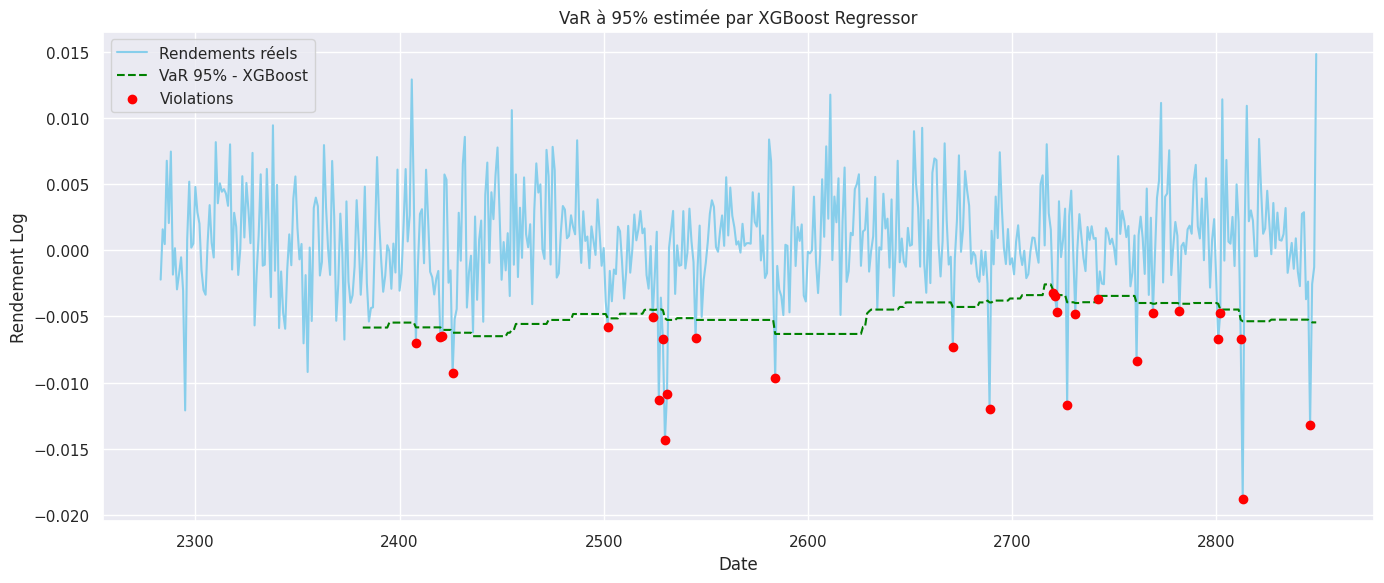

Taux de violation à 95% : 4.94%


In [ ]:
plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test, label='Rendements réels', color='skyblue')
plt.plot(VaR_95_xgb.index, VaR_95_xgb, label='VaR 95% - XGBoost', color='green', linestyle='--')
plt.scatter(y_test.index[violations_xgb], y_test[violations_xgb],
            color='red', label='Violations', zorder=5)
plt.title("VaR à 95% estimée par XGBoost Regressor")
plt.xlabel("Date")
plt.ylabel("Rendement Log")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Taux de violation
violation_rate_xgb = np.mean(violations_xgb) * 100
print(f"Taux de violation à 95% : {violation_rate_xgb:.2f}%")

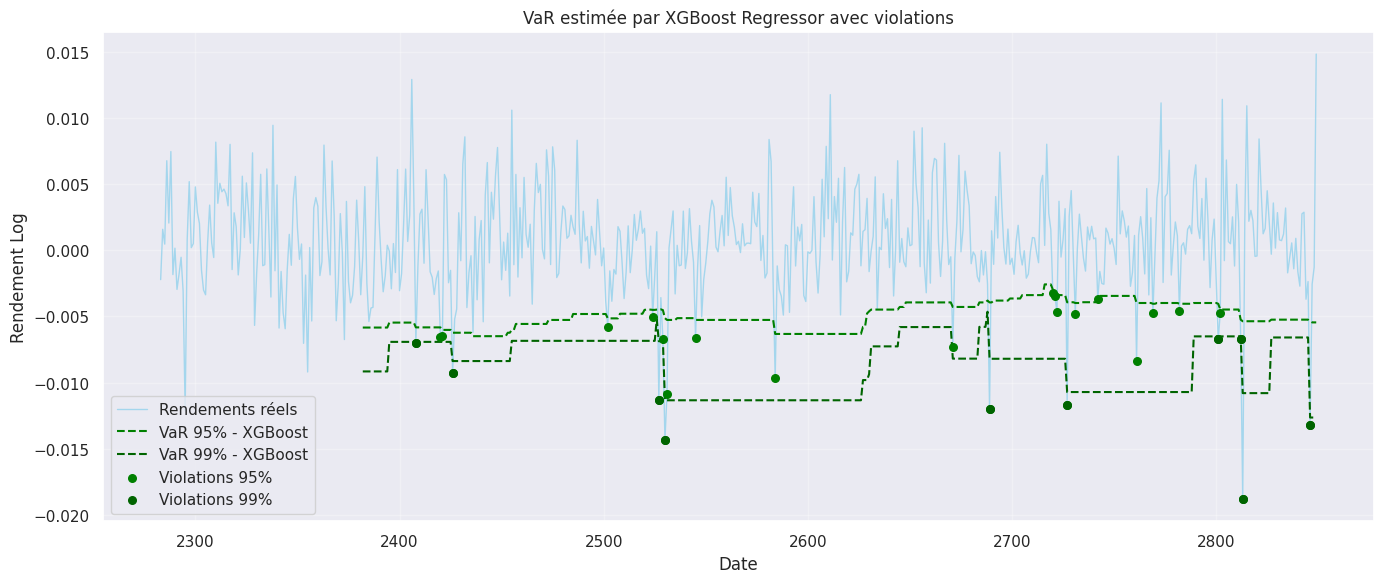

=== Taux de violation ===
Taux de violation à 95% : 4.94% (attendu: 5%)
Taux de violation à 99% : 1.76% (attendu: 1%)


In [ ]:
plt.figure(figsize=(14,6))

plt.plot(y_test.index, y_test, label='Rendements réels', color='skyblue', alpha=0.7, linewidth=1)

plt.plot(VaR_95_xgb.index, VaR_95_xgb, label='VaR 95% - XGBoost', color='green', linestyle='--')
plt.plot(VaR_99_xgb.index, VaR_99_xgb, label='VaR 99% - XGBoost', color='darkgreen', linestyle='--')

# Plot des violations
plt.scatter(y_test.index[violations_xgb], y_test[violations_xgb],
            color='green', marker='o', label='Violations 95%', s=30, zorder=5)
plt.scatter(y_test.index[violations_xgb_99], y_test[violations_xgb_99],
            color='darkgreen', marker='o', label='Violations 99%', s=30, zorder=5)

plt.title("VaR estimée par XGBoost Regressor avec violations")
plt.xlabel("Date")
plt.ylabel("Rendement Log")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

violation_rate_xgb_95 = np.mean(violations_xgb) * 100
violation_rate_xgb_99 = np.mean(violations_xgb_99) * 100

print("=== Taux de violation ===")
print(f"Taux de violation à 95% : {violation_rate_xgb_95:.2f}% (attendu: 5%)")
print(f"Taux de violation à 99% : {violation_rate_xgb_99:.2f}% (attendu: 1%)")

In [ ]:
violation_rate_xgb_99 = np.mean(violations_xgb_99) * 100
print(f"Taux de violation à 95% : {violation_rate_xgb_99:.2f}%")

Taux de violation à 95% : 1.76%


In [3]:
dump(model, "xgboost_model.pkl")

**Modèle LightGBM**

In [ ]:
pip install --upgrade lightgbm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 63.3 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.5.0
    Uninstalling lightgbm-4.5.0:
      Successfully uninstalled lightgbm-4.5.0


In [ ]:
X = data_2[['ma_5', 'std_5','std_10','std_20','momentum_1','lag_1','lag_2','lag_3','cum_return_5','ma_diff_5_20','vol_ratio_5_20','reversal','max_10','min_10']]
y = data_2['Log Return']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from lightgbm import LGBMRegressor


model = LGBMRegressor(metric='rmse')
model.fit(X_train, y_train)
y_train = model.predict(X_train)
y_val = model.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3312
[LightGBM] [Info] Number of data points in the train set: 2264, number of used features: 14
[LightGBM] [Info] Start training from score 0.000257


In [ ]:
y_pred_lighGBM = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_val))

r2 = r2_score(y_test, y_val)

print(f"RMSE : {rmse:.8f}")
print(f"R²   : {r2:.6f}")

RMSE : 0.00044029
R²   : 0.987480


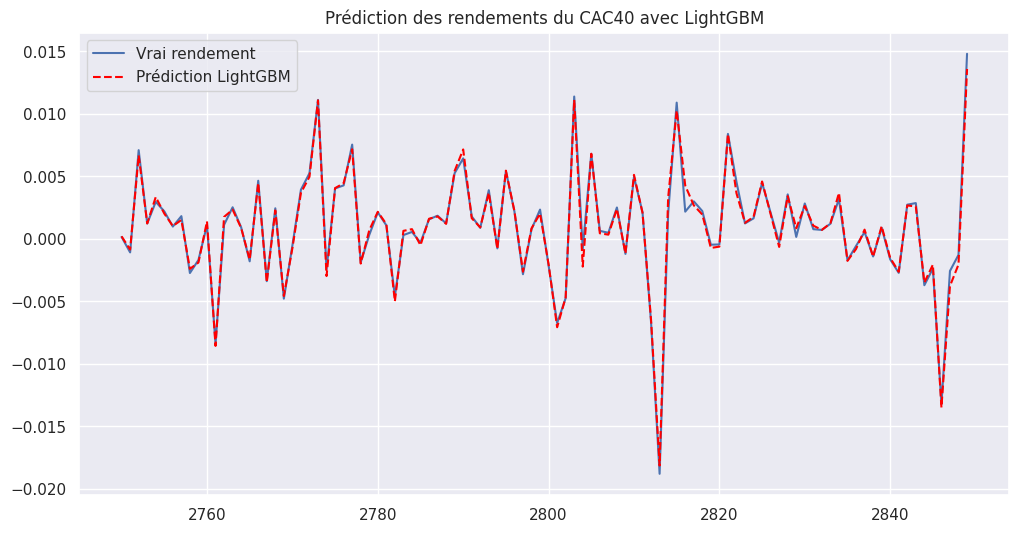

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.index[-zoom_range:], y_test[-zoom_range:], label="Vrai rendement")
plt.plot(y_test.index[-zoom_range:], y_pred_lighGBM[-zoom_range:], color='red', linestyle='--', label="Prédiction LightGBM")
plt.legend()
plt.title("Prédiction des rendements du CAC40 avec LightGBM")
plt.show()


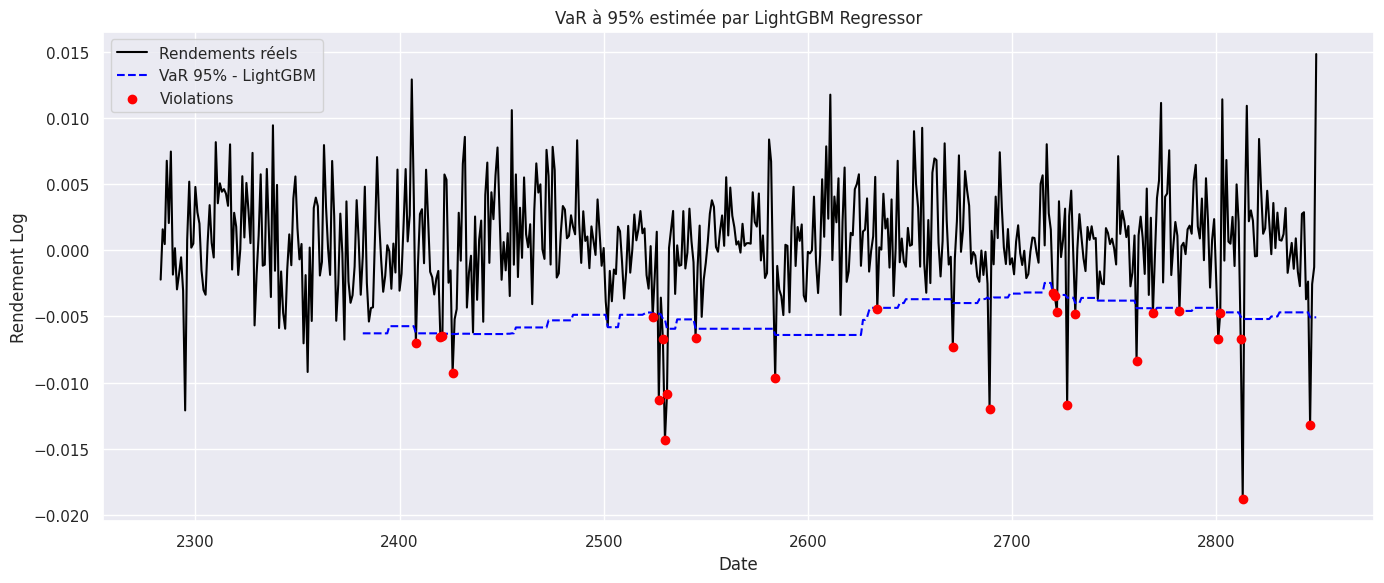

Taux de violation à 95% : 4.76%


In [ ]:
# Prédiction des rendements
y_pred_lgb = model.predict(X_test)
predicted_returns_lgb = pd.Series(y_pred_lgb, index=y_test.index)


VaR_95_lgb = predicted_returns_lgb.rolling(window=100).quantile(0.05)

violations_lgb = y_test < VaR_95_lgb

# Visualisation
plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test, label='Rendements réels', color='black')
plt.plot(VaR_95_lgb.index, VaR_95_lgb, label='VaR 95% - LightGBM', color='blue', linestyle='--')
plt.scatter(y_test.index[violations_lgb], y_test[violations_lgb],
            color='red', label='Violations', zorder=5)
plt.title("VaR à 95% estimée par LightGBM Regressor")
plt.xlabel("Date")
plt.ylabel("Rendement Log")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

violation_rate_lgb = np.mean(violations_lgb) * 100
print(f"Taux de violation à 95% : {violation_rate_lgb:.2f}%")


In [ ]:
VaR_95_lgb.mean()

np.float64(-0.005021108578455746)

### **Tableau recaptitulatif des Trois modèles**

In [ ]:
def evaluate_model(name, y_test, y_pred,violation):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {"Modèle": name, "RMSE": rmse, "MAE": mae, "R²": r2,"Violations":violation}

In [ ]:
results = []
results.append(evaluate_model("Random Forest", y_test, y_pred_rf,violation=5.87))
results.append(evaluate_model("XGBoost", y_test, y_pred_xgb,4.87))
results.append(evaluate_model("LightGBM", y_test, y_pred_lighGBM,5.54))

In [ ]:
results = pd.DataFrame(results)
results

Modèle      RMSE       MAE        R²  Violations
0  Random Forest  0.000434  0.000239  0.987862        5.87
1        XGBoost  0.000548  0.000385  0.980573        4.87
2       LightGBM  0.000440  0.000272  0.987480        5.54

***Dans la suite de ce notebook, nous passerons à d'autres modèles plus complexe notamment le  LSTM, ou d'autres réseaux neuronaux récurrents qui sont mieux adaptés aux données temporelles.***

# **Reseaux de neurones profonds DNN**

In [ ]:
data_2 = pd.read_csv("/content/drive/MyDrive/STAGE-PFE/rendements_tunindex_with_variables.csv")

In [ ]:
from sklearn.model_selection import train_test_split
X = data_2[['ma_5', 'std_5','std_10','std_20','momentum_1','lag_1','lag_2','lag_3','cum_return_5','ma_diff_5_20','vol_ratio_5_20','reversal','max_10','min_10']]
y = data_2['Log Return']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))



In [ ]:
# Modèle DNN
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Prédiction
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)


VaR_95_dnn = pd.Series(y_pred.flatten()).rolling(window=100).quantile(0.05)
VaR_99_dnn = pd.Series(y_pred.flatten()).rolling(window=100).quantile(0.01)
returns_test = y_test.reset_index(drop=True)

violations = returns_test < VaR_95_dnn
violations_99 = returns_test < VaR_99_dnn

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
rmse = np.sqrt(mean_squared_error(returns_test, y_pred))
mae = mean_absolute_error(returns_test, y_pred)
r2 = r2_score(returns_test, y_pred)
taux_violation = np.mean(violations) * 100
taux_violation_99 = np.mean(violations_99) * 100
print(f"RMSE : {rmse:.8f}")
print(f"MAE  : {mae:.8f}")
print(f"R²   : {r2:.4f}")
print(f"Taux de violation à 95% : {taux_violation:.2f}%")
print(f"Taux de violation à 99% : {taux_violation_99:.2f}%")

RMSE : 0.00023840
MAE  : 0.00021206
R²   : 0.9952
Taux de violation à 95% : 6.38%
Taux de violation à 99% : 1.85%


In [ ]:
VaR_95_dnn.mean()

np.float64(-0.004682818217501905)

In [ ]:
VaR_99_dnn.mean()

np.float64(-0.006989857649896293)

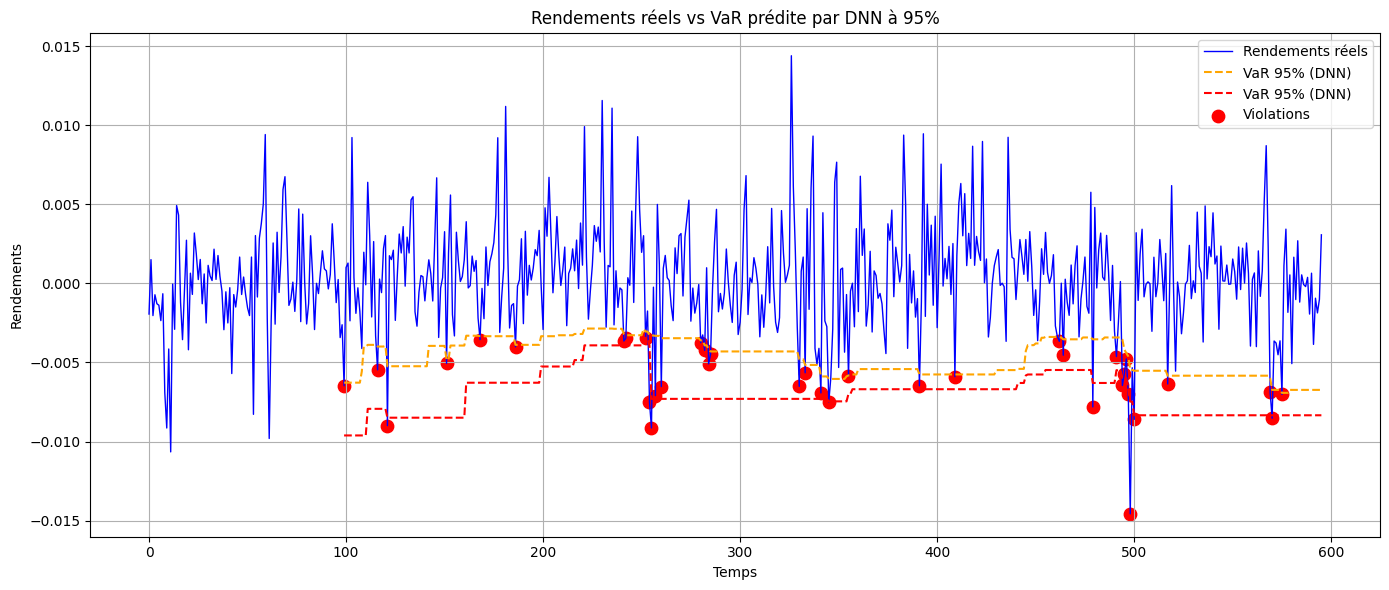

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(returns_test, label="Rendements réels", color="blue", linewidth=1)
plt.plot(VaR_95_dnn, label="VaR 95% (DNN)", color="orange", linestyle="--", linewidth=1.5)
plt.plot(VaR_99_dnn, label="VaR 95% (DNN)", color="green", linestyle="--", linewidth=1.5)
plt.scatter(returns_test.index[violations], returns_test[violations],
            color='red', marker='o', s=80, label="Violations")

plt.title("Rendements réels vs VaR prédite par DNN à 95%")
plt.xlabel("Temps")
plt.ylabel("Rendements")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Input
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np

# Modèle amélioré
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Entraînement
history = model.fit(X_train_scaled, y_train_scaled,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stop, reduce_lr],
                    verbose=1)

plt.figure(figsize=(10, 5))
epochs = range(1, len(history.history['loss']) + 1)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8546 - val_loss: 0.2769 - learning_rate: 0.0010
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3563 - val_loss: 0.1828 - learning_rate: 0.0010
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2611 - val_loss: 0.1475 - learning_rate: 0.0010
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2227 - val_loss: 0.1396 - learning_rate: 0.0010
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1926 - val_loss: 0.1336 - learning_rate: 0.0010
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1730 - val_loss: 0.1270 - learning_rate: 0.0010
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1599 - val_loss: 0.1372 - learning_rate: 0.0010
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1492 - val_loss: 0.1317 - learning_rate: 0.0010
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1435 - val_loss: 0.1239 - learning_rate: 0.0010
Epoch 10/100
60/6

<Figure size 1000x500 with 0 Axes>

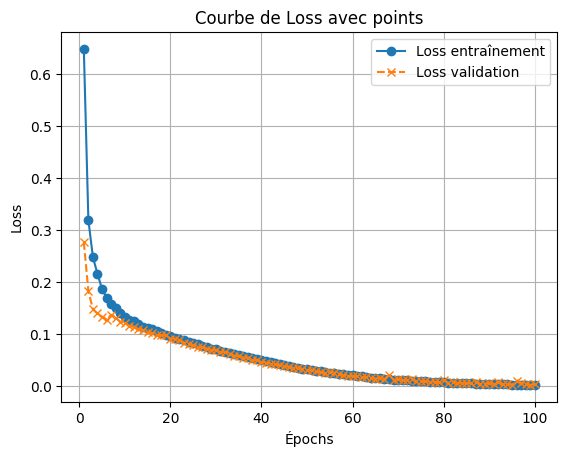

In [ ]:
plt.plot(epochs, history.history['loss'], label='Loss entraînement', linestyle='-', marker='o')
plt.plot(epochs, history.history['val_loss'], label='Loss validation', linestyle='--', marker='x')
plt.title('Courbe de Loss avec points')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


##**LSTM (Long Short-Term Memory)**

Utilisons maintenant  un réseau de neurones récurrent de type LSTM (Long Short-Term Memory) bidirectionnel. Il utilise une architecture avancée avec deux couches LSTM : une première couche bidirectionnelle pour capturer les dépendances temporelles dans les deux sens (passé et futur), suivie d'une seconde couche LSTM pour extraire des caractéristiques plus profondes. Chaque couche est suivie de normalisation de lot (BatchNormalization) et de régularisation par dropout pour éviter l'overfitting. La sortie du modèle est une seule valeur continue représentant la prédiction des rendements. Le modèle est optimisé à l'aide de l'optimiseur Adam avec un taux d'apprentissage adaptatif, et un ensemble de callbacks professionnels (comme EarlyStopping, ModelCheckpoint, et ReduceLROnPlateau) est utilisé pour améliorer la convergence et éviter le sur-apprentissage. Le prétraitement des données inclut l'utilisation de RobustScaler pour rendre le modèle moins sensible aux valeurs aberrantes, et les entrées sont reformatées pour être compatibles avec les exigences d'un réseau LSTM.

Partie ajoutée pendant le rapport

In [ ]:
returns = data_2['Log Return']

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Input, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

scaler = RobustScaler(quantile_range=(5, 95))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape pour LSTM
X_train_lstm = X_train_scaled.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test_scaled.reshape((X_test.shape[0], X_test.shape[1], 1))

def build_lstm_model(input_shape):
    inputs = Input(shape=input_shape)

    # Couche LSTM Bidirectionnelle
    x = tf.keras.layers.Bidirectional(
        LSTM(128, return_sequences=True,
             kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Deuxième couche LSTM
    x = LSTM(96, return_sequences=False,
             kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Couches Denses profondes
    x = Dense(128, activation='swish')(x)
    x = Dense(64, activation='swish')(x)
    x = Dense(32, activation='swish')(x)


    outputs = Dense(1, kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

model = build_lstm_model((X_train_lstm.shape[1], 1))

optimizer = Adam(
    learning_rate=0.0005,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)



model.compile(
    optimizer=optimizer,
    loss='mean_absolute_error',
    metrics=['mae', 'mse']
)

## Callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=20,
        restore_best_weights=True,
        min_delta=0.001
    ),
    ModelCheckpoint(
        'best_model.h5',
        save_best_only=True,
        monitor='val_loss',
        mode='min'
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=10,
        min_lr=1e-6
    )
]


history = model.fit(
    X_train_lstm, y_train,
    epochs=1000,
    batch_size=64,
    validation_split=0.15,
    validation_data=(X_test, y_test),
    callbacks=callbacks,
    verbose=1,
    shuffle=False
)


y_pred = model.predict(X_test_lstm)

model.save('cac40_lstm_premium.h5')

Epoch 1/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.2112 - mae: 0.1321 - mse: 0.0427

38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - loss: 0.2094 - mae: 0.1302 - mse: 0.0418 - val_loss: 0.0801 - val_mae: 0.0026 - val_mse: 1.2038e-05 - learning_rate: 5.0000e-04
Epoch 2/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.1248 - mae: 0.0478 - mse: 0.0048

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.1246 - mae: 0.0477 - mse: 0.0048 - val_loss: 0.0795 - val_mae: 0.0045 - val_mse: 2.8712e-05 - learning_rate: 5.0000e-04
Epoch 3/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.1064 - mae: 0.0321 - mse: 0.0023

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - loss: 0.1062 - mae: 0.0320 - mse: 0.0023 - val_loss: 0.0751 - val_mae: 0.0031 - val_mse: 1.5812e-05 - learning_rate: 5.0000e-04
Epoch 4/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0958 - mae: 0.0245 - mse: 0.0013

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0957 - mae: 0.0244 - mse: 0.0013 - val_loss: 0.0742 - val_mae: 0.0053 - val_mse: 3.7538e-05 - learning_rate: 5.0000e-04
Epoch 5/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0885 - mae: 0.0204 - mse: 9.1713e-04

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0884 - mae: 0.0203 - mse: 9.1233e-04 - val_loss: 0.0684 - val_mae: 0.0027 - val_mse: 1.3256e-05 - learning_rate: 5.0000e-04
Epoch 6/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.0820 - mae: 0.0172 - mse: 6.8235e-04

38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 0.0820 - mae: 0.0171 - mse: 6.7718e-04 - val_loss: 0.0653 - val_mae: 0.0029 - val_mse: 1.4572e-05 - learning_rate: 5.0000e-04
Epoch 7/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0770 - mae: 0.0153 - mse: 5.1021e-04

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0769 - mae: 0.0153 - mse: 5.0695e-04 - val_loss: 0.0645 - val_mae: 0.0053 - val_mse: 3.6349e-05 - learning_rate: 5.0000e-04
Epoch 8/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0709 - mae: 0.0125 - mse: 3.3120e-04

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0709 - mae: 0.0125 - mse: 3.3056e-04 - val_loss: 0.0640 - val_mae: 0.0079 - val_mse: 7.3159e-05 - learning_rate: 5.0000e-04
Epoch 9/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.0667 - mae: 0.0114 - mse: 2.7248e-04

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - loss: 0.0667 - mae: 0.0114 - mse: 2.7103e-04 - val_loss: 0.0561 - val_mae: 0.0031 - val_mse: 1.6059e-05 - learning_rate: 5.0000e-04
Epoch 10/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0619 - mae: 0.0096 - mse: 1.8781e-04

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0619 - mae: 0.0096 - mse: 1.8732e-04 - val_loss: 0.0536 - val_mae: 0.0035 - val_mse: 1.9191e-05 - learning_rate: 5.0000e-04
Epoch 11/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0578 - mae: 0.0084 - mse: 1.4766e-04

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0578 - mae: 0.0085 - mse: 1.4785e-04 - val_loss: 0.0510 - val_mae: 0.0038 - val_mse: 2.1594e-05 - learning_rate: 5.0000e-04
Epoch 12/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0545 - mae: 0.0079 - mse: 1.2586e-04

38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0544 - mae: 0.0079 - mse: 1.2575e-04 - val_loss: 0.0478 - val_mae: 0.0033 - val_mse: 1.7753e-05 - learning_rate: 5.0000e-04
Epoch 13/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0516 - mae: 0.0077 - mse: 1.2899e-04

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0516 - mae: 0.0077 - mse: 1.2864e-04 - val_loss: 0.0452 - val_mae: 0.0033 - val_mse: 1.7348e-05 - learning_rate: 5.0000e-04
Epoch 14/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.0487 - mae: 0.0074 - mse: 1.0808e-04

38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 0.0487 - mae: 0.0074 - mse: 1.0785e-04 - val_loss: 0.0424 - val_mae: 0.0029 - val_mse: 1.4310e-05 - learning_rate: 5.0000e-04
Epoch 15/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0458 - mae: 0.0069 - mse: 9.1275e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - loss: 0.0457 - mae: 0.0068 - mse: 9.0961e-05 - val_loss: 0.0403 - val_mae: 0.0032 - val_mse: 1.6631e-05 - learning_rate: 5.0000e-04
Epoch 16/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.0428 - mae: 0.0062 - mse: 7.2833e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 196ms/step - loss: 0.0428 - mae: 0.0062 - mse: 7.2858e-05 - val_loss: 0.0375 - val_mae: 0.0025 - val_mse: 1.2066e-05 - learning_rate: 5.0000e-04
Epoch 17/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.0403 - mae: 0.0058 - mse: 6.0839e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - loss: 0.0403 - mae: 0.0058 - mse: 6.1109e-05 - val_loss: 0.0359 - val_mae: 0.0030 - val_mse: 1.5866e-05 - learning_rate: 5.0000e-04
Epoch 18/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0378 - mae: 0.0054 - mse: 5.1665e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0378 - mae: 0.0054 - mse: 5.1724e-05 - val_loss: 0.0335 - val_mae: 0.0026 - val_mse: 1.2418e-05 - learning_rate: 5.0000e-04
Epoch 19/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.0359 - mae: 0.0055 - mse: 5.4910e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 0.0359 - mae: 0.0055 - mse: 5.4974e-05 - val_loss: 0.0322 - val_mae: 0.0031 - val_mse: 1.6433e-05 - learning_rate: 5.0000e-04
Epoch 20/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0338 - mae: 0.0052 - mse: 4.9889e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - loss: 0.0338 - mae: 0.0052 - mse: 4.9993e-05 - val_loss: 0.0300 - val_mae: 0.0027 - val_mse: 1.2831e-05 - learning_rate: 5.0000e-04
Epoch 21/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.0320 - mae: 0.0051 - mse: 4.8063e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - loss: 0.0319 - mae: 0.0051 - mse: 4.8000e-05 - val_loss: 0.0282 - val_mae: 0.0025 - val_mse: 1.2131e-05 - learning_rate: 5.0000e-04
Epoch 22/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0301 - mae: 0.0048 - mse: 4.1793e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0300 - mae: 0.0048 - mse: 4.1718e-05 - val_loss: 0.0266 - val_mae: 0.0025 - val_mse: 1.1940e-05 - learning_rate: 5.0000e-04
Epoch 23/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0285 - mae: 0.0048 - mse: 4.2184e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0285 - mae: 0.0048 - mse: 4.2272e-05 - val_loss: 0.0253 - val_mae: 0.0027 - val_mse: 1.2777e-05 - learning_rate: 5.0000e-04
Epoch 24/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0270 - mae: 0.0047 - mse: 3.9107e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - loss: 0.0270 - mae: 0.0047 - mse: 3.9206e-05 - val_loss: 0.0240 - val_mae: 0.0027 - val_mse: 1.3081e-05 - learning_rate: 5.0000e-04
Epoch 25/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0255 - mae: 0.0045 - mse: 3.8872e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0255 - mae: 0.0045 - mse: 3.8737e-05 - val_loss: 0.0230 - val_mae: 0.0030 - val_mse: 1.4926e-05 - learning_rate: 5.0000e-04
Epoch 26/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0244 - mae: 0.0047 - mse: 4.1390e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0244 - mae: 0.0047 - mse: 4.1427e-05 - val_loss: 0.0218 - val_mae: 0.0030 - val_mse: 1.5717e-05 - learning_rate: 5.0000e-04
Epoch 27/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.0231 - mae: 0.0045 - mse: 3.7151e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - loss: 0.0231 - mae: 0.0045 - mse: 3.7189e-05 - val_loss: 0.0209 - val_mae: 0.0031 - val_mse: 1.6053e-05 - learning_rate: 5.0000e-04
Epoch 28/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0220 - mae: 0.0045 - mse: 3.8069e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0220 - mae: 0.0045 - mse: 3.7964e-05 - val_loss: 0.0206 - val_mae: 0.0039 - val_mse: 2.2934e-05 - learning_rate: 5.0000e-04
Epoch 29/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0208 - mae: 0.0043 - mse: 3.3687e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0208 - mae: 0.0043 - mse: 3.3827e-05 - val_loss: 0.0187 - val_mae: 0.0029 - val_mse: 1.4387e-05 - learning_rate: 5.0000e-04
Epoch 30/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0198 - mae: 0.0043 - mse: 3.3238e-05 - val_loss: 0.0188 - val_mae: 0.0039 - val_mse: 2.3743e-05 - learning_rate: 5.0000e-04
Epoch 31/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0193 - mae: 0.0046 - mse: 3.7721e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.0193 - mae: 0.0046 - mse: 3.7619e-05 - val_loss: 0.0168 - val_mae: 0.0027 - val_mse: 1.2985e-05 - learning_rate: 5.0000e-04
Epoch 32/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0181 - mae: 0.0042 - mse: 3.1600e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.0181 - mae: 0.0042 - mse: 3.1722e-05 - val_loss: 0.0162 - val_mae: 0.0029 - val_mse: 1.4144e-05 - learning_rate: 5.0000e-04
Epoch 33/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.0172 - mae: 0.0041 - mse: 3.1092e-05 - val_loss: 0.0162 - val_mae: 0.0036 - val_mse: 2.0236e-05 - learning_rate: 5.0000e-04
Epoch 34/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0166 - mae: 0.0042 - mse: 3.1509e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0166 - mae: 0.0042 - mse: 3.1535e-05 - val_loss: 0.0154 - val_mae: 0.0034 - val_mse: 1.8367e-05 - learning_rate: 5.0000e-04
Epoch 35/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0161 - mae: 0.0043 - mse: 3.2041e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 0.0161 - mae: 0.0043 - mse: 3.2059e-05 - val_loss: 0.0153 - val_mae: 0.0040 - val_mse: 2.3858e-05 - learning_rate: 5.0000e-04
Epoch 36/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0153 - mae: 0.0040 - mse: 2.9537e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0152 - mae: 0.0040 - mse: 2.9501e-05 - val_loss: 0.0139 - val_mae: 0.0031 - val_mse: 1.5730e-05 - learning_rate: 5.0000e-04
Epoch 37/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0147 - mae: 0.0040 - mse: 2.9166e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0146 - mae: 0.0040 - mse: 2.9117e-05 - val_loss: 0.0129 - val_mae: 0.0026 - val_mse: 1.2443e-05 - learning_rate: 5.0000e-04
Epoch 38/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.0141 - mae: 0.0039 - mse: 2.7833e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - loss: 0.0141 - mae: 0.0039 - mse: 2.7947e-05 - val_loss: 0.0124 - val_mae: 0.0026 - val_mse: 1.2295e-05 - learning_rate: 5.0000e-04
Epoch 39/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0136 - mae: 0.0039 - mse: 2.8332e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - loss: 0.0136 - mae: 0.0039 - mse: 2.8346e-05 - val_loss: 0.0123 - val_mae: 0.0030 - val_mse: 1.5012e-05 - learning_rate: 5.0000e-04
Epoch 40/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - loss: 0.0130 - mae: 0.0038 - mse: 2.6171e-05 - val_loss: 0.0138 - val_mae: 0.0049 - val_mse: 3.4246e-05 - learning_rate: 5.0000e-04
Epoch 41/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0131 - mae: 0.0042 - mse: 3.2459e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 0.0130 - mae: 0.0042 - mse: 3.2333e-05 - val_loss: 0.0122 - val_mae: 0.0037 - val_mse: 2.1049e-05 - learning_rate: 5.0000e-04
Epoch 42/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.0122 - mae: 0.0038 - mse: 2.6011e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - loss: 0.0122 - mae: 0.0038 - mse: 2.6076e-05 - val_loss: 0.0114 - val_mae: 0.0032 - val_mse: 1.7251e-05 - learning_rate: 5.0000e-04
Epoch 43/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0120 - mae: 0.0040 - mse: 2.8460e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0120 - mae: 0.0040 - mse: 2.8502e-05 - val_loss: 0.0105 - val_mae: 0.0027 - val_mse: 1.2999e-05 - learning_rate: 5.0000e-04
Epoch 44/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0115 - mae: 0.0038 - mse: 2.6326e-05 - val_loss: 0.0116 - val_mae: 0.0042 - val_mse: 2.5674e-05 - learning_rate: 5.0000e-04
Epoch 45/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0112 - mae: 0.0039 - mse: 2.6034e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - loss: 0.0112 - mae: 0.0039 - mse: 2.6061e-05 - val_loss: 0.0102 - val_mae: 0.0031 - val_mse: 1.5814e-05 - learning_rate: 5.0000e-04
Epoch 46/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0110 - mae: 0.0039 - mse: 2.6511e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.0110 - mae: 0.0039 - mse: 2.6606e-05 - val_loss: 0.0094 - val_mae: 0.0026 - val_mse: 1.2512e-05 - learning_rate: 5.0000e-04
Epoch 47/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0104 - mae: 0.0037 - mse: 2.4980e-05 - val_loss: 0.0102 - val_mae: 0.0036 - val_mse: 2.0390e-05 - learning_rate: 5.0000e-04
Epoch 48/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 0.0103 - mae: 0.0038 - mse: 2.5195e-05 - val_loss: 0.0100 - val_mae: 0.0037 - val_mse: 2.1216e-05 - learning_rate: 5.0000e-04
Epoch 49/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.0102 - mae: 0.0039 - mse: 2.7497e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - loss: 0.0102 - mae: 0.0039 - mse: 2.7524e-05 - val_loss: 0.0086 - val_mae: 0.0025 - val_mse: 1.2047e-05 - learning_rate: 5.0000e-04
Epoch 50/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0098 - mae: 0.0038 - mse: 2.6430e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0098 - mae: 0.0038 - mse: 2.6502e-05 - val_loss: 0.0085 - val_mae: 0.0027 - val_mse: 1.3092e-05 - learning_rate: 5.0000e-04
Epoch 51/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 0.0094 - mae: 0.0036 - mse: 2.4280e-05 - val_loss: 0.0099 - val_mae: 0.0043 - val_mse: 2.7369e-05 - learning_rate: 5.0000e-04
Epoch 52/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0094 - mae: 0.0038 - mse: 2.5887e-05 - val_loss: 0.0087 - val_mae: 0.0033 - val_mse: 1.7708e-05 - learning_rate: 5.0000e-04
Epoch 53/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0089 - mae: 0.0036 - mse: 2.2562e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0089 - mae: 0.0036 - mse: 2.2680e-05 - val_loss: 0.0080 - val_mae: 0.0029 - val_mse: 1.4064e-05 - learning_rate: 5.0000e-04
Epoch 54/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 0.0089 - mae: 0.0038 - mse: 2.6026e-05 - val_loss: 0.0083 - val_mae: 0.0034 - val_mse: 1.8283e-05 - learning_rate: 5.0000e-04
Epoch 55/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 0.0088 - mae: 0.0039 - mse: 2.7327e-05 - val_loss: 0.0081 - val_mae: 0.0033 - val_mse: 1.7968e-05 - learning_rate: 5.0000e-04
Epoch 56/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0085 - mae: 0.0038 - mse: 2.5473e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0085 - mae: 0.0038 - mse: 2.5458e-05 - val_loss: 0.0071 - val_mae: 0.0025 - val_mse: 1.1904e-05 - learning_rate: 5.0000e-04
Epoch 57/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 0.0082 - mae: 0.0036 - mse: 2.4192e-05 - val_loss: 0.0077 - val_mae: 0.0033 - val_mse: 1.7234e-05 - learning_rate: 5.0000e-04
Epoch 58/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.0081 - mae: 0.0037 - mse: 2.4641e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0081 - mae: 0.0037 - mse: 2.4635e-05 - val_loss: 0.0068 - val_mae: 0.0026 - val_mse: 1.2304e-05 - learning_rate: 5.0000e-04
Epoch 59/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0079 - mae: 0.0037 - mse: 2.4466e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 0.0079 - mae: 0.0037 - mse: 2.4555e-05 - val_loss: 0.0068 - val_mae: 0.0027 - val_mse: 1.3268e-05 - learning_rate: 5.0000e-04
Epoch 60/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0078 - mae: 0.0037 - mse: 2.6657e-05 - val_loss: 0.0070 - val_mae: 0.0031 - val_mse: 1.5838e-05 - learning_rate: 5.0000e-04
Epoch 61/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.0075 - mae: 0.0036 - mse: 2.3832e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - loss: 0.0075 - mae: 0.0036 - mse: 2.3848e-05 - val_loss: 0.0068 - val_mae: 0.0030 - val_mse: 1.5193e-05 - learning_rate: 5.0000e-04
Epoch 62/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0074 - mae: 0.0037 - mse: 2.4025e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - loss: 0.0074 - mae: 0.0037 - mse: 2.4060e-05 - val_loss: 0.0063 - val_mae: 0.0026 - val_mse: 1.2542e-05 - learning_rate: 5.0000e-04
Epoch 63/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0071 - mae: 0.0035 - mse: 2.2793e-05 - val_loss: 0.0068 - val_mae: 0.0033 - val_mse: 1.7394e-05 - learning_rate: 5.0000e-04
Epoch 64/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - loss: 0.0071 - mae: 0.0037 - mse: 2.4988e-05 - val_loss: 0.0072 - val_mae: 0.0038 - val_mse: 2.2260e-05 - learning_rate: 5.0000e-04
Epoch 65/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0072 - mae: 0.0039 - mse: 2.6727e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 0.0072 - mae: 0.0039 - mse: 2.6702e-05 - val_loss: 0.0058 - val_mae: 0.0026 - val_mse: 1.2115e-05 - learning_rate: 5.0000e-04
Epoch 66/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0067 - mae: 0.0034 - mse: 2.2049e-05 - val_loss: 0.0058 - val_mae: 0.0027 - val_mse: 1.3157e-05 - learning_rate: 5.0000e-04
Epoch 67/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0066 - mae: 0.0035 - mse: 2.2503e-05 - val_loss: 0.0062 - val_mae: 0.0032 - val_mse: 1.6859e-05 - learning_rate: 5.0000e-04
Epoch 68/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.0067 - mae: 0.0037 - mse: 2.5310e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - loss: 0.0067 - mae: 0.0037 - mse: 2.5290e-05 - val_loss: 0.0056 - val_mae: 0.0027 - val_mse: 1.2863e-05 - learning_rate: 5.0000e-04
Epoch 69/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0064 - mae: 0.0035 - mse: 2.2583e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 0.0064 - mae: 0.0035 - mse: 2.2662e-05 - val_loss: 0.0055 - val_mae: 0.0027 - val_mse: 1.3345e-05 - learning_rate: 5.0000e-04
Epoch 70/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.0062 - mae: 0.0034 - mse: 2.1328e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - loss: 0.0062 - mae: 0.0034 - mse: 2.1438e-05 - val_loss: 0.0052 - val_mae: 0.0025 - val_mse: 1.1784e-05 - learning_rate: 5.0000e-04
Epoch 71/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - loss: 0.0062 - mae: 0.0036 - mse: 2.3851e-05 - val_loss: 0.0054 - val_mae: 0.0029 - val_mse: 1.4186e-05 - learning_rate: 5.0000e-04
Epoch 72/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.0060 - mae: 0.0035 - mse: 2.2029e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 0.0060 - mae: 0.0035 - mse: 2.2084e-05 - val_loss: 0.0051 - val_mae: 0.0027 - val_mse: 1.3255e-05 - learning_rate: 5.0000e-04
Epoch 73/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0061 - mae: 0.0036 - mse: 2.3998e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0061 - mae: 0.0036 - mse: 2.4008e-05 - val_loss: 0.0049 - val_mae: 0.0025 - val_mse: 1.2171e-05 - learning_rate: 5.0000e-04
Epoch 74/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0058 - mae: 0.0035 - mse: 2.1648e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 0.0058 - mae: 0.0035 - mse: 2.1709e-05 - val_loss: 0.0048 - val_mae: 0.0025 - val_mse: 1.2035e-05 - learning_rate: 5.0000e-04
Epoch 75/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 0.0056 - mae: 0.0034 - mse: 2.1386e-05 - val_loss: 0.0050 - val_mae: 0.0027 - val_mse: 1.3216e-05 - learning_rate: 5.0000e-04
Epoch 76/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0056 - mae: 0.0034 - mse: 2.1155e-05 - val_loss: 0.0048 - val_mae: 0.0027 - val_mse: 1.3093e-05 - learning_rate: 5.0000e-04
Epoch 77/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0057 - mae: 0.0035 - mse: 2.1538e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - loss: 0.0057 - mae: 0.0035 - mse: 2.1544e-05 - val_loss: 0.0047 - val_mae: 0.0027 - val_mse: 1.2752e-05 - learning_rate: 5.0000e-04
Epoch 78/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0053 - mae: 0.0033 - mse: 2.1004e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 0.0053 - mae: 0.0033 - mse: 2.1086e-05 - val_loss: 0.0045 - val_mae: 0.0025 - val_mse: 1.1992e-05 - learning_rate: 5.0000e-04
Epoch 79/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0053 - mae: 0.0033 - mse: 2.0599e-05 - val_loss: 0.0050 - val_mae: 0.0031 - val_mse: 1.5989e-05 - learning_rate: 5.0000e-04
Epoch 80/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0052 - mae: 0.0033 - mse: 2.0166e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 0.0052 - mae: 0.0033 - mse: 2.0198e-05 - val_loss: 0.0044 - val_mae: 0.0026 - val_mse: 1.2216e-05 - learning_rate: 5.0000e-04
Epoch 81/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - loss: 0.0052 - mae: 0.0034 - mse: 2.1302e-05 - val_loss: 0.0049 - val_mae: 0.0031 - val_mse: 1.7179e-05 - learning_rate: 5.0000e-04
Epoch 82/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 0.0055 - mae: 0.0038 - mse: 2.6219e-05 - val_loss: 0.0046 - val_mae: 0.0029 - val_mse: 1.4778e-05 - learning_rate: 5.0000e-04
Epoch 83/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0051 - mae: 0.0034 - mse: 2.0853e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 0.0051 - mae: 0.0034 - mse: 2.0883e-05 - val_loss: 0.0043 - val_mae: 0.0026 - val_mse: 1.2563e-05 - learning_rate: 5.0000e-04
Epoch 84/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0051 - mae: 0.0034 - mse: 2.1861e-05 - val_loss: 0.0044 - val_mae: 0.0027 - val_mse: 1.3179e-05 - learning_rate: 5.0000e-04
Epoch 85/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0049 - mae: 0.0033 - mse: 2.0625e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0049 - mae: 0.0033 - mse: 2.0687e-05 - val_loss: 0.0043 - val_mae: 0.0028 - val_mse: 1.3395e-05 - learning_rate: 5.0000e-04
Epoch 86/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0049 - mae: 0.0034 - mse: 2.0884e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 0.0049 - mae: 0.0034 - mse: 2.0921e-05 - val_loss: 0.0041 - val_mae: 0.0026 - val_mse: 1.2279e-05 - learning_rate: 5.0000e-04
Epoch 87/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.0049 - mae: 0.0034 - mse: 2.1688e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - loss: 0.0049 - mae: 0.0034 - mse: 2.1734e-05 - val_loss: 0.0040 - val_mae: 0.0025 - val_mse: 1.1836e-05 - learning_rate: 5.0000e-04
Epoch 88/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0046 - mae: 0.0032 - mse: 1.9836e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.0046 - mae: 0.0032 - mse: 1.9878e-05 - val_loss: 0.0039 - val_mae: 0.0025 - val_mse: 1.1862e-05 - learning_rate: 5.0000e-04
Epoch 89/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0047 - mae: 0.0034 - mse: 2.0212e-05 - val_loss: 0.0045 - val_mae: 0.0032 - val_mse: 1.6345e-05 - learning_rate: 5.0000e-04
Epoch 90/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0047 - mae: 0.0034 - mse: 2.1411e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0047 - mae: 0.0033 - mse: 2.1405e-05 - val_loss: 0.0039 - val_mae: 0.0026 - val_mse: 1.2537e-05 - learning_rate: 5.0000e-04
Epoch 91/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0047 - mae: 0.0034 - mse: 2.1907e-05 - val_loss: 0.0041 - val_mae: 0.0028 - val_mse: 1.4292e-05 - learning_rate: 5.0000e-04
Epoch 92/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - loss: 0.0046 - mae: 0.0034 - mse: 2.1210e-05 - val_loss: 0.0040 - val_mae: 0.0027 - val_mse: 1.3717e-05 - learning_rate: 5.0000e-04
Epoch 93/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0045 - mae: 0.0033 - mse: 2.0649e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - loss: 0.0045 - mae: 0.0033 - mse: 2.0702e-05 - val_loss: 0.0038 - val_mae: 0.0026 - val_mse: 1.2363e-05 - learning_rate: 5.0000e-04
Epoch 94/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - loss: 0.0043 - mae: 0.0032 - mse: 1.9007e-05 - val_loss: 0.0038 - val_mae: 0.0027 - val_mse: 1.3316e-05 - learning_rate: 5.0000e-04
Epoch 95/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0045 - mae: 0.0033 - mse: 2.1021e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - loss: 0.0045 - mae: 0.0033 - mse: 2.1090e-05 - val_loss: 0.0037 - val_mae: 0.0026 - val_mse: 1.2263e-05 - learning_rate: 5.0000e-04
Epoch 96/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.0044 - mae: 0.0033 - mse: 2.0379e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - loss: 0.0044 - mae: 0.0033 - mse: 2.0410e-05 - val_loss: 0.0036 - val_mae: 0.0025 - val_mse: 1.1919e-05 - learning_rate: 5.0000e-04
Epoch 97/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0043 - mae: 0.0032 - mse: 1.9652e-05 - val_loss: 0.0039 - val_mae: 0.0029 - val_mse: 1.4821e-05 - learning_rate: 5.0000e-04
Epoch 98/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0042 - mae: 0.0032 - mse: 1.8807e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 0.0042 - mae: 0.0032 - mse: 1.8855e-05 - val_loss: 0.0036 - val_mae: 0.0026 - val_mse: 1.2668e-05 - learning_rate: 5.0000e-04
Epoch 99/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0042 - mae: 0.0032 - mse: 1.8511e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.0042 - mae: 0.0032 - mse: 1.8550e-05 - val_loss: 0.0035 - val_mae: 0.0026 - val_mse: 1.2284e-05 - learning_rate: 5.0000e-04
Epoch 100/1000
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0041 - mae: 0.0032 - mse: 1.8920e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0041 - mae: 0.0032 - mse: 1.8980e-05 - val_loss: 0.0035 - val_mae: 0.0026 - val_mse: 1.2248e-05 - learning_rate: 5.0000e-04
Epoch 101/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0042 - mae: 0.0032 - mse: 1.9412e-05 

38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - loss: 0.0042 - mae: 0.0032 - mse: 1.9429e-05 - val_loss: 0.0034 - val_mae: 0.0025 - val_mse: 1.1827e-05 - learning_rate: 5.0000e-04
Epoch 102/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0041 - mae: 0.0032 - mse: 1.9361e-05 - val_loss: 0.0040 - val_mae: 0.0028 - val_mse: 1.4329e-05 - learning_rate: 5.0000e-04
Epoch 103/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0043 - mae: 0.0032 - mse: 2.0423e-05 - val_loss: 0.0036 - val_mae: 0.0027 - val_mse: 1.3604e-05 - learning_rate: 5.0000e-04
Epoch 104/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 0.0042 - mae: 0.0033 - mse: 2.0799e-05 - val_loss: 0.0037 - val_mae: 0.0028 - val_mse: 1.3844e-05 - learning_rate: 5.0000e-04
Epoch 105/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0041 - mae: 0.0032 - mse: 1.9730e-05 - val_loss: 0.0044 - val_mae: 0.0032 - val_mse: 1.6428e-05 - learning_rate: 5.0000e-04
Epoch 106/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.004

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 0.0040 - mae: 0.0032 - mse: 1.8628e-05 - val_loss: 0.0033 - val_mae: 0.0025 - val_mse: 1.2109e-05 - learning_rate: 5.0000e-04
Epoch 109/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0038 - mae: 0.0031 - mse: 1.7860e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0038 - mae: 0.0031 - mse: 1.7889e-05 - val_loss: 0.0033 - val_mae: 0.0026 - val_mse: 1.2665e-05 - learning_rate: 5.0000e-04
Epoch 110/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0038 - mae: 0.0030 - mse: 1.7318e-05

38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 0.0038 - mae: 0.0030 - mse: 1.7380e-05 - val_loss: 0.0033 - val_mae: 0.0025 - val_mse: 1.1993e-05 - learning_rate: 5.0000e-04
Epoch 111/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - loss: 0.0039 - mae: 0.0031 - mse: 1.8379e-05 - val_loss: 0.0038 - val_mae: 0.0031 - val_mse: 1.6466e-05 - learning_rate: 5.0000e-04
Epoch 112/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0040 - mae: 0.0032 - mse: 1.9766e-05 - val_loss: 0.0035 - val_mae: 0.0027 - val_mse: 1.3111e-05 - learning_rate: 5.0000e-04
Epoch 113/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0039 - mae: 0.0031 - mse: 1.7976e-05 - val_loss: 0.0035 - val_mae: 0.0028 - val_mse: 1.3673e-05 - learning_rate: 5.0000e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nPerformance du Modèle Premium:")
print(f"RMSE: {rmse:.6f}")
print(f"MAE: {mae:.6f}")
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.6f}")



Performance du Modèle Premium:
RMSE: 0.003073
MAE: 0.002275
R² Score: 0.2059
MSE: 0.000009


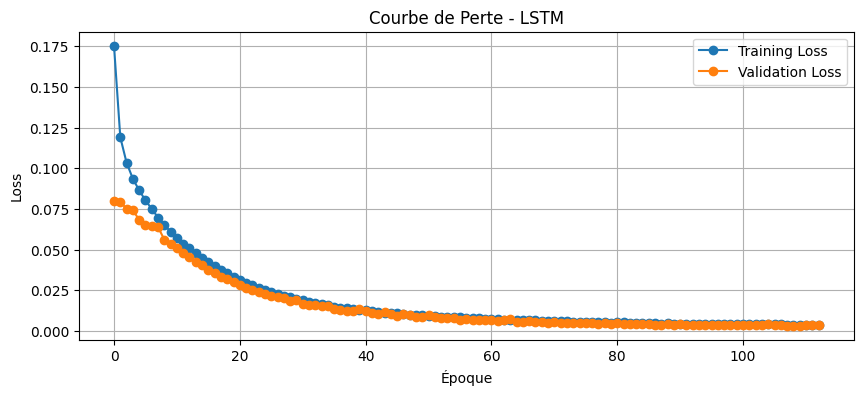

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Courbe de Perte - LSTM')
plt.xlabel('Époque')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


***Les deux courbes (train loss et validation loss) diminuent régulièrement puis se stabilisent, ce qui indique que le modèle apprend correctement.***

# **Amazon Chrono**

In [ ]:
pip install chronos-forecasting

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 837.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [ ]:
data_2=pd.read_csv("/content/drive/MyDrive/STAGE-PFE/rendements_tunindex_with_variables.csv")

In [ ]:
returns=data_2['Log Return']

In [ ]:
train = returns.iloc[:int(0.8*len(data))]
test = returns.iloc[int(0.8*len(data)):]

In [ ]:
import torch

# Convertir train.values (NumPy) vers torch.Tensor
context = torch.from_numpy(train.values.astype('float32'))  # float32 requis par Chronos


In [ ]:
from chronos import ChronosPipeline

pipe = ChronosPipeline.from_pretrained("amazon/chronos-t5-small", device_map="cpu")  # GPU si disponible


In [ ]:
# Prédire 10 pas en avant
forecast = pipe.predict(
    context,  #
    prediction_length=10,
    num_samples=1000
)

mean_returns = forecast.mean
lower_bound = forecast.quantiles[0.05]
upper_bound = forecast.quantiles[0.95]


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(train.index[-50:], train.values[-50:], label="Rendements historiques", color="blue")
plt.plot(test.index[:10], test.values[:10], 'go--', label="Vraies valeurs (test)")
plt.plot(test.index[:10], mean_returns, 'ro--', label="Prédictions Chronos")
plt.fill_between(test.index[:10], lower_bound, upper_bound, color="red", alpha=0.2, label="Intervalle 90%")
plt.title("Modélisation des rendements avec Chronos")
plt.legend()
plt.grid()
plt.show()


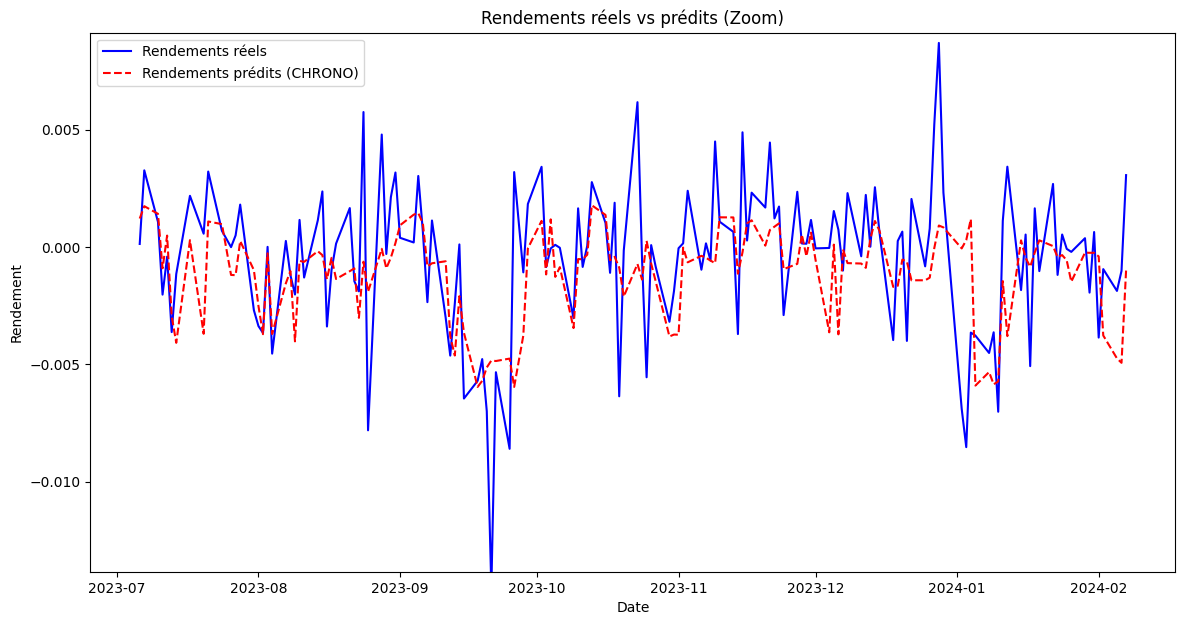

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 7))

zoom_range = 150
plt.plot(data_2.index[-zoom_range:], y_test[-zoom_range:], label='Rendements réels', color='blue')
plt.plot(data_2.index[-zoom_range:], y_pred[-zoom_range:], label='Rendements prédits (CHRONO)', color='red', linestyle='--')

plt.title('Rendements réels vs prédits (Zoom)')
plt.xlabel('Date')
plt.ylabel('Rendement')


plt.ylim(min(y_test[-zoom_range:]) * 0.95, max(y_test[-zoom_range:]) * 1.05)

plt.legend()
plt.show()


In [ ]:
# import pandas as pd  # requires: pip install pandas
# import torch
# from chronos import BaseChronosPipeline

# pipeline = BaseChronosPipeline.from_pretrained(
#     "amazon/chronos-t5-small",  # use "amazon/chronos-bolt-small" for the corresponding Chronos-Bolt model
#     device_map="cuda",  # use "cpu" for CPU inference
#     torch_dtype=torch.bfloat16,
# )

# # context must be either a 1D tensor, a list of 1D tensors,
# # or a left-padded 2D tensor with batch as the first dimension
# # quantiles is an fp32 tensor with shape [batch_size, prediction_length, num_quantile_levels]
# # mean is an fp32 tensor with shape [batch_size, prediction_length]
# quantiles, mean = pipeline.predict_quantiles(
#     context=torch.tensor(data_1["Close"]),
#     prediction_length=12,
#     quantile_levels=[0.1, 0.5, 0.9],
# )

# from chronos import ChronosPipeline, ChronosBoltPipeline

# print(ChronosPipeline.predict.__doc__)  # for Chronos models
# print(ChronosBoltPipeline.predict.__doc__)  # for Chronos-Bolt models

# import matplotlib.pyplot as plt  # requires: pip install matplotlib

# forecast_index = range(len(data_1), len(data_1) + 12)
# low, median, high = quantiles[0, :, 0], quantiles[0, :, 1], quantiles[0, :, 2]

# plt.figure(figsize=(8, 4))
# plt.plot(returns, color="royalblue", label="historical data")
# plt.plot(forecast_index, median, color="tomato", label="median forecast")
# plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
# plt.legend()
# plt.grid()
# plt.show()